# Elastic Net

In [3]:
import pandas as pd
import numpy as np


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400

In [5]:
plt.rcParams["figure.dpi"] = 400

In [6]:
df2 = pd.read_csv("df2.csv")

In [7]:
df2

Unnamed: 0  Unnamed: 0.1    like   puts   calls    spy     nio     get  \
0            0             0   785.0  778.0   699.0  698.0   653.0   587.0   
1            1             1   952.0  726.0   744.0  653.0   399.0   715.0   
2            2             2   858.0  635.0   850.0  551.0   939.0   625.0   
3            3             3  1406.0  838.0  1617.0  926.0  1075.0  1063.0   
4            4             4  1050.0  714.0   906.0  483.0  1076.0   694.0   
5            5             5   839.0  543.0   791.0  369.0  1202.0   641.0   
6            6             6  1073.0  871.0   952.0  654.0  2807.0   812.0   
7            7             7  1312.0  970.0  1184.0  750.0  4280.0   911.0   
8            8             8  1030.0  800.0  1063.0  602.0  1702.0   841.0   
9            9             9  1250.0  695.0  1229.0  520.0  2690.0  1046.0   
10          10            10  1210.0  626.0  1057.0  619.0  1323.0   956.0   
11          11            11  1211.0  453.0   902.0  554.0   597.0   836.0   
12          12            12  1088.0  468.0  1058.0  530.0   529.0   838.0   
13          13            13  1254.0  453.0  1141.0  430.0   985.0   993.0   
14          14            14  1571.0  553.0  1256.0  531.0   703.0  1308.0   
15          15            15  1697.0  547.0  1547.0  321.0   669.0  1561.0   
16          16            16   600.0  138.0   325.0   48.0    50.0   452.0   
17          17            17  1470.0  445.0  1266.0  178.0   367.0  1330.0   
18          18            18   969.0  374.0   834.0  219.0   237.0   859.0   
19          19            19  1516.0  745.0  1408.0  703.0   781.0  1261.0   
20          20            20  1584.0  767.0  1360.0  498.0   919.0  1188.0   
21          21            21   674.0  252.0   535.0  222.0   254.0   577.0   
22          22            22  1297.0  681.0  1069.0  699.0   477.0  1045.0   
23          23            23  1354.0  554.0  1159.0  463.0   417.0  1065.0   
24          24            24  1535.0  705.0  1288.0  421.0   241.0  1253.0   
25          25            25  1770.0  791.0  1334.0  606.0   180.0  1355.0   
26          26            26  1492.0  605.0  1168.0  515.0   146.0  1290.0   
27          27            27  1390.0  874.0  1122.0  514.0   271.0  1081.0   
28          28            28  1213.0  537.0  1074.0  599.0   414.0   965.0   
29          29            29  1164.0  578.0  1016.0  579.0   312.0   883.0   
30          30            30  1158.0  501.0   954.0  619.0   253.0   955.0   
31          31            31  1245.0  451.0   995.0  357.0   269.0   985.0   
32          32            32  1364.0  661.0  1238.0  600.0   257.0  1183.0   
33          33            33  1412.0  601.0  1283.0  845.0   445.0  1154.0   
34          34            34  1455.0  481.0  1044.0  395.0   359.0  1081.0   
35          35            35  1301.0  319.0   952.0  264.0   193.0  1036.0   
36          36            36  1320.0  319.0   932.0  243.0   252.0  1033.0   
37          37            37  1238.0  301.0   888.0  369.0   331.0   880.0   
38          38            38  1368.0  386.0   952.0  321.0   338.0  1024.0   
39          39            39  1166.0  324.0   682.0  232.0   393.0   800.0   
40          40            40  1009.0  329.0   716.0  327.0   399.0   618.0   
41          41            41   431.0   80.0   134.0   46.0    33.0   333.0   
42          42            42  1368.0  537.0   969.0  643.0   639.0   906.0   
43          43            43  1100.0  359.0   792.0  295.0   585.0   807.0   
44          44            44  1568.0  555.0  1446.0  579.0   657.0  1285.0   
45          45            45  1422.0  448.0  1194.0  395.0   403.0  1052.0   
46          46            46  1565.0  544.0  1456.0  469.0   829.0  1101.0   
47          47            47  1393.0  514.0  1300.0  383.0  1072.0  1089.0   
48          48            48  1422.0  387.0  1062.0  317.0   436.0  1016.0   
49          49            49  1780.0  616.0  1573.0  234.0   212.0  1495.0   
50          50            

In [8]:
import scipy.stats as stats

In [9]:
df = pd.read_csv ("3monthDF.csv")
# 

In [10]:
df2 = df2.set_index([list(df.columns[1:])])

In [11]:
cols = df2.columns
df2[cols[1:]] = df2[cols[1:]].apply(pd.to_numeric, errors='coerce')


In [12]:
df2 = df2.dropna(axis='columns')

In [13]:
df2

Unnamed: 0  Unnamed: 0.1    like   puts   calls    spy     nio  \
2020-11-02           0             0   785.0  778.0   699.0  698.0   653.0   
2020-11-03           1             1   952.0  726.0   744.0  653.0   399.0   
2020-11-04           2             2   858.0  635.0   850.0  551.0   939.0   
2020-11-09           3             3  1406.0  838.0  1617.0  926.0  1075.0   
2020-11-10           4             4  1050.0  714.0   906.0  483.0  1076.0   
2020-11-11           5             5   839.0  543.0   791.0  369.0  1202.0   
2020-11-12           6             6  1073.0  871.0   952.0  654.0  2807.0   
2020-11-13           7             7  1312.0  970.0  1184.0  750.0  4280.0   
2020-11-16           8             8  1030.0  800.0  1063.0  602.0  1702.0   
2020-11-17           9             9  1250.0  695.0  1229.0  520.0  2690.0   
2020-11-18          10            10  1210.0  626.0  1057.0  619.0  1323.0   
2020-11-19          11            11  1211.0  453.0   902.0  554.0   597.0   
2020-11-20          12            12  1088.0  468.0  1058.0  530.0   529.0   
2020-11-23          13            13  1254.0  453.0  1141.0  430.0   985.0   
2020-11-24          14            14  1571.0  553.0  1256.0  531.0   703.0   
2020-11-25          15            15  1697.0  547.0  1547.0  321.0   669.0   
2020-11-26          16            16   600.0  138.0   325.0   48.0    50.0   
2020-11-27          17            17  1470.0  445.0  1266.0  178.0   367.0   
2020-11-30          18            18   969.0  374.0   834.0  219.0   237.0   
2020-12-01          19            19  1516.0  745.0  1408.0  703.0   781.0   
2020-12-02          20            20  1584.0  767.0  1360.0  498.0   919.0   
2020-12-03          21            21   674.0  252.0   535.0  222.0   254.0   
2020-12-04          22            22  1297.0  681.0  1069.0  699.0   477.0   
2020-12-07          23            23  1354.0  554.0  1159.0  463.0   417.0   
2020-12-08          24            24  1535.0  705.0  1288.0  421.0   241.0   
2020-12-09          25            25  1770.0  791.0  1334.0  606.0   180.0   
2020-12-10          26            26  1492.0  605.0  1168.0  515.0   146.0   
2020-12-11          27            27  1390.0  874.0  1122.0  514.0   271.0   
2020-12-14          28            28  1213.0  537.0  1074.0  599.0   414.0   
2020-12-15          29            29  1164.0  578.0  1016.0  579.0   312.0   
2020-12-16          30            30  1158.0  501.0   954.0  619.0   253.0   
2020-12-17          31            31  1245.0  451.0   995.0  357.0   269.0   
2020-12-18          32            32  1364.0  661.0  1238.0  600.0   257.0   
2020-12-21          33            33  1412.0  601.0  1283.0  845.0   445.0   
2020-12-22          34            34  1455.0  481.0  1044.0  395.0   359.0   
2020-12-23          35            35  1301.0  319.0   952.0  264.0   193.0   
2020-12-24          36            36  1320.0  319.0   932.0  243.0   252.0   
2020-12-28          37            37  1238.0  301.0   888.0  369.0   331.0   
2020-12-29          38            38  1368.0  386.0   952.0  321.0   338.0   
2020-12-30          39            39  1166.0  324.0   682.0  232.0   393.0   
2020-12-31          40            40  1009.0  329.0   716.0  327.0   399.0   
2021-01-01          41            41   431.0   80.0   134.0   46.0    33.0   
2021-01-04          42            42  1368.0  537.0   969.0  643.0   639.0   
2021-01-05          43            43  1100.0  359.0   792.0  295.0   585.0   
2021-01-06          44            44  1568.0  555.0  1446.0  579.0   657.0   
2021-01-07          45            45  1422.0  448.0  1194.0  395.0   403.0   
2021-01-08          46            46  1565.0  544.0  1456.0  469.0   829.0   
2021-01-11          47            47  1393.0  514.0  1300.0  383.0  1072.0   
2021-01-12          48            48  1422.0  387.0  1062.0  317.0   436.0   
2021-01-13          49            49  1780.0  616.0  1573.0  234.0   212.0   
2021-01-14          50            

In [14]:
df2= df2.drop('Unnamed: 0', axis=1)

In [15]:
df2= df2.drop('Unnamed: 0.1', axis=1)

In [16]:
mydict = {}
for i in df2.columns[1:-2]:
    correlation = stats.pearsonr(df2[i],df2["Adjusted_Closing_Stock_Price"])[0]
    print ("The correlation between " + i + " and price of PLTR is: ", correlation)
    mydict[i] = correlation

The correlation between puts and price of PLTR is:  -0.5817003337182729
The correlation between calls and price of PLTR is:  -0.11906761610944959
The correlation between spy and price of PLTR is:  -0.5705425473645248
The correlation between nio and price of PLTR is:  -0.5791261464879311
The correlation between get and price of PLTR is:  0.4570532548967039
The correlation between buy and price of PLTR is:  0.5227858982345871
The correlation between going and price of PLTR is:  0.3092956441301077
The correlation between market and price of PLTR is:  0.23273288229891775
The correlation between go and price of PLTR is:  0.42130568557201653
The correlation between day and price of PLTR is:  0.20251500639169026
The correlation between good and price of PLTR is:  0.2721662384750384
The correlation between think and price of PLTR is:  0.21041374978495953
The correlation between sell and price of PLTR is:  0.3069103711226231
The correlation between fuck and price of PLTR is:  0.4323447657882863

The correlation between loss and price of PLTR is:  0.15055900343588374
The correlation between late and price of PLTR is:  0.3669226349443596
The correlation between hate and price of PLTR is:  0.20486130845344133
The correlation between must and price of PLTR is:  0.42015140210956586
The correlation between rally and price of PLTR is:  -0.2021889479133694
The correlation between post and price of PLTR is:  0.5739762022547475
The correlation between watch and price of PLTR is:  0.33250127285751324
The correlation between tank and price of PLTR is:  -0.3918869780972688
The correlation between volatility and price of PLTR is:  0.03496809924149477
The correlation between expect and price of PLTR is:  0.22928490339226304
The correlation between ur and price of PLTR is:  0.11006208725264553
The correlation between lower and price of PLTR is:  0.22173765359581182
The correlation between watching and price of PLTR is:  0.3787941461111926
The correlation between crash and price of PLTR is:  -

The correlation between haha and price of PLTR is:  0.1656379200482368
The correlation between blood and price of PLTR is:  0.27860019032639594
The correlation between cuz and price of PLTR is:  0.10610917205864263
The correlation between understand and price of PLTR is:  0.4191550284919821
The correlation between march and price of PLTR is:  0.26487730315608143
The correlation between slow and price of PLTR is:  0.010712750271836088
The correlation between expected and price of PLTR is:  0.05616350489199681
The correlation between nasdaq and price of PLTR is:  -0.312059764072232
The correlation between november and price of PLTR is:  -0.4474782587617386
The correlation between poor and price of PLTR is:  0.5381901034115013
The correlation between moving and price of PLTR is:  0.5033771777646863
The correlation between prices and price of PLTR is:  0.4766634855659528
The correlation between full and price of PLTR is:  0.452027492466735
The correlation between robinhood and price of PLT

The correlation between room and price of PLTR is:  0.09969534448890034
The correlation between rh and price of PLTR is:  0.39927576532251585
The correlation between fed and price of PLTR is:  -0.02041576429760271
The correlation between opposite and price of PLTR is:  -0.3001004854592477
The correlation between pm and price of PLTR is:  0.19616849158220956
The correlation between thursday and price of PLTR is:  0.07717105892065604
The correlation between near and price of PLTR is:  0.04650273581914492
The correlation between em and price of PLTR is:  0.5007628642825181
The correlation between except and price of PLTR is:  0.1352644877517356
The correlation between ride and price of PLTR is:  0.17168419316907352
The correlation between bag and price of PLTR is:  0.3776927156007026
The correlation between gambling and price of PLTR is:  -0.03364058043582421
The correlation between saw and price of PLTR is:  0.4868532307814084
The correlation between insane and price of PLTR is:  0.18690

The correlation between push and price of PLTR is:  0.3656310127068827
The correlation between friend and price of PLTR is:  0.35632181682162556
The correlation between legit and price of PLTR is:  0.39533023448049154
The correlation between fair and price of PLTR is:  0.2123597919243142
The correlation between circuit and price of PLTR is:  -0.022971963854222593
The correlation between cool and price of PLTR is:  0.26548952039115714
The correlation between type and price of PLTR is:  0.2937809539253826
The correlation between totally and price of PLTR is:  0.1636677043828197
The correlation between pussy and price of PLTR is:  0.13915812486706575
The correlation between banks and price of PLTR is:  0.11259434257931236
The correlation between fds and price of PLTR is:  0.0764315142587966
The correlation between extremely and price of PLTR is:  0.2395211500508943
The correlation between history and price of PLTR is:  0.4694329364785248
The correlation between idiots and price of PLTR is

The correlation between legal and price of PLTR is:  0.17118425505204232
The correlation between acting and price of PLTR is:  0.12462388965716843
The correlation between zero and price of PLTR is:  0.4355308385994986
The correlation between favorite and price of PLTR is:  0.5099005035558214
The correlation between meet and price of PLTR is:  0.26510961057959015
The correlation between classic and price of PLTR is:  -0.04097176277356714
The correlation between sooner and price of PLTR is:  -0.05947983532487421
The correlation between info and price of PLTR is:  0.39301452290646127
The correlation between quit and price of PLTR is:  0.24039866465643683
The correlation between daddy and price of PLTR is:  0.21170415963058073
The correlation between tanks and price of PLTR is:  -0.2197296570795848
The correlation between public and price of PLTR is:  0.40270086509074415
The correlation between followed and price of PLTR is:  0.10362849228710933
The correlation between posting and price of

The correlation between pullback and price of PLTR is:  -0.09379442610668026
The correlation between da and price of PLTR is:  0.4302790785506272
The correlation between disappointed and price of PLTR is:  0.04072033699492458
The correlation between congrats and price of PLTR is:  0.04598651338062894
The correlation between reminds and price of PLTR is:  -0.04165955557651238
The correlation between recover and price of PLTR is:  0.06027364498099623
The correlation between insider and price of PLTR is:  -0.07905887003124792
The correlation between instant and price of PLTR is:  0.4392078115283327
The correlation between land and price of PLTR is:  0.13115710917609708
The correlation between gotten and price of PLTR is:  0.1356823672771482
The correlation between fund and price of PLTR is:  0.6028173013098823
The correlation between degenerate and price of PLTR is:  0.3971502185593745
The correlation between headed and price of PLTR is:  0.06103333869071986
The correlation between player

The correlation between screw and price of PLTR is:  0.405130308049349
The correlation between electric and price of PLTR is:  0.012571648802696574
The correlation between computer and price of PLTR is:  -0.14296935081217624
The correlation between highest and price of PLTR is:  0.4293490876703443
The correlation between child and price of PLTR is:  0.12094184474357297
The correlation between rush and price of PLTR is:  0.2240302495513614
The correlation between video and price of PLTR is:  0.5161579727016046
The correlation between driving and price of PLTR is:  0.18849097176649585
The correlation between unfortunately and price of PLTR is:  0.4939469221651011
The correlation between guessing and price of PLTR is:  0.20134945632404205
The correlation between christmas and price of PLTR is:  0.1726297933090633
The correlation between tears and price of PLTR is:  0.243674717523795
The correlation between worked and price of PLTR is:  0.31631366858536614
The correlation between opinion a

The correlation between hole and price of PLTR is:  0.22373172752577897
The correlation between helps and price of PLTR is:  0.20733571636917064
The correlation between eventually and price of PLTR is:  0.32007336725660795
The correlation between nowhere and price of PLTR is:  0.14961904912563484
The correlation between built and price of PLTR is:  0.12431667634362124
The correlation between crashes and price of PLTR is:  0.1415241527701886
The correlation between prediction and price of PLTR is:  -0.1079289294767709
The correlation between purchase and price of PLTR is:  0.4993693377599103
The correlation between atleast and price of PLTR is:  0.1656574599760155
The correlation between february and price of PLTR is:  0.3661821300519779
The correlation between limited and price of PLTR is:  0.36222760684720834
The correlation between store and price of PLTR is:  0.42380089109282965
The correlation between angry and price of PLTR is:  0.4131603809868307
The correlation between ty and pr

The correlation between hide and price of PLTR is:  0.05095360785289078
The correlation between patience and price of PLTR is:  0.24315164965139574
The correlation between minimum and price of PLTR is:  0.2740512853151615
The correlation between appreciate and price of PLTR is:  0.3333647940305161
The correlation between usd and price of PLTR is:  0.3208994718882447
The correlation between active and price of PLTR is:  0.5360076485327423
The correlation between expired and price of PLTR is:  0.10022990216201513
The correlation between motherfucker and price of PLTR is:  0.1546666742081015
The correlation between chain and price of PLTR is:  0.29075942081933503
The correlation between battle and price of PLTR is:  0.38198953278605735
The correlation between self and price of PLTR is:  0.43811596120885454
The correlation between truth and price of PLTR is:  0.11643404382143938
The correlation between mil and price of PLTR is:  0.32645129061711187
The correlation between analyst and price

In [17]:
# sorted(mydict, key=mydict.get, reverse=True)


In [18]:
sorted_dict = {}
sorted_keys = sorted(mydict, key=mydict.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = mydict[w]

print(sorted_dict)

{'pay': 0.6792025516804492, 'tickers': 0.6762757442764098, 'trading': 0.6492810892761605, 'investing': 0.6201200387202442, 'fellow': 0.6133387180452445, 'account': 0.6119784066574909, 'buys': 0.610541485530584, 'check': 0.6061126900907093, 'stock': 0.6053687851816354, 'fund': 0.6028173013098823, 'invest': 0.5995014927895415, 'recommend': 0.5990857204543832, 'mods': 0.5980482038514655, 'banned': 0.5918207138085356, 'friends': 0.5891166690484095, 'share': 0.5837013482011936, 'posts': 0.5836944082336835, 'place': 0.5804720045094929, 'invested': 0.5804175184285617, 'word': 0.5767336358427322, 'want': 0.5758699353883674, 'post': 0.5739762022547475, 'us': 0.5722821035818573, 'help': 0.5670008889752501, 'asap': 0.5665594985239184, 'boyfriend': 0.5664761964618437, 'movie': 0.56627451538953, 'funds': 0.565828300784984, 'leave': 0.5609182389627592, 'page': 0.5608267423740572, 'try': 0.5591966965292609, 'game': 0.5583111985818091, 'different': 0.5578067987876646, 'users': 0.5575459777187157, 'inv

In [19]:
sorted_dict

{'pay': 0.6792025516804492,
 'tickers': 0.6762757442764098,
 'trading': 0.6492810892761605,
 'investing': 0.6201200387202442,
 'fellow': 0.6133387180452445,
 'account': 0.6119784066574909,
 'buys': 0.610541485530584,
 'check': 0.6061126900907093,
 'stock': 0.6053687851816354,
 'fund': 0.6028173013098823,
 'invest': 0.5995014927895415,
 'recommend': 0.5990857204543832,
 'mods': 0.5980482038514655,
 'banned': 0.5918207138085356,
 'friends': 0.5891166690484095,
 'share': 0.5837013482011936,
 'posts': 0.5836944082336835,
 'place': 0.5804720045094929,
 'invested': 0.5804175184285617,
 'word': 0.5767336358427322,
 'want': 0.5758699353883674,
 'post': 0.5739762022547475,
 'us': 0.5722821035818573,
 'help': 0.5670008889752501,
 'asap': 0.5665594985239184,
 'boyfriend': 0.5664761964618437,
 'movie': 0.56627451538953,
 'funds': 0.565828300784984,
 'leave': 0.5609182389627592,
 'page': 0.5608267423740572,
 'try': 0.5591966965292609,
 'game': 0.5583111985818091,
 'different': 0.5578067987876646,
 

In [20]:
first50pairs = {k: sorted_dict[k] for k in list(sorted_dict)[:50]}

In [21]:
# Get the first 50 highest correlation with PLTR price
first50pairs

{'pay': 0.6792025516804492,
 'tickers': 0.6762757442764098,
 'trading': 0.6492810892761605,
 'investing': 0.6201200387202442,
 'fellow': 0.6133387180452445,
 'account': 0.6119784066574909,
 'buys': 0.610541485530584,
 'check': 0.6061126900907093,
 'stock': 0.6053687851816354,
 'fund': 0.6028173013098823,
 'invest': 0.5995014927895415,
 'recommend': 0.5990857204543832,
 'mods': 0.5980482038514655,
 'banned': 0.5918207138085356,
 'friends': 0.5891166690484095,
 'share': 0.5837013482011936,
 'posts': 0.5836944082336835,
 'place': 0.5804720045094929,
 'invested': 0.5804175184285617,
 'word': 0.5767336358427322,
 'want': 0.5758699353883674,
 'post': 0.5739762022547475,
 'us': 0.5722821035818573,
 'help': 0.5670008889752501,
 'asap': 0.5665594985239184,
 'boyfriend': 0.5664761964618437,
 'movie': 0.56627451538953,
 'funds': 0.565828300784984,
 'leave': 0.5609182389627592,
 'page': 0.5608267423740572,
 'try': 0.5591966965292609,
 'game': 0.5583111985818091,
 'different': 0.5578067987876646,
 

Text(0, 0.5, 'Correlation with PLTR Stock Price')

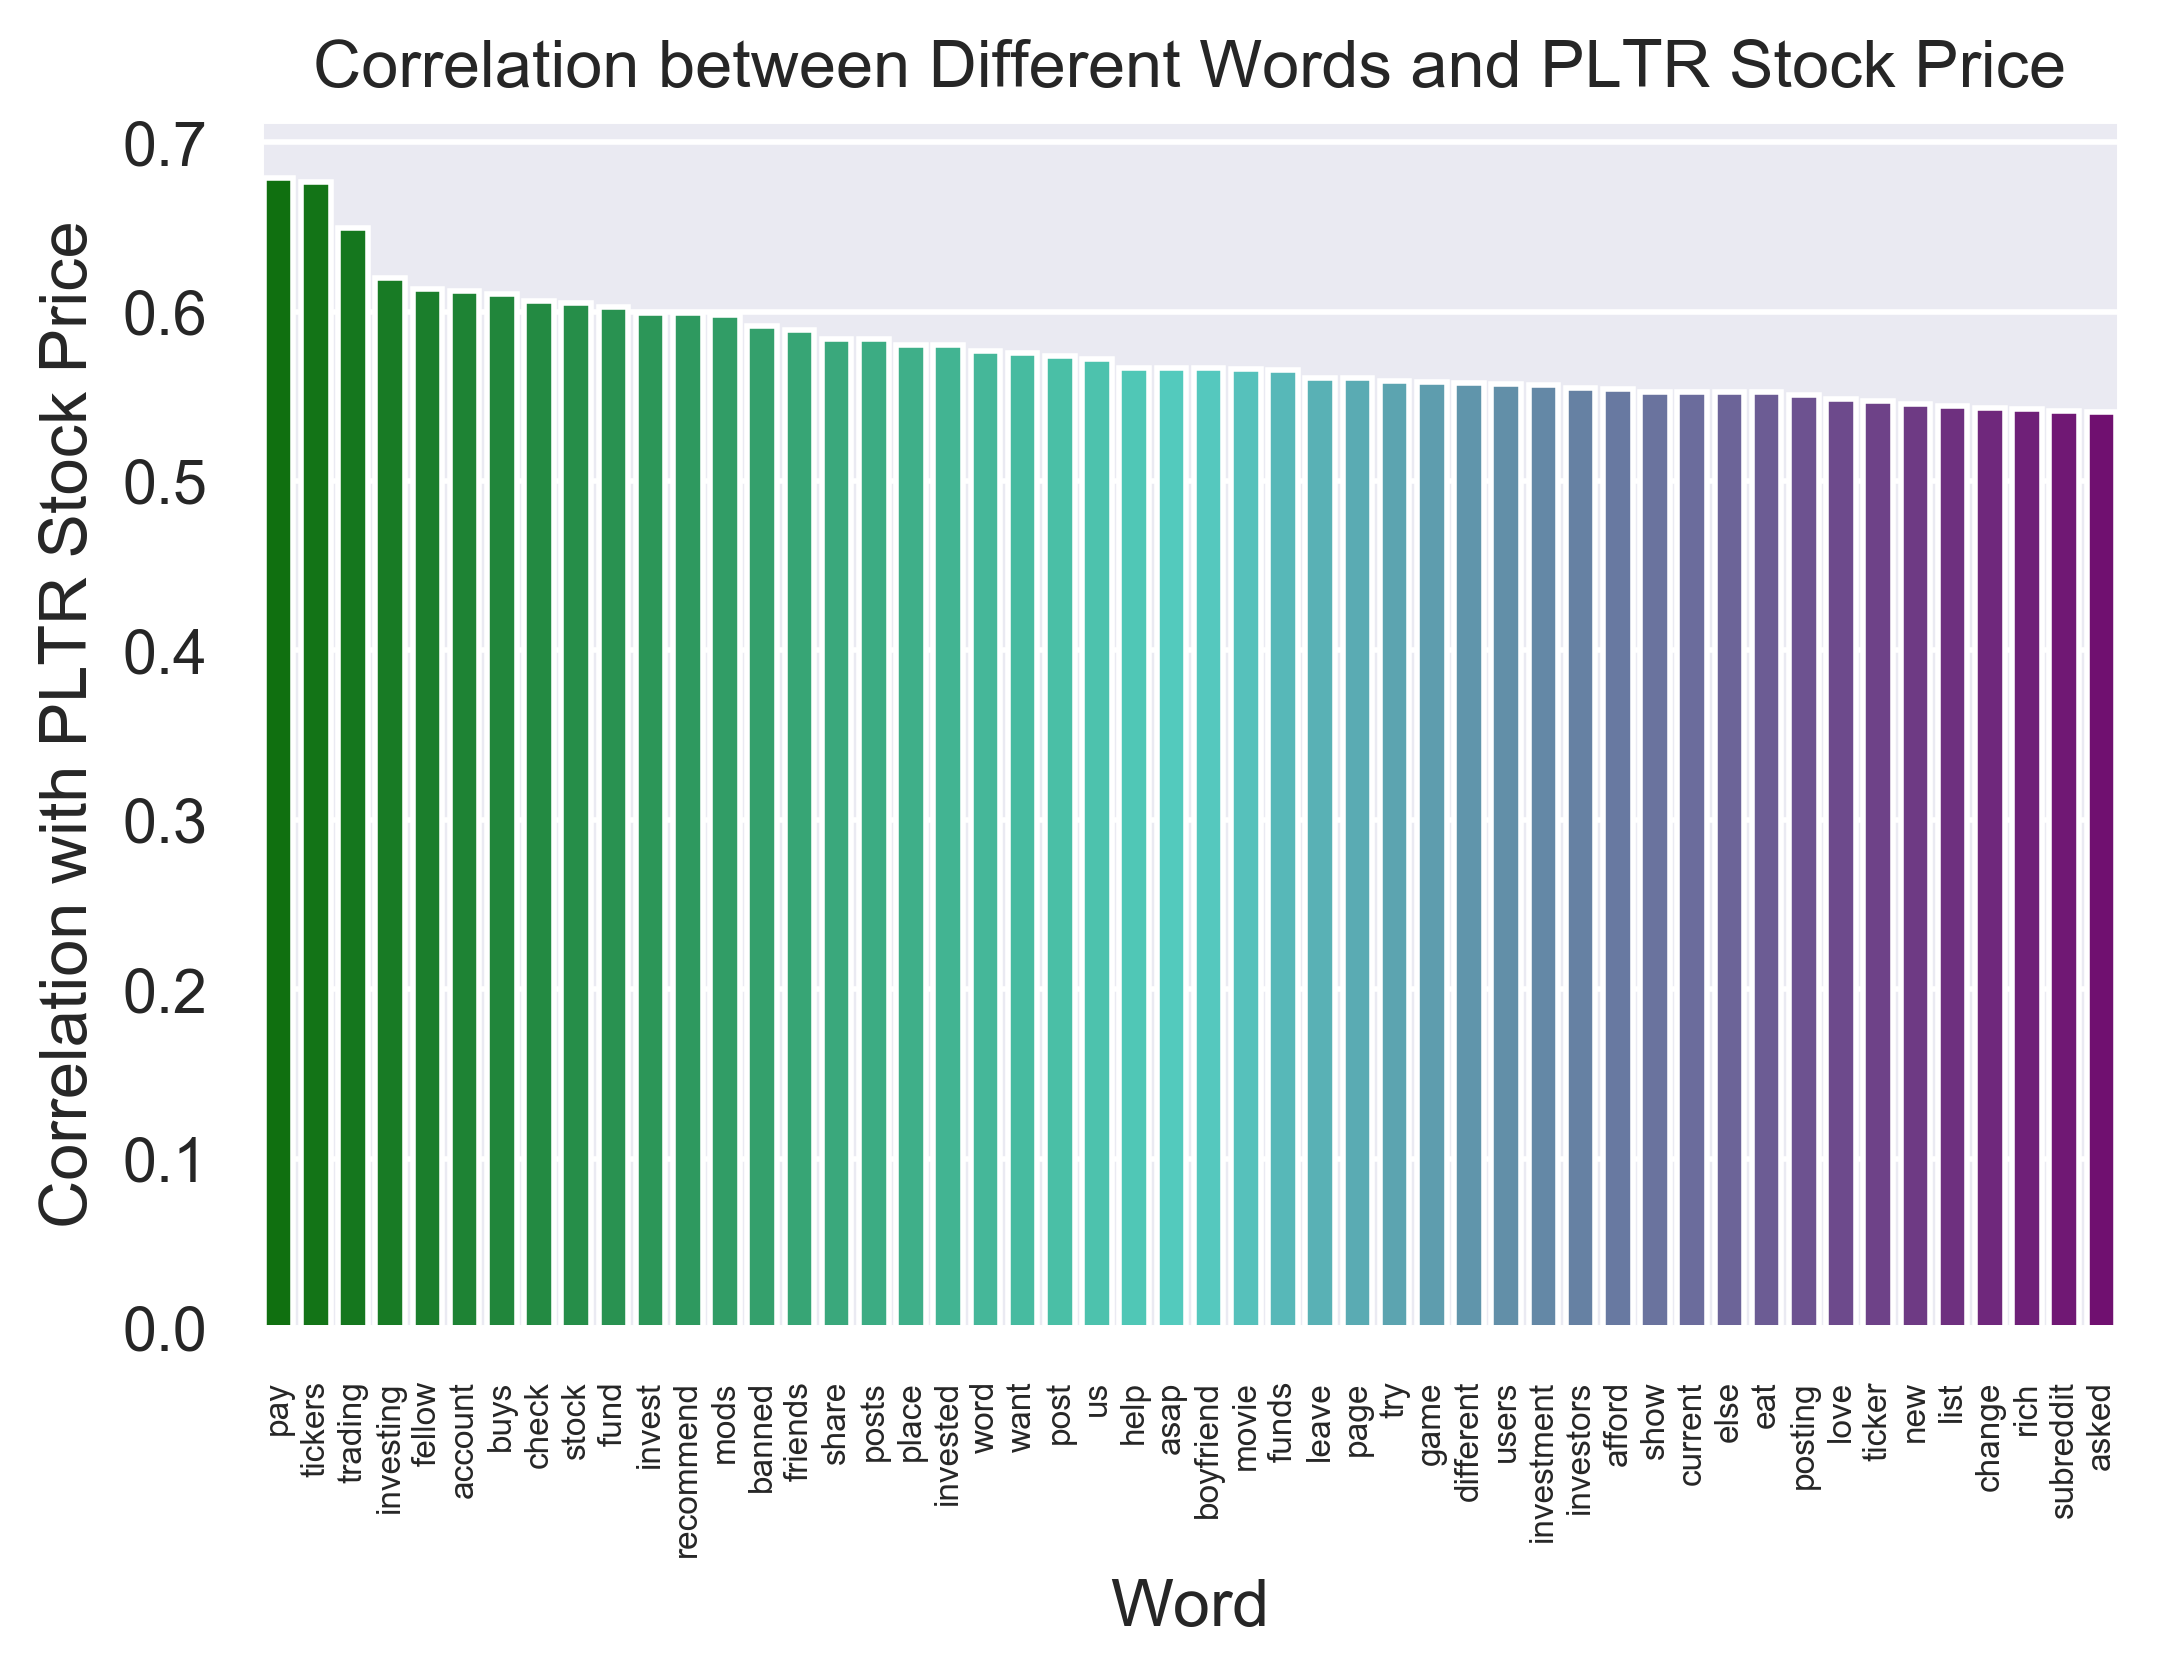

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400

sns.set()
cmap = sns.blend_palette(["green", "turquoise","purple"], 50)
sns.set_palette(cmap, n_colors=50)

keys = list(first50pairs.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(first50pairs[k]) for k in keys]
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90, size=6)
plt.title("Correlation between Different Words and PLTR Stock Price")
plt.xlabel("Word")
plt.ylabel("Correlation with PLTR Stock Price")

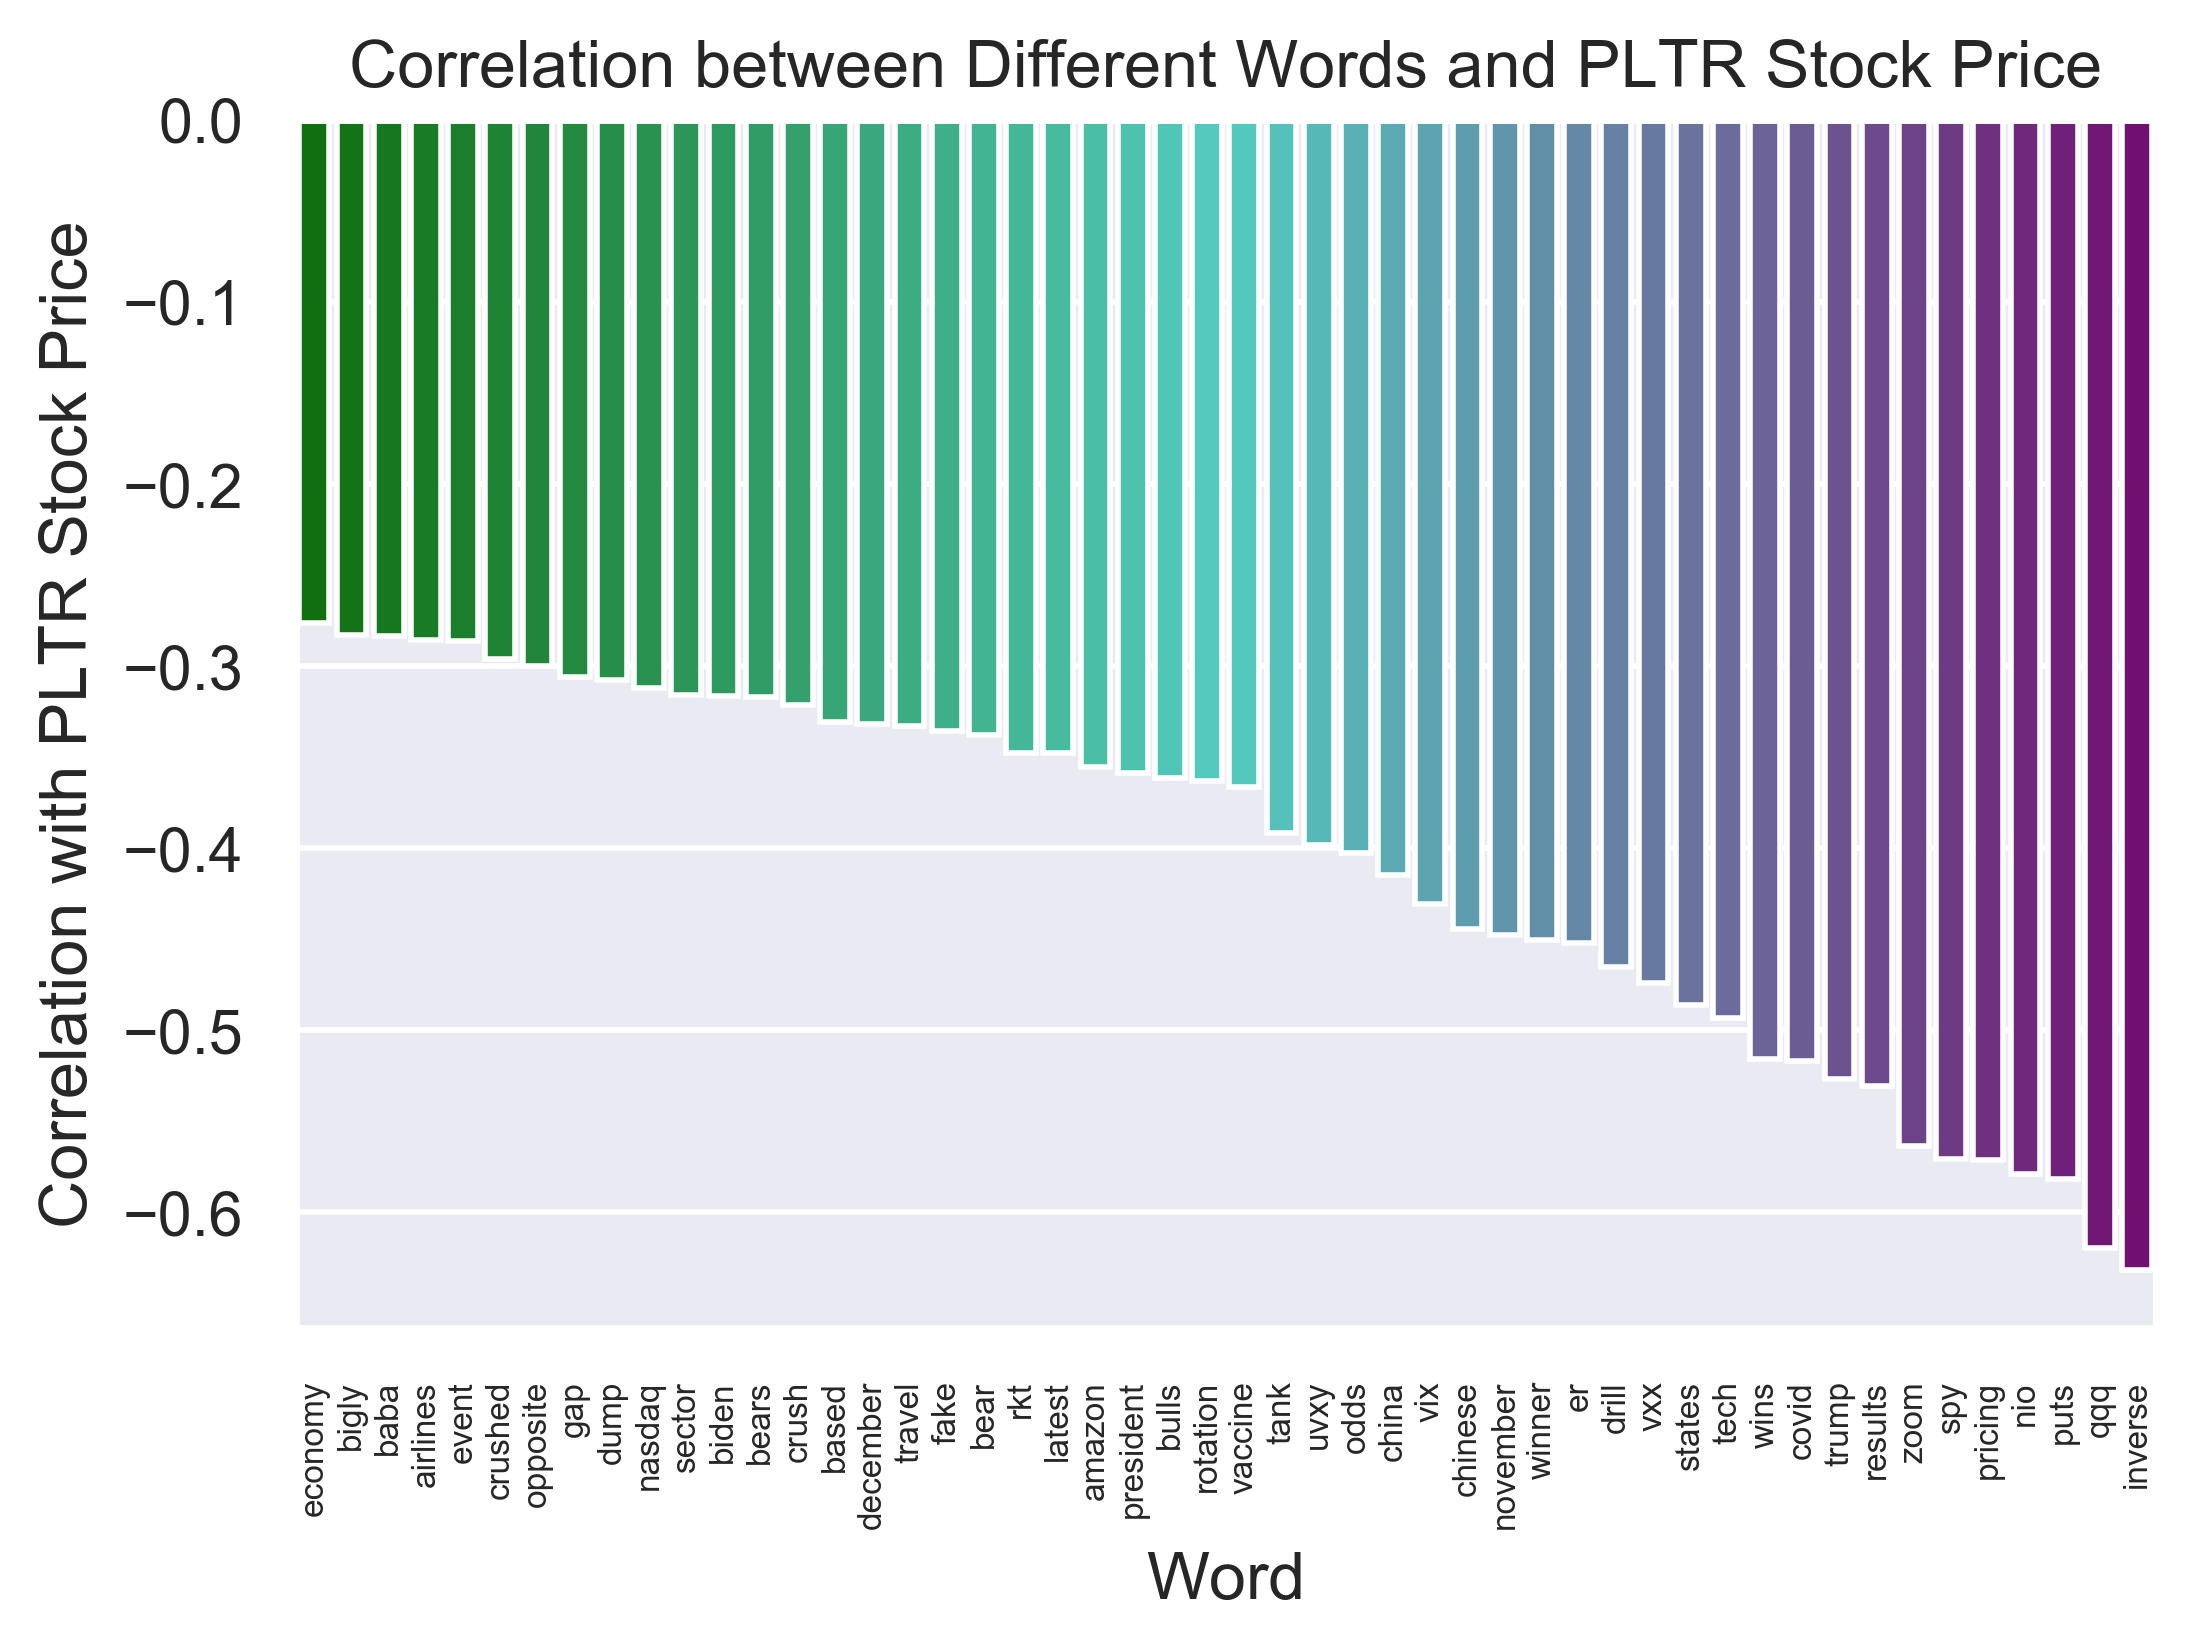

In [23]:
last50pairs = {k: sorted_dict[k] for k in list(sorted_dict)[-50:]}
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400

sns.set()
cmap = sns.blend_palette(["green", "turquoise","purple"], 50)
sns.set_palette(cmap, n_colors=50)

keys = list(last50pairs.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(last50pairs[k]) for k in keys]
sns.barplot(x=keys, y=vals)
plt.xticks(rotation=90, size=6)
plt.title("Correlation between Different Words and PLTR Stock Price")
plt.xlabel("Word")
plt.ylabel("Correlation with PLTR Stock Price")
plt.show()

In [24]:
first20pairs = {k: sorted_dict[k] for k in list(sorted_dict)[:20]}


In [25]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [26]:
seed = 100
test_size = 0.20

y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first20pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')


In [27]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
pred = reg.predict(x_test)

In [29]:
pred

array([26.465096, 25.148884, 28.267365, 25.46772 , 29.335602, 29.826015,
       27.153519, 36.163357, 49.943863, 54.416096, 24.755192, 31.12321 ,
       31.456905, 24.66287 , 42.058643, 47.777054, 39.421394, 55.171284],
      dtype=float32)

In [30]:
y_train

array([10.54, 10.5 , 10.72, 11.88, 13.83, 14.67, 14.  , 15.96, 14.58,
       15.8 , 15.93, 17.85, 17.9 , 18.98, 18.15, 21.04, 23.82, 29.05,
       27.66, 27.11, 25.67, 22.51, 24.03, 23.85, 28.94, 28.59, 26.63,
       27.04, 27.2 , 27.24, 26.43, 25.92, 27.23, 25.97, 28.51, 28.04,
       28.69, 27.75, 25.63, 24.66, 25.1 , 23.55], dtype=float32)

In [31]:
data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


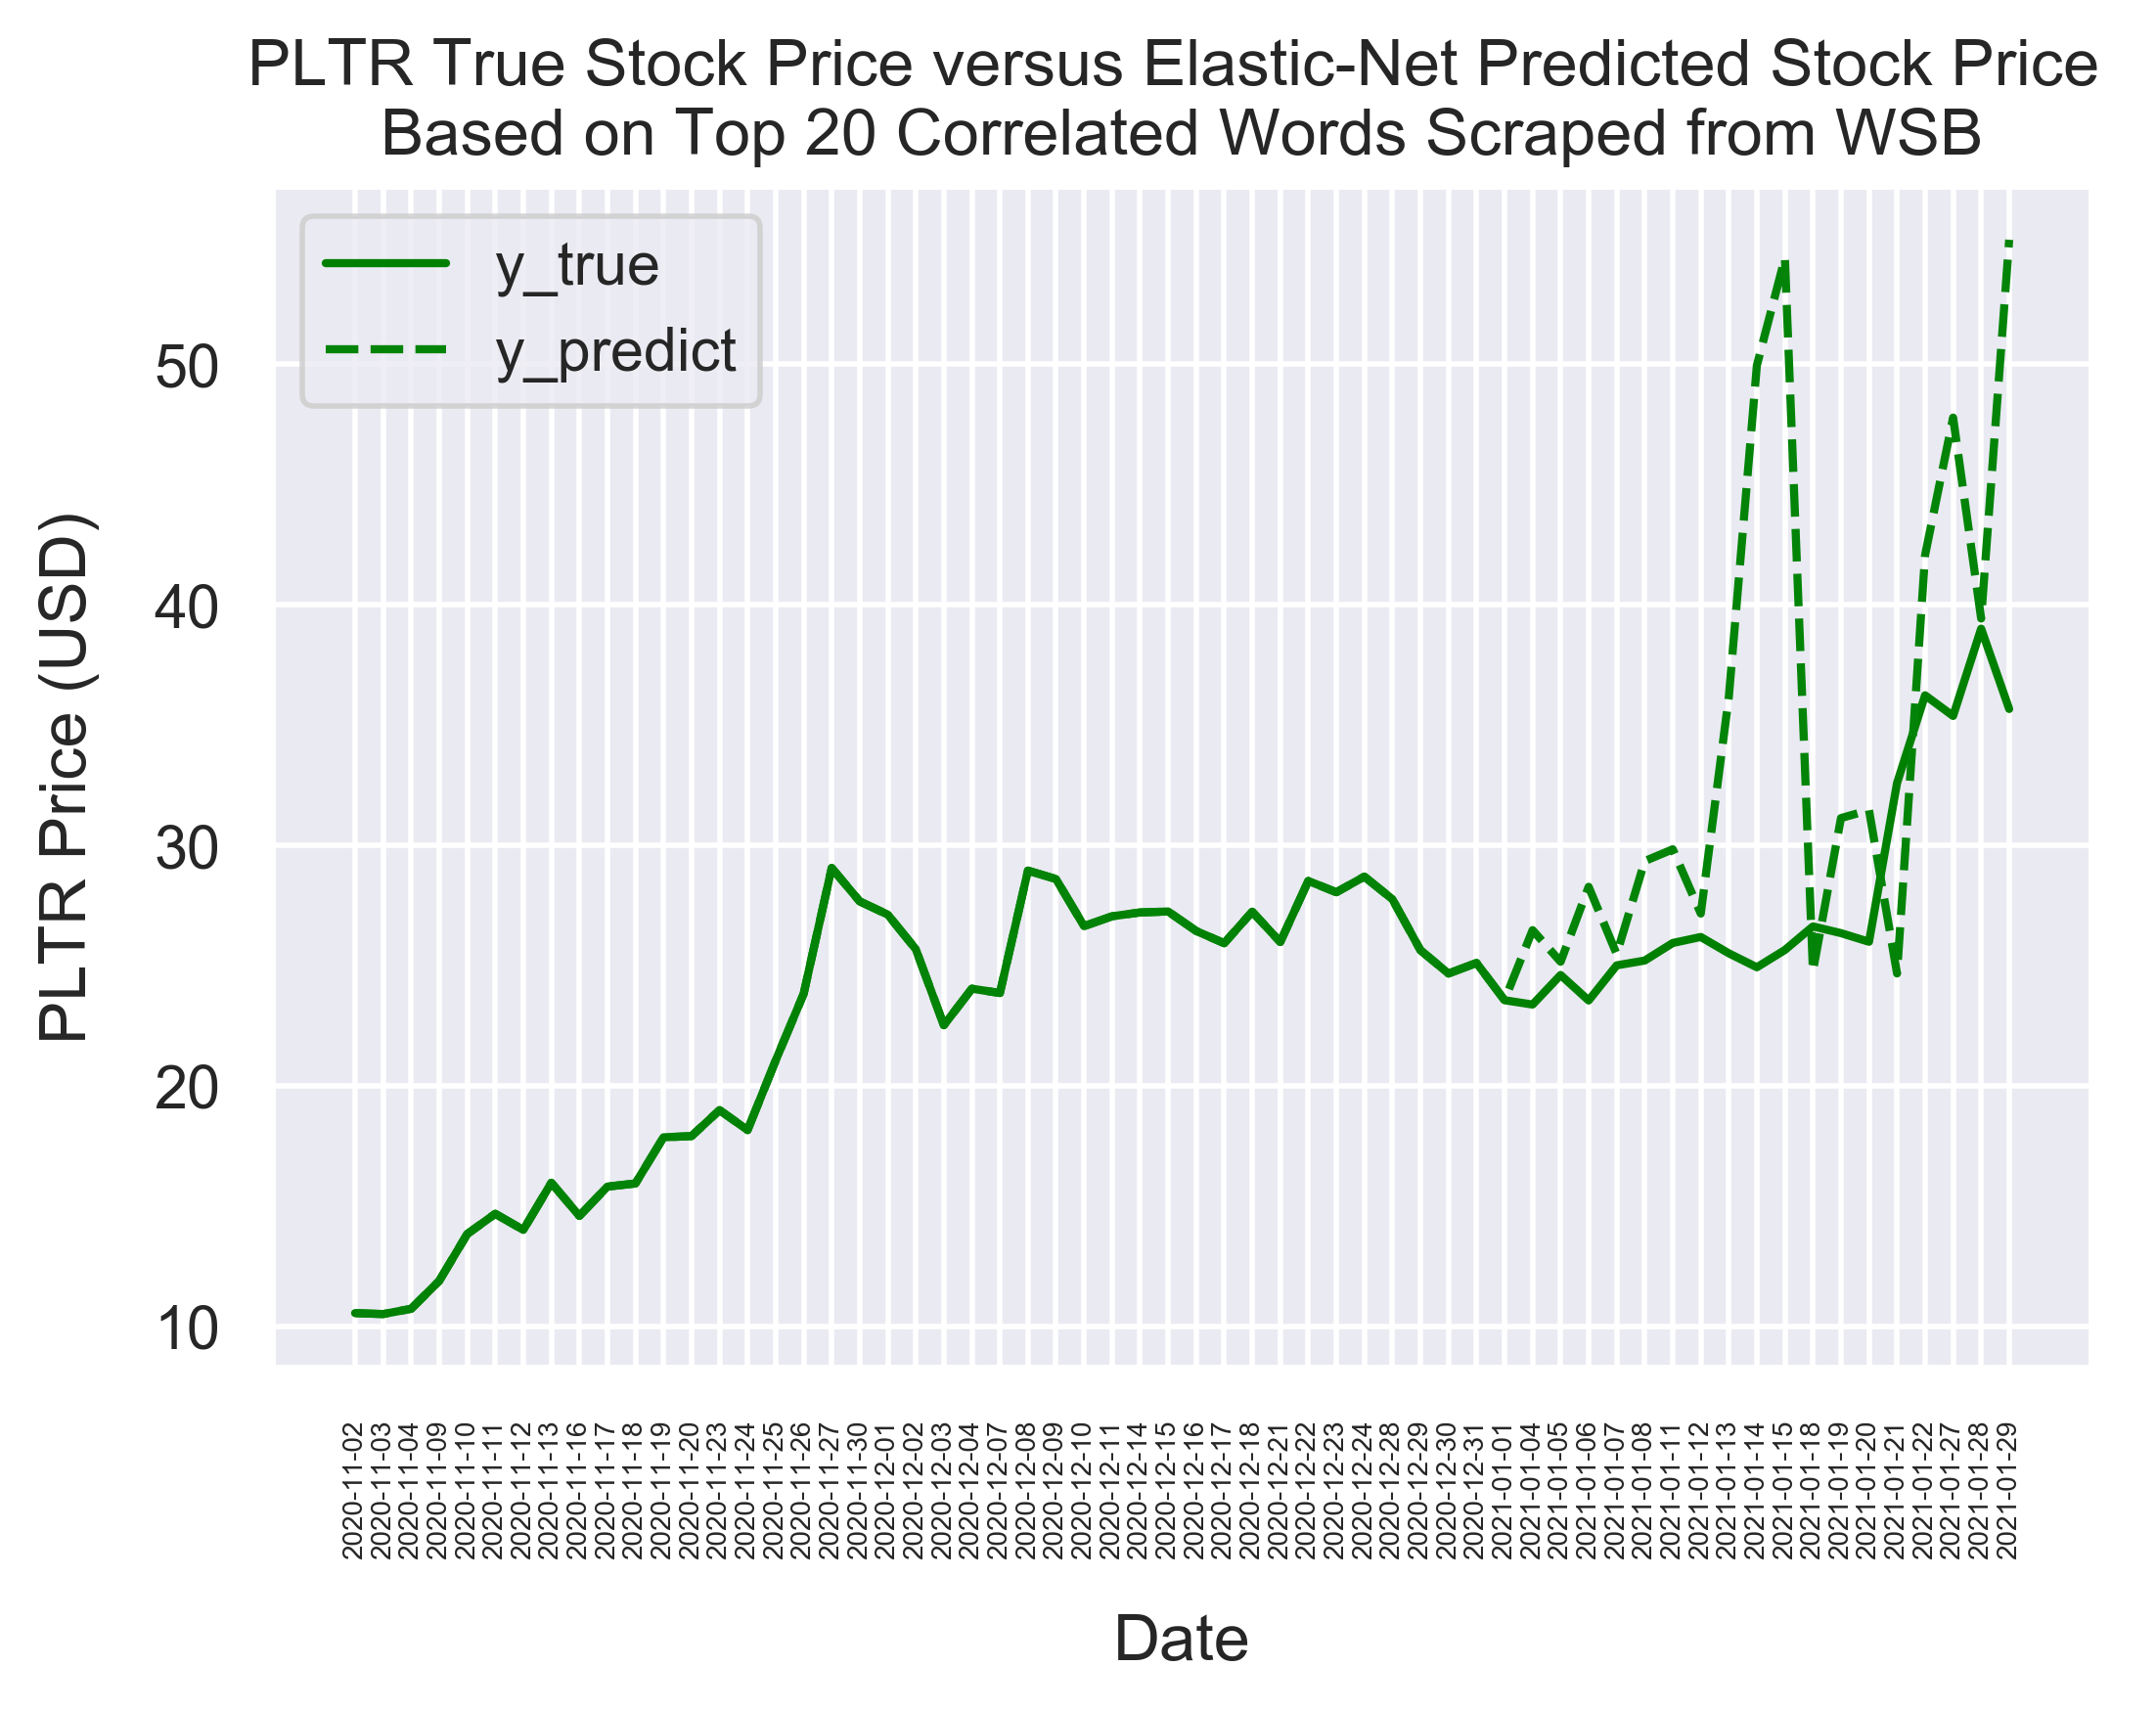

In [32]:
sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 20 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()

In [33]:
import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))

The Root Mean Squared Error is: 11.356476509719919
The Mean Absolute Error is: 7.806552410125732
The Explained Variance Score is: -2.5140368938446045
The R2 Score is: -4.407153659453441


In [34]:
# Repeat with Top 50 Words
seed = 100
test_size = 0.20

y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

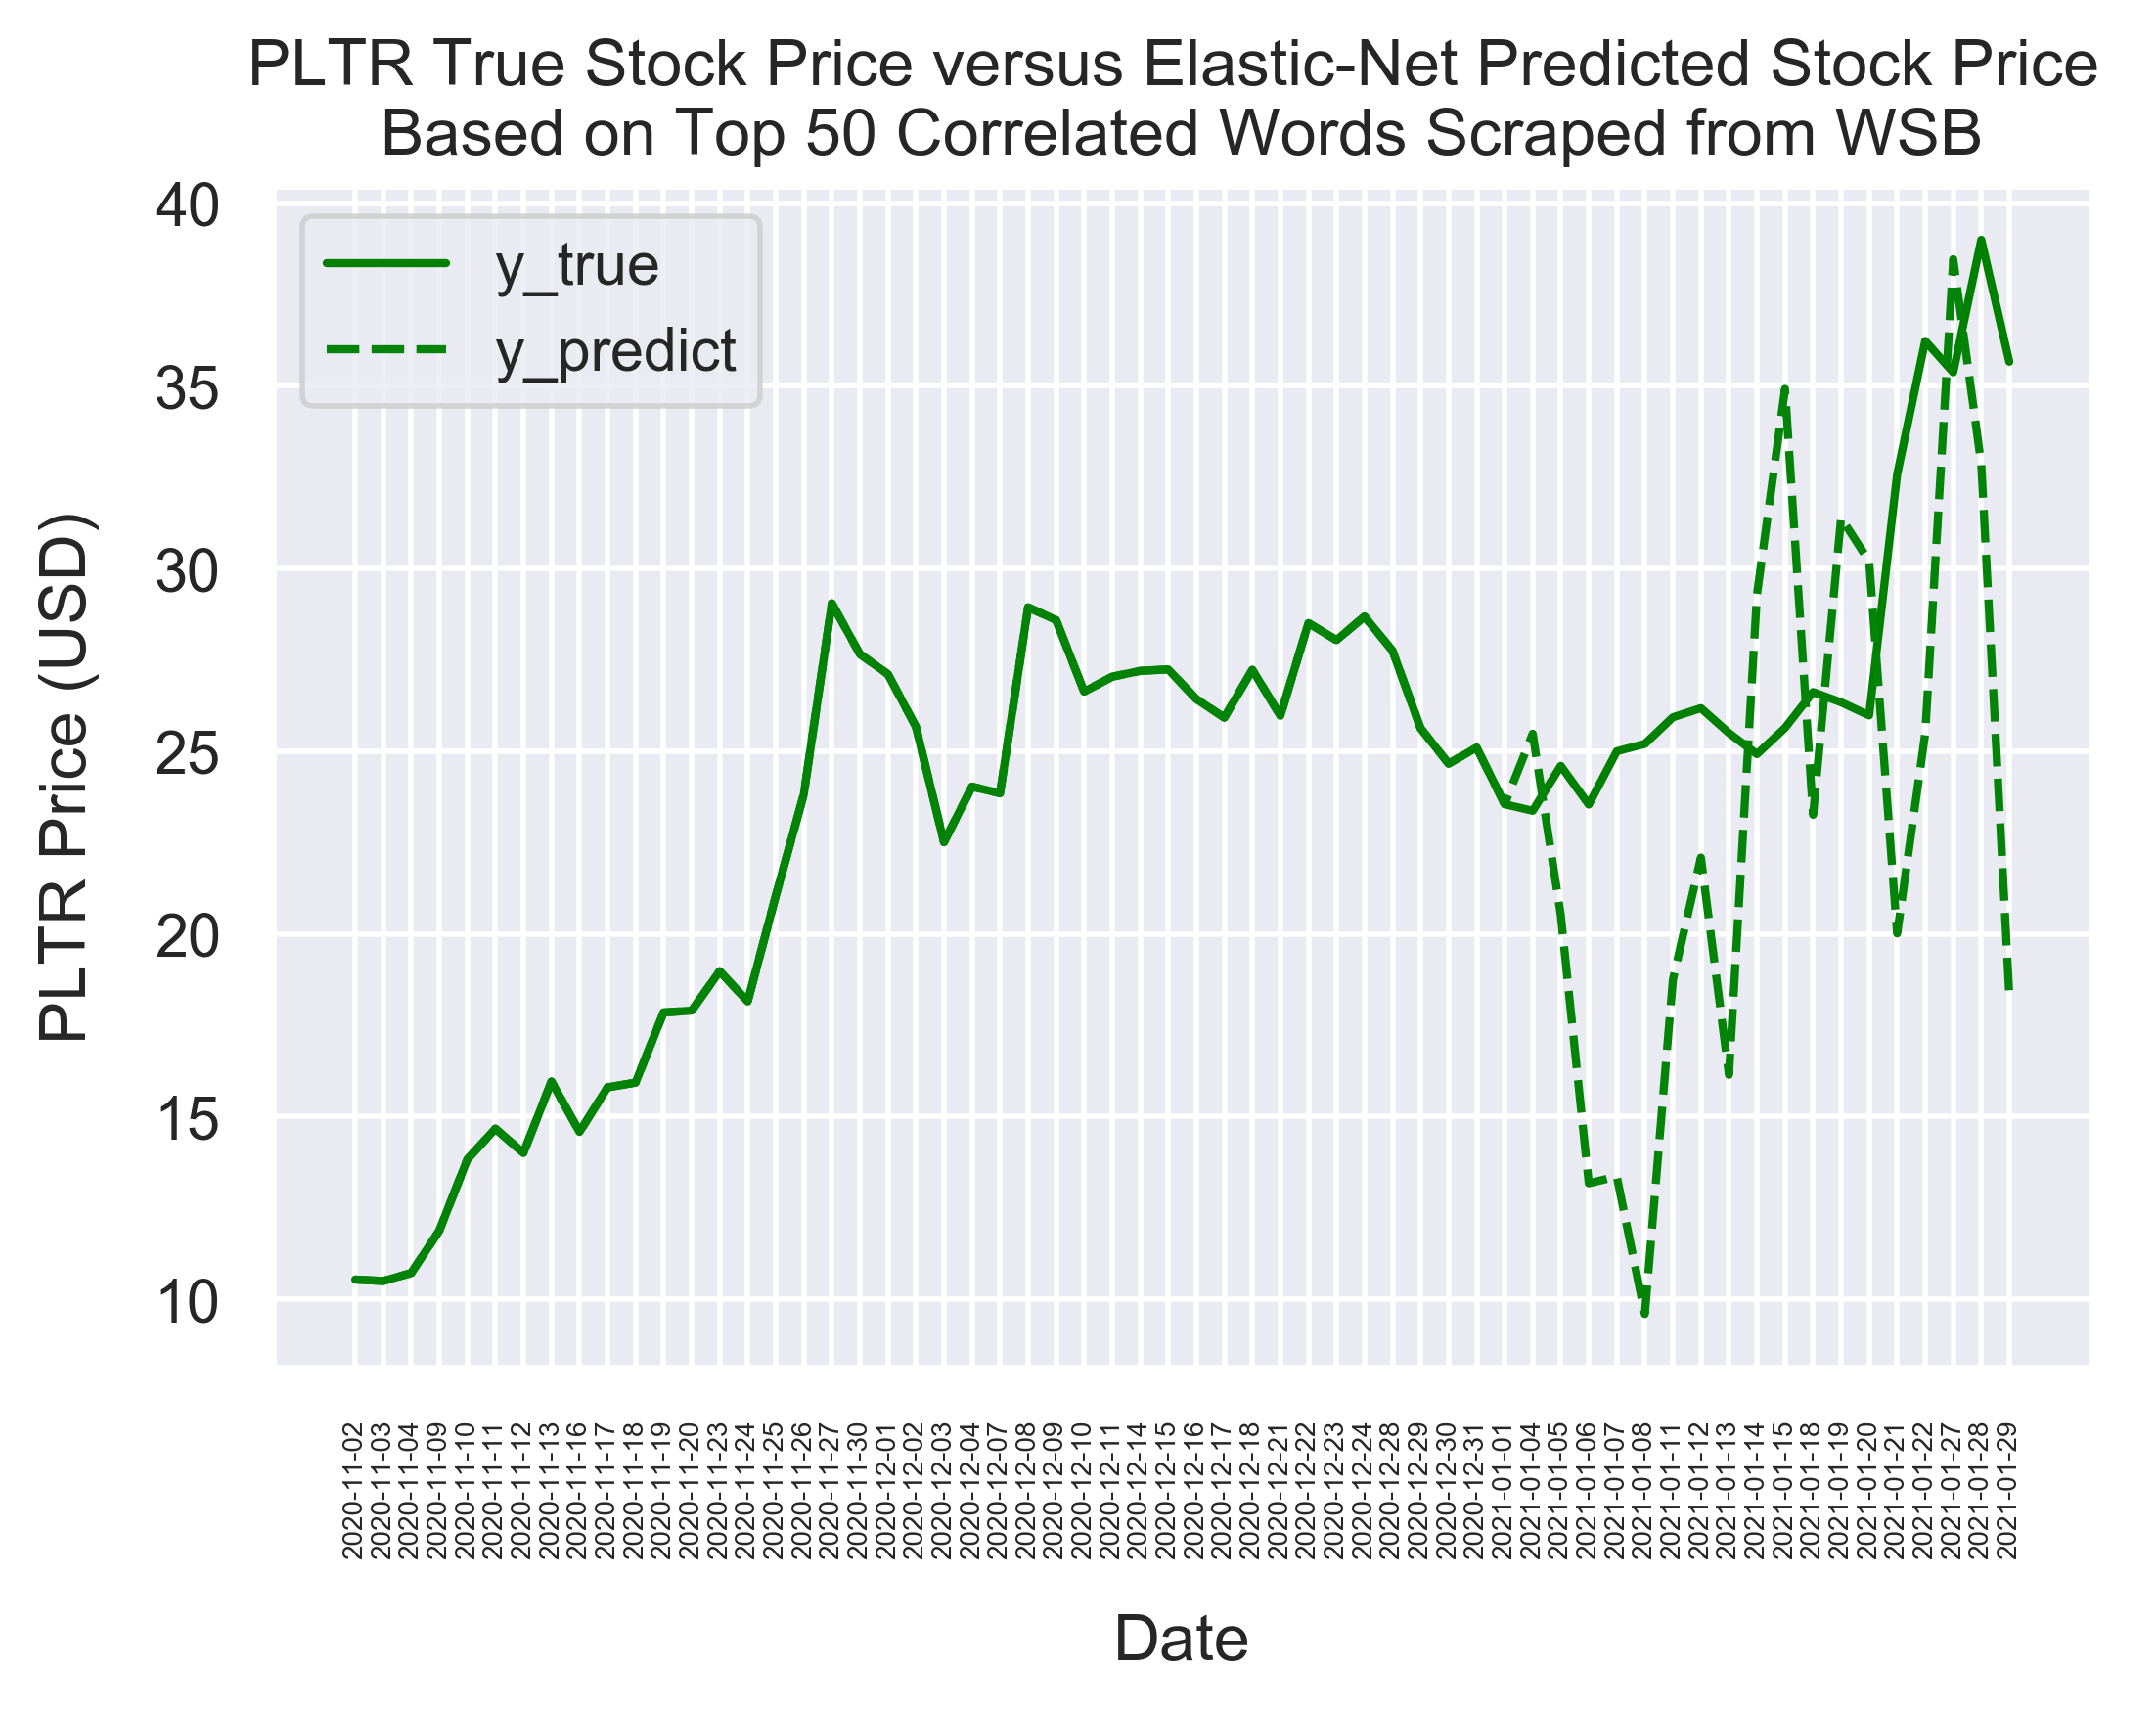

In [35]:
from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()

In [36]:
# list(df2['Unnamed: 0'])

In [37]:
first10pairs = {k: sorted_dict[k] for k in list(sorted_dict)[:10]}

In [38]:
first10pairs

{'pay': 0.6792025516804492,
 'tickers': 0.6762757442764098,
 'trading': 0.6492810892761605,
 'investing': 0.6201200387202442,
 'fellow': 0.6133387180452445,
 'account': 0.6119784066574909,
 'buys': 0.610541485530584,
 'check': 0.6061126900907093,
 'stock': 0.6053687851816354,
 'fund': 0.6028173013098823}

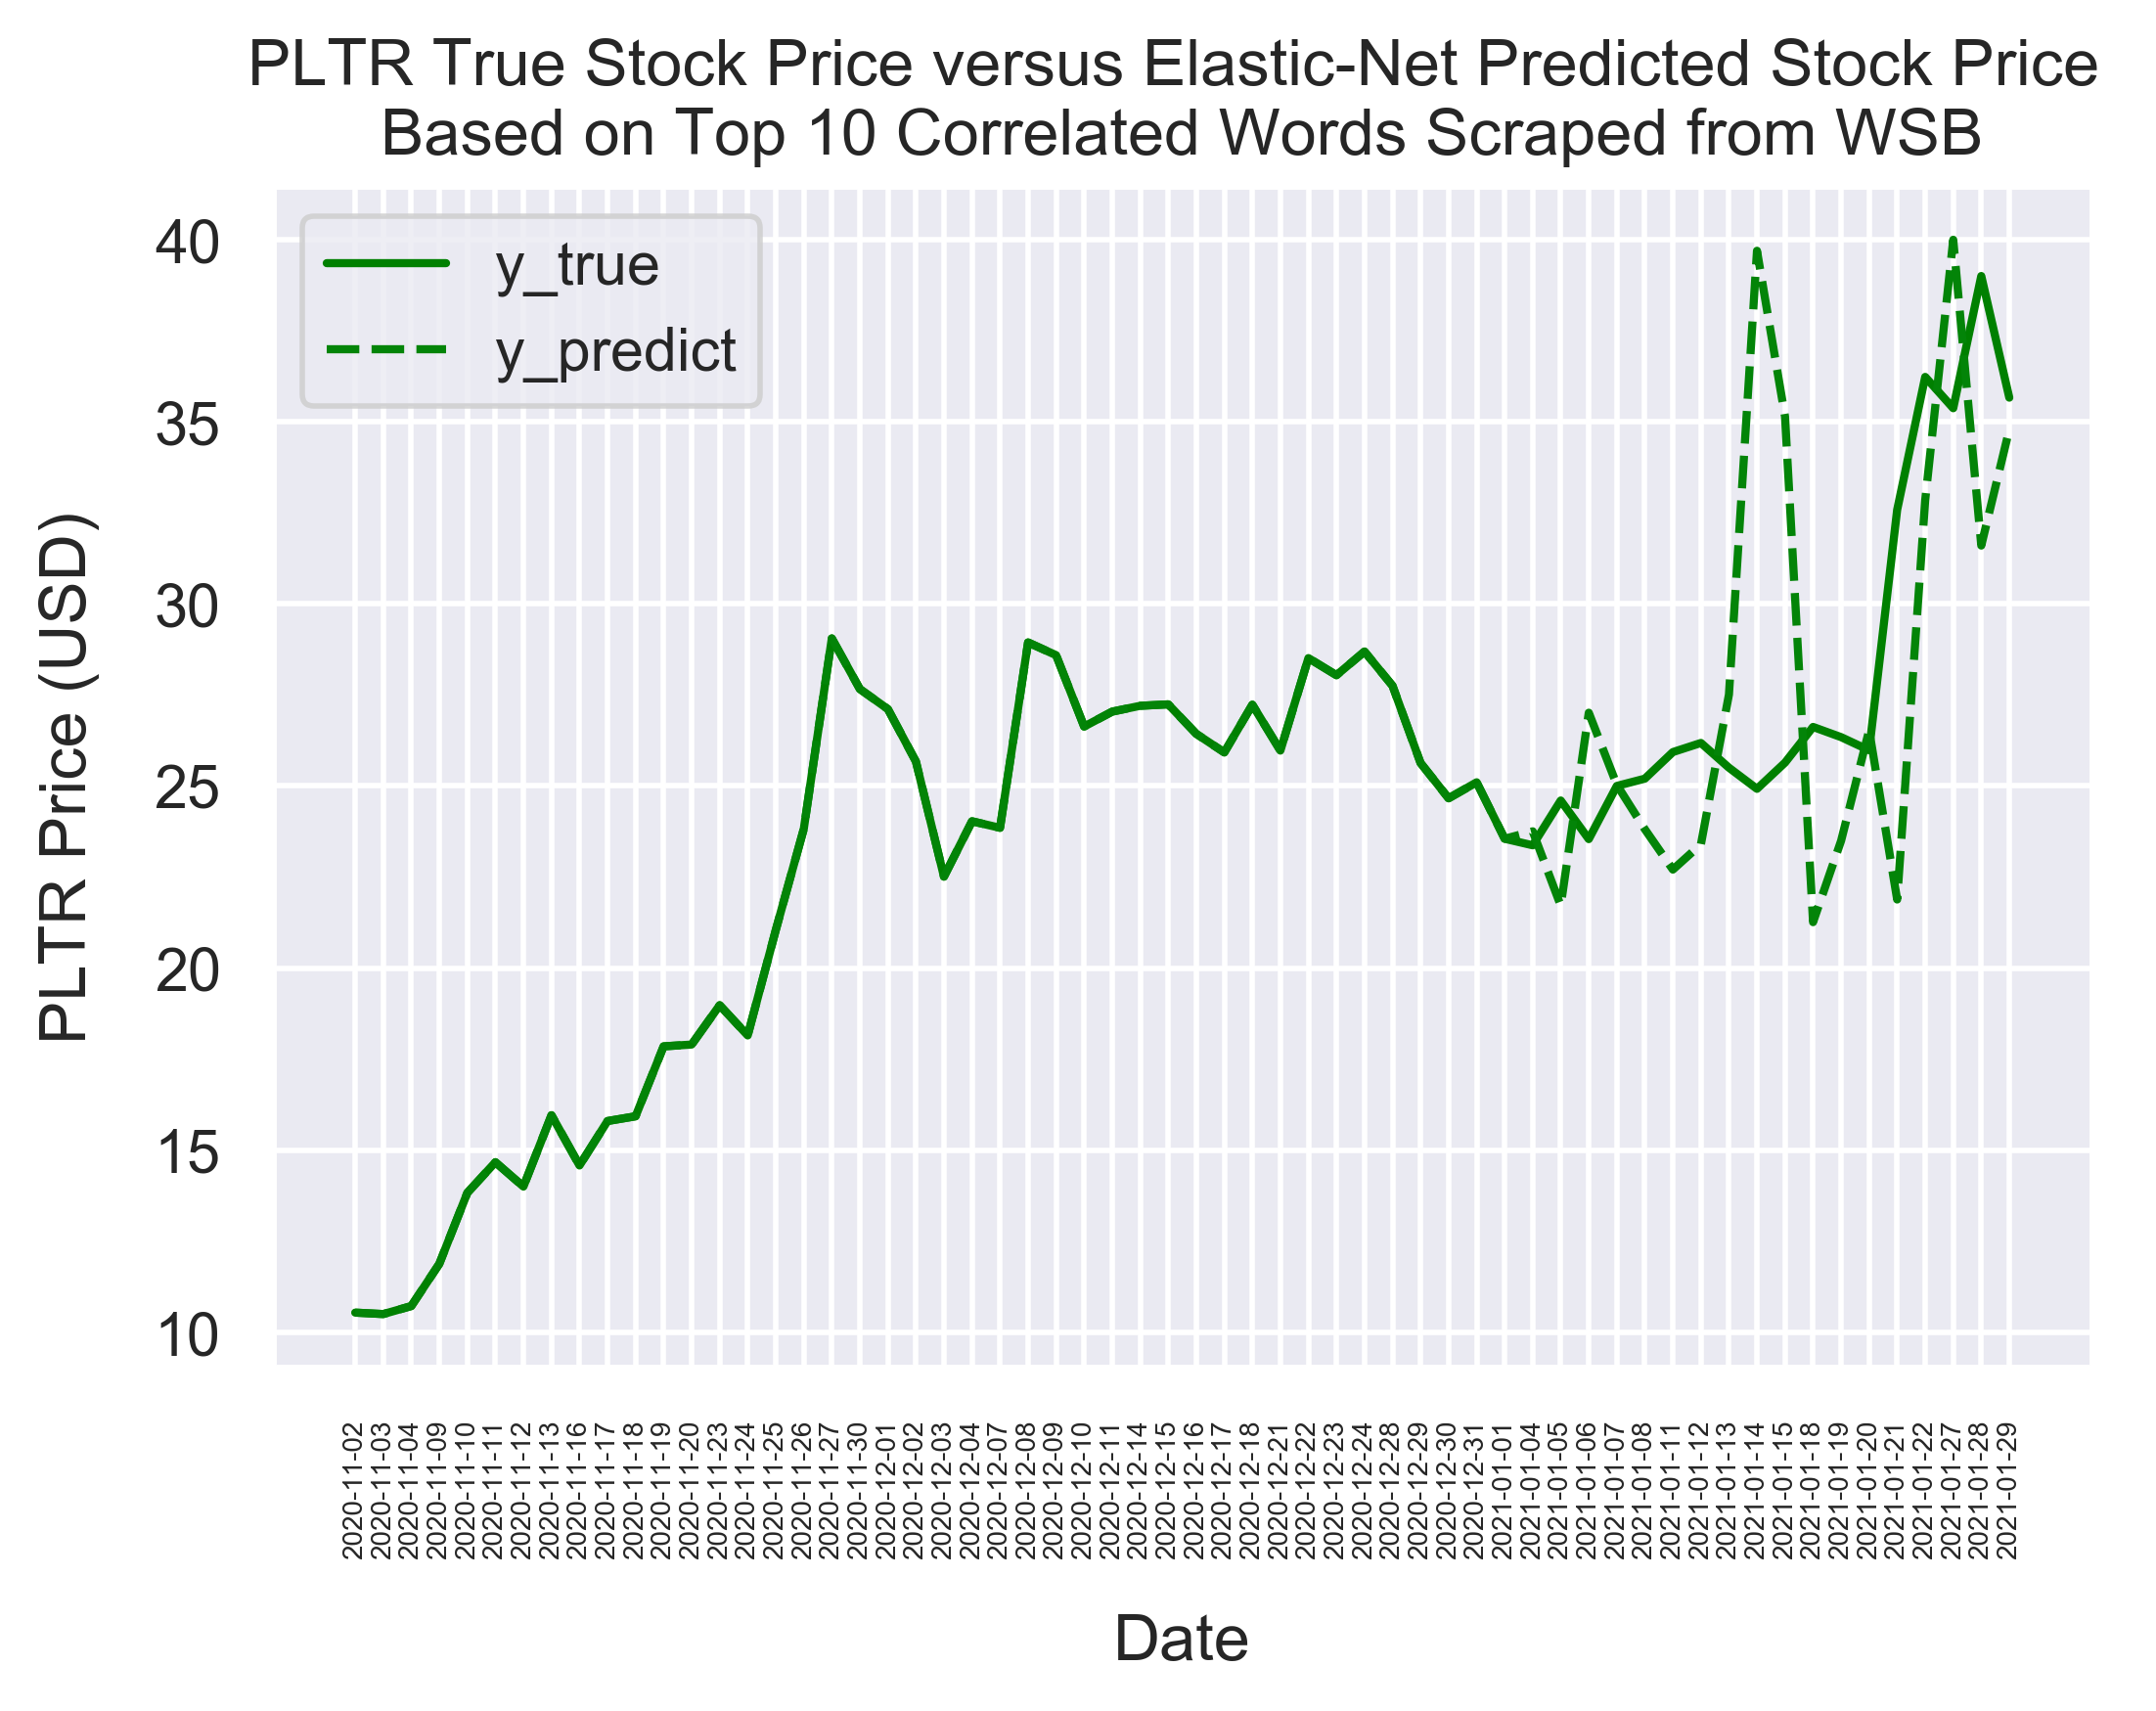

In [39]:
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first10pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 10 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()

In [40]:
import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))



The Root Mean Squared Error is: 5.7404500188101135
The Mean Absolute Error is: 4.232826232910156
The Explained Variance Score is: -0.37765681743621826
The R2 Score is: -0.38157148106797845


# Keras Neural Network Regression

In [41]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# split into input (X) and output (Y) variables
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
model = Sequential()
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')




In [42]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 5ms/step - loss: 520.1065
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 491.8582
Epoch 3/10
2/2 [==============================] - 0s 5ms/step - loss: 449.4740
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 399.5096
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 351.8680
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 293.4909
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 213.3659
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 139.9271
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 68.8499
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 28.6249


In [43]:
pred = model.predict(x_test)
y_pred = [x[0] for x in pred]


In [44]:
y_test

array([23.37, 24.6 , 23.54, 25.  , 25.2 , 25.93, 26.18, 25.5 , 24.92,
       25.64, 26.62, 26.34, 25.98, 32.58, 36.23, 35.37, 39.  , 35.66],
      dtype=float32)

In [45]:
y_pred

[26.815071,
 23.072739,
 30.853006,
 29.618715,
 30.78732,
 30.62743,
 30.61323,
 39.851902,
 48.385914,
 49.475395,
 21.026857,
 29.561344,
 29.64473,
 26.586838,
 37.11043,
 72.30126,
 62.459675,
 55.0128]

In [46]:
import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

The Root Mean Squared Error is: 14.657748082752066
The Mean Absolute Error is: 10.687321662902832
The Explained Variance Score is: -4.43576192855835
The R2 Score is: -8.007743610410198


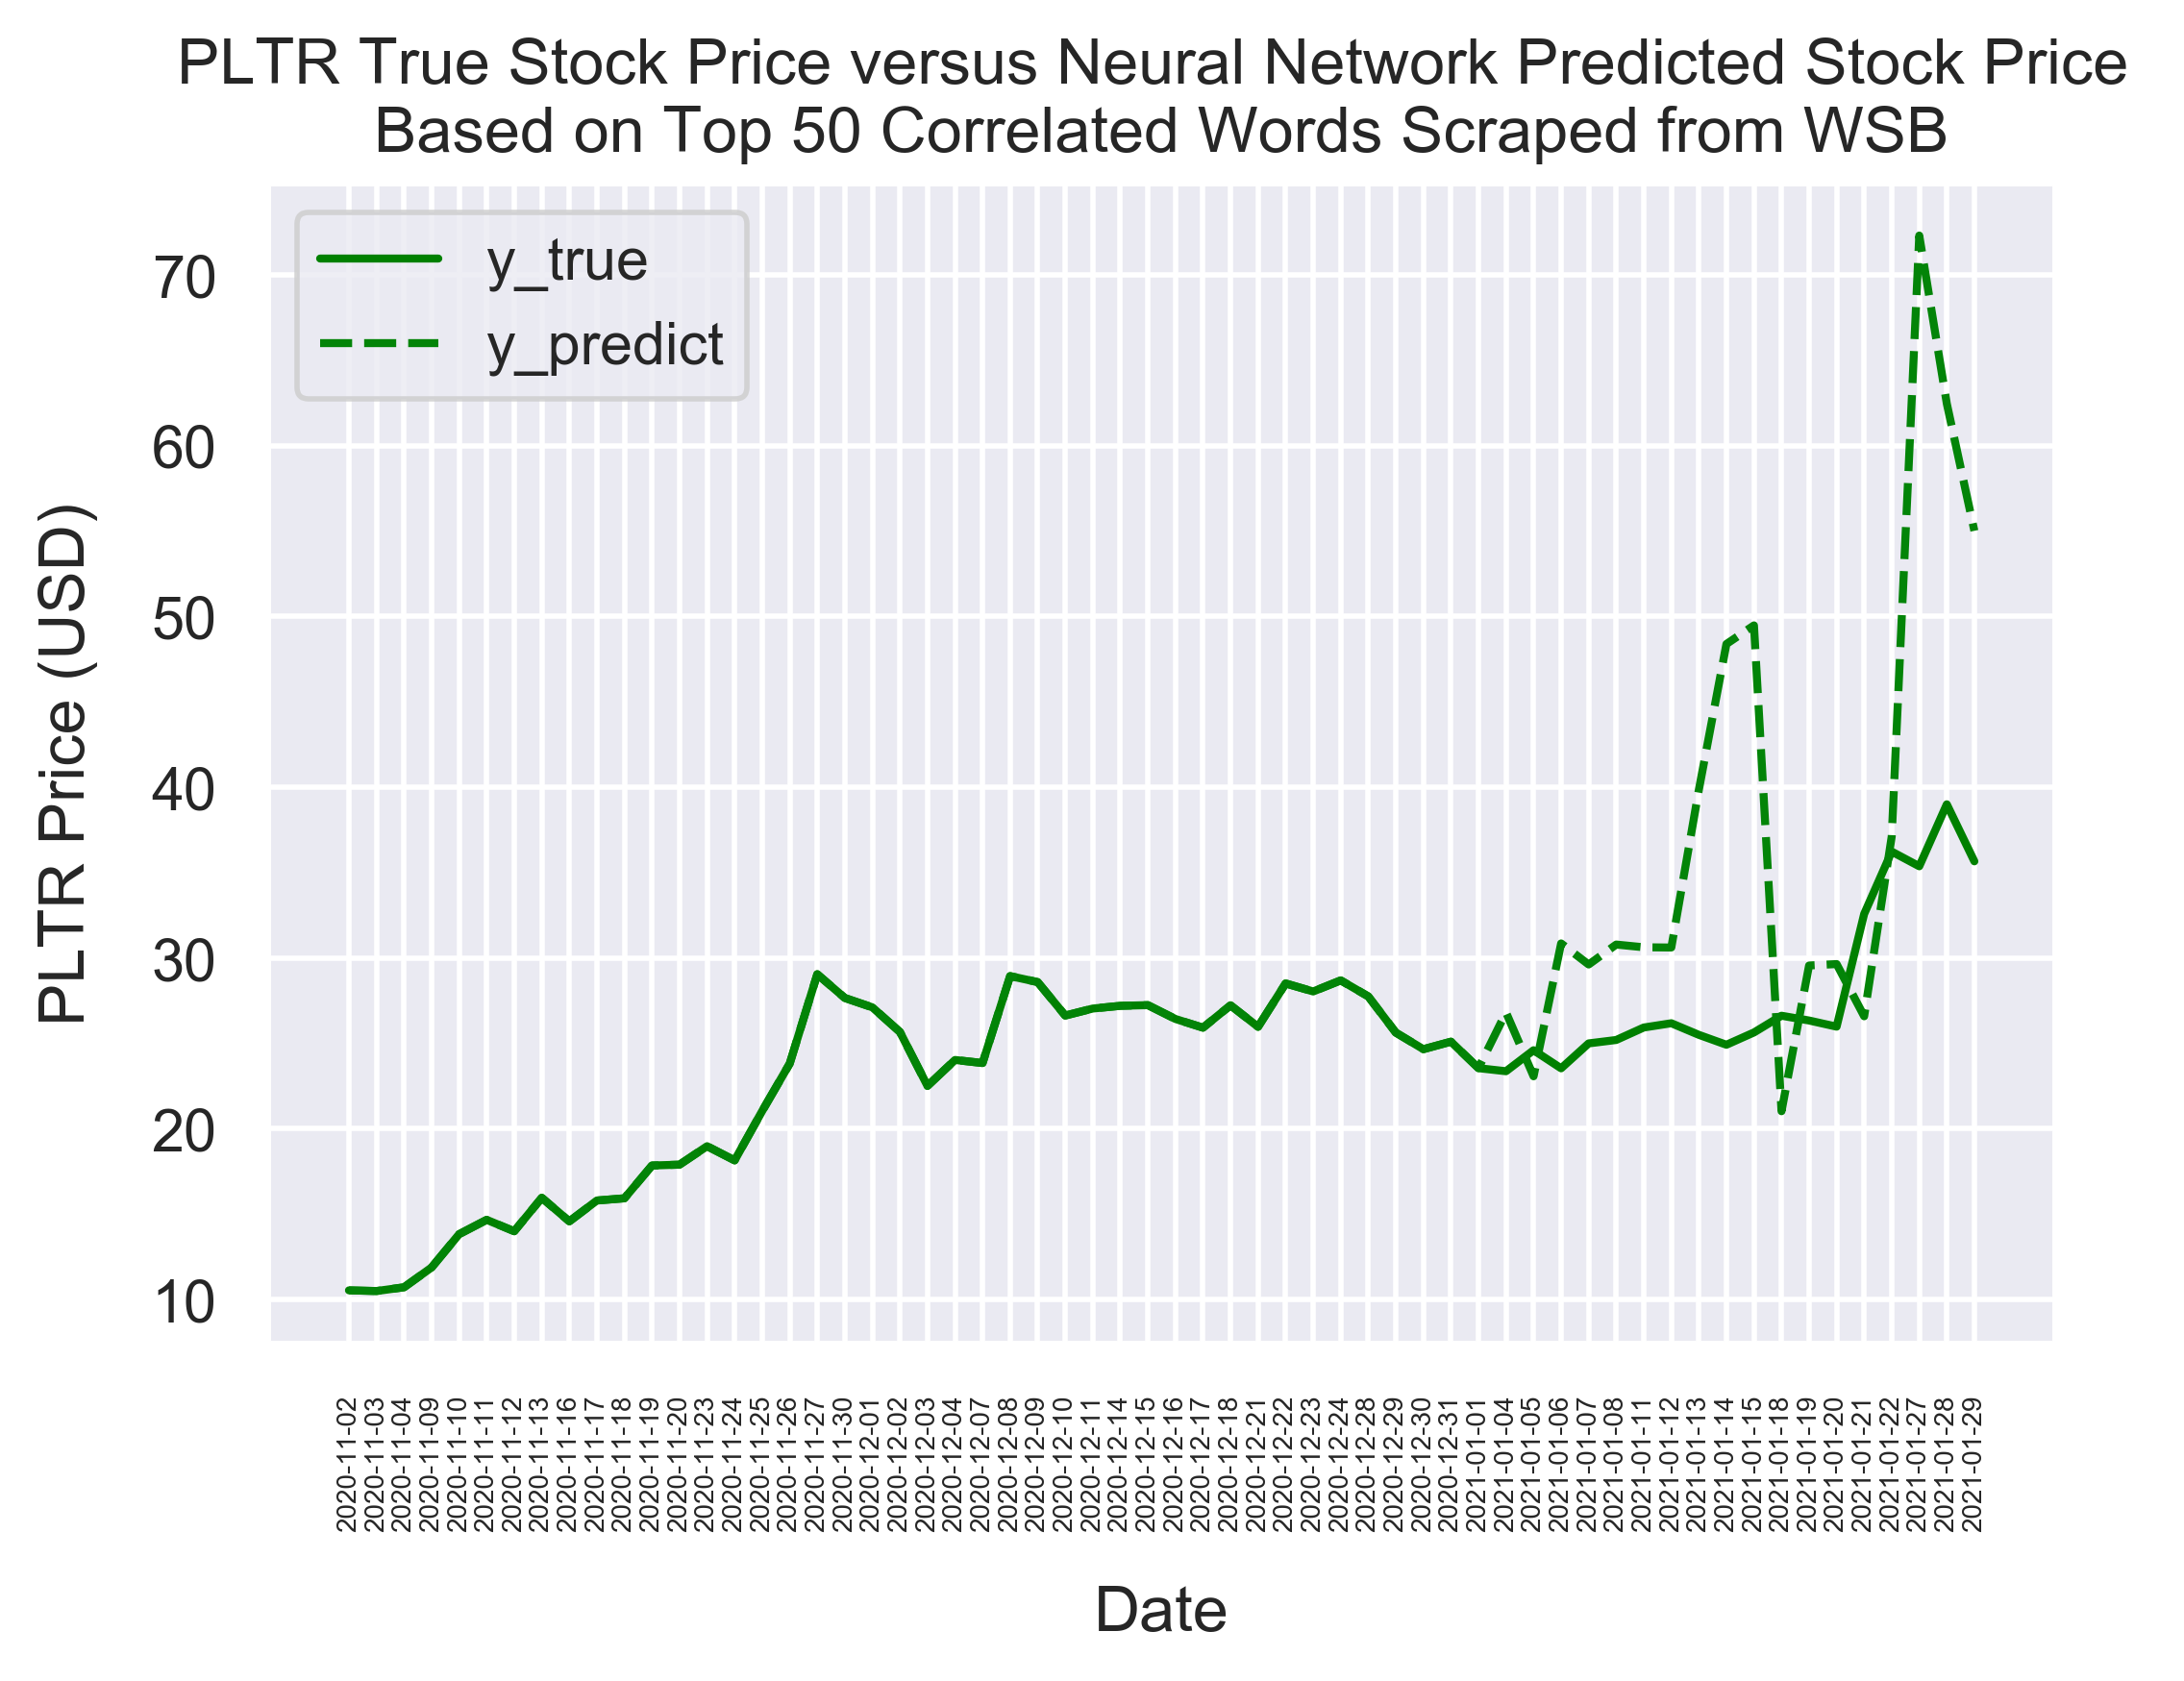

In [47]:
data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Neural Network Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()

Epoch 1/3
2/2 [==============================] - 1s 6ms/step - loss: 972.1294
Epoch 2/3
2/2 [==============================] - 0s 4ms/step - loss: 44.9835
Epoch 3/3
2/2 [==============================] - 0s 4ms/step - loss: 123.2294
The Root Mean Squared Error is: 12.516490587265016
The Mean Absolute Error is: 9.262012481689453
The Explained Variance Score is: -3.6596970558166504
The R2 Score is: -5.568205107186129


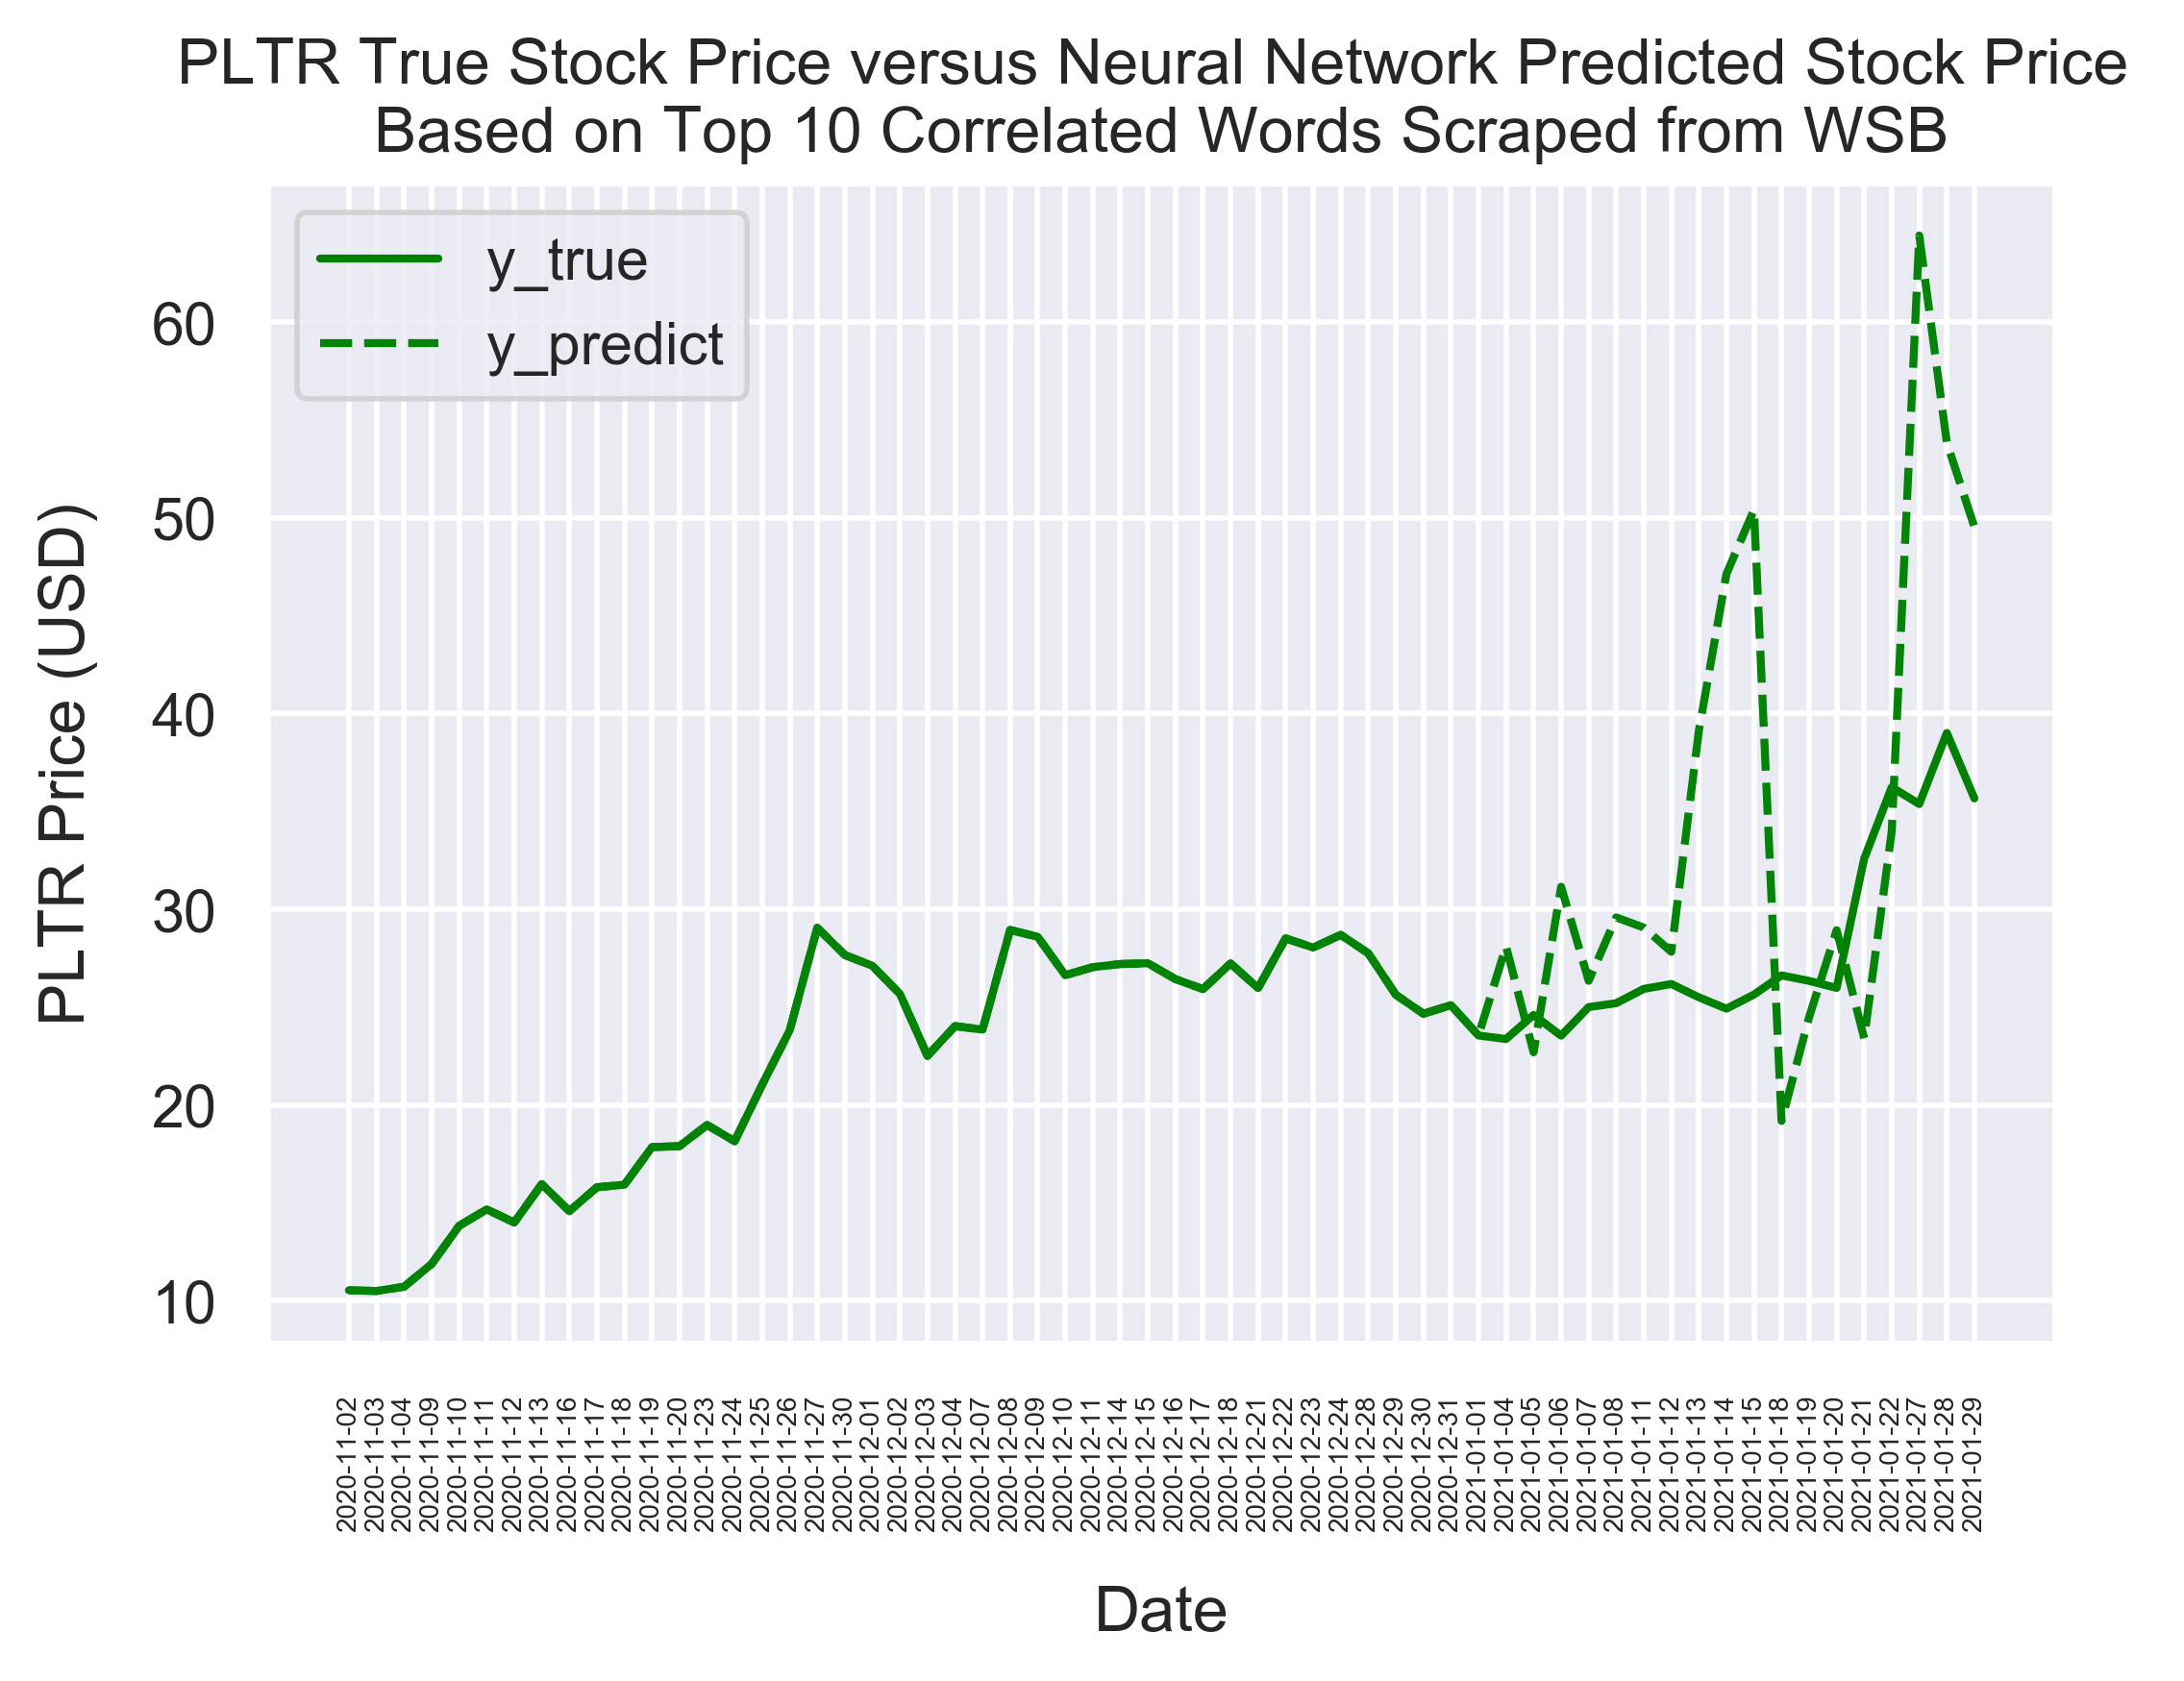

In [48]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# split into input (X) and output (Y) variables
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=3)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Neural Network Predicted Stock Price \nBased on Top 10 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()


# Functional Keras

In [49]:
from tensorflow.keras.models import Model

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 437.3919
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 336.5712
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 296.8775
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 284.9767
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 274.1192
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 253.2593
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 243.1603
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 219.0339
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 201.2367
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 190.2537
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - loss: 175.8026
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 167.3172
Epoch 13/100
2/2 [================

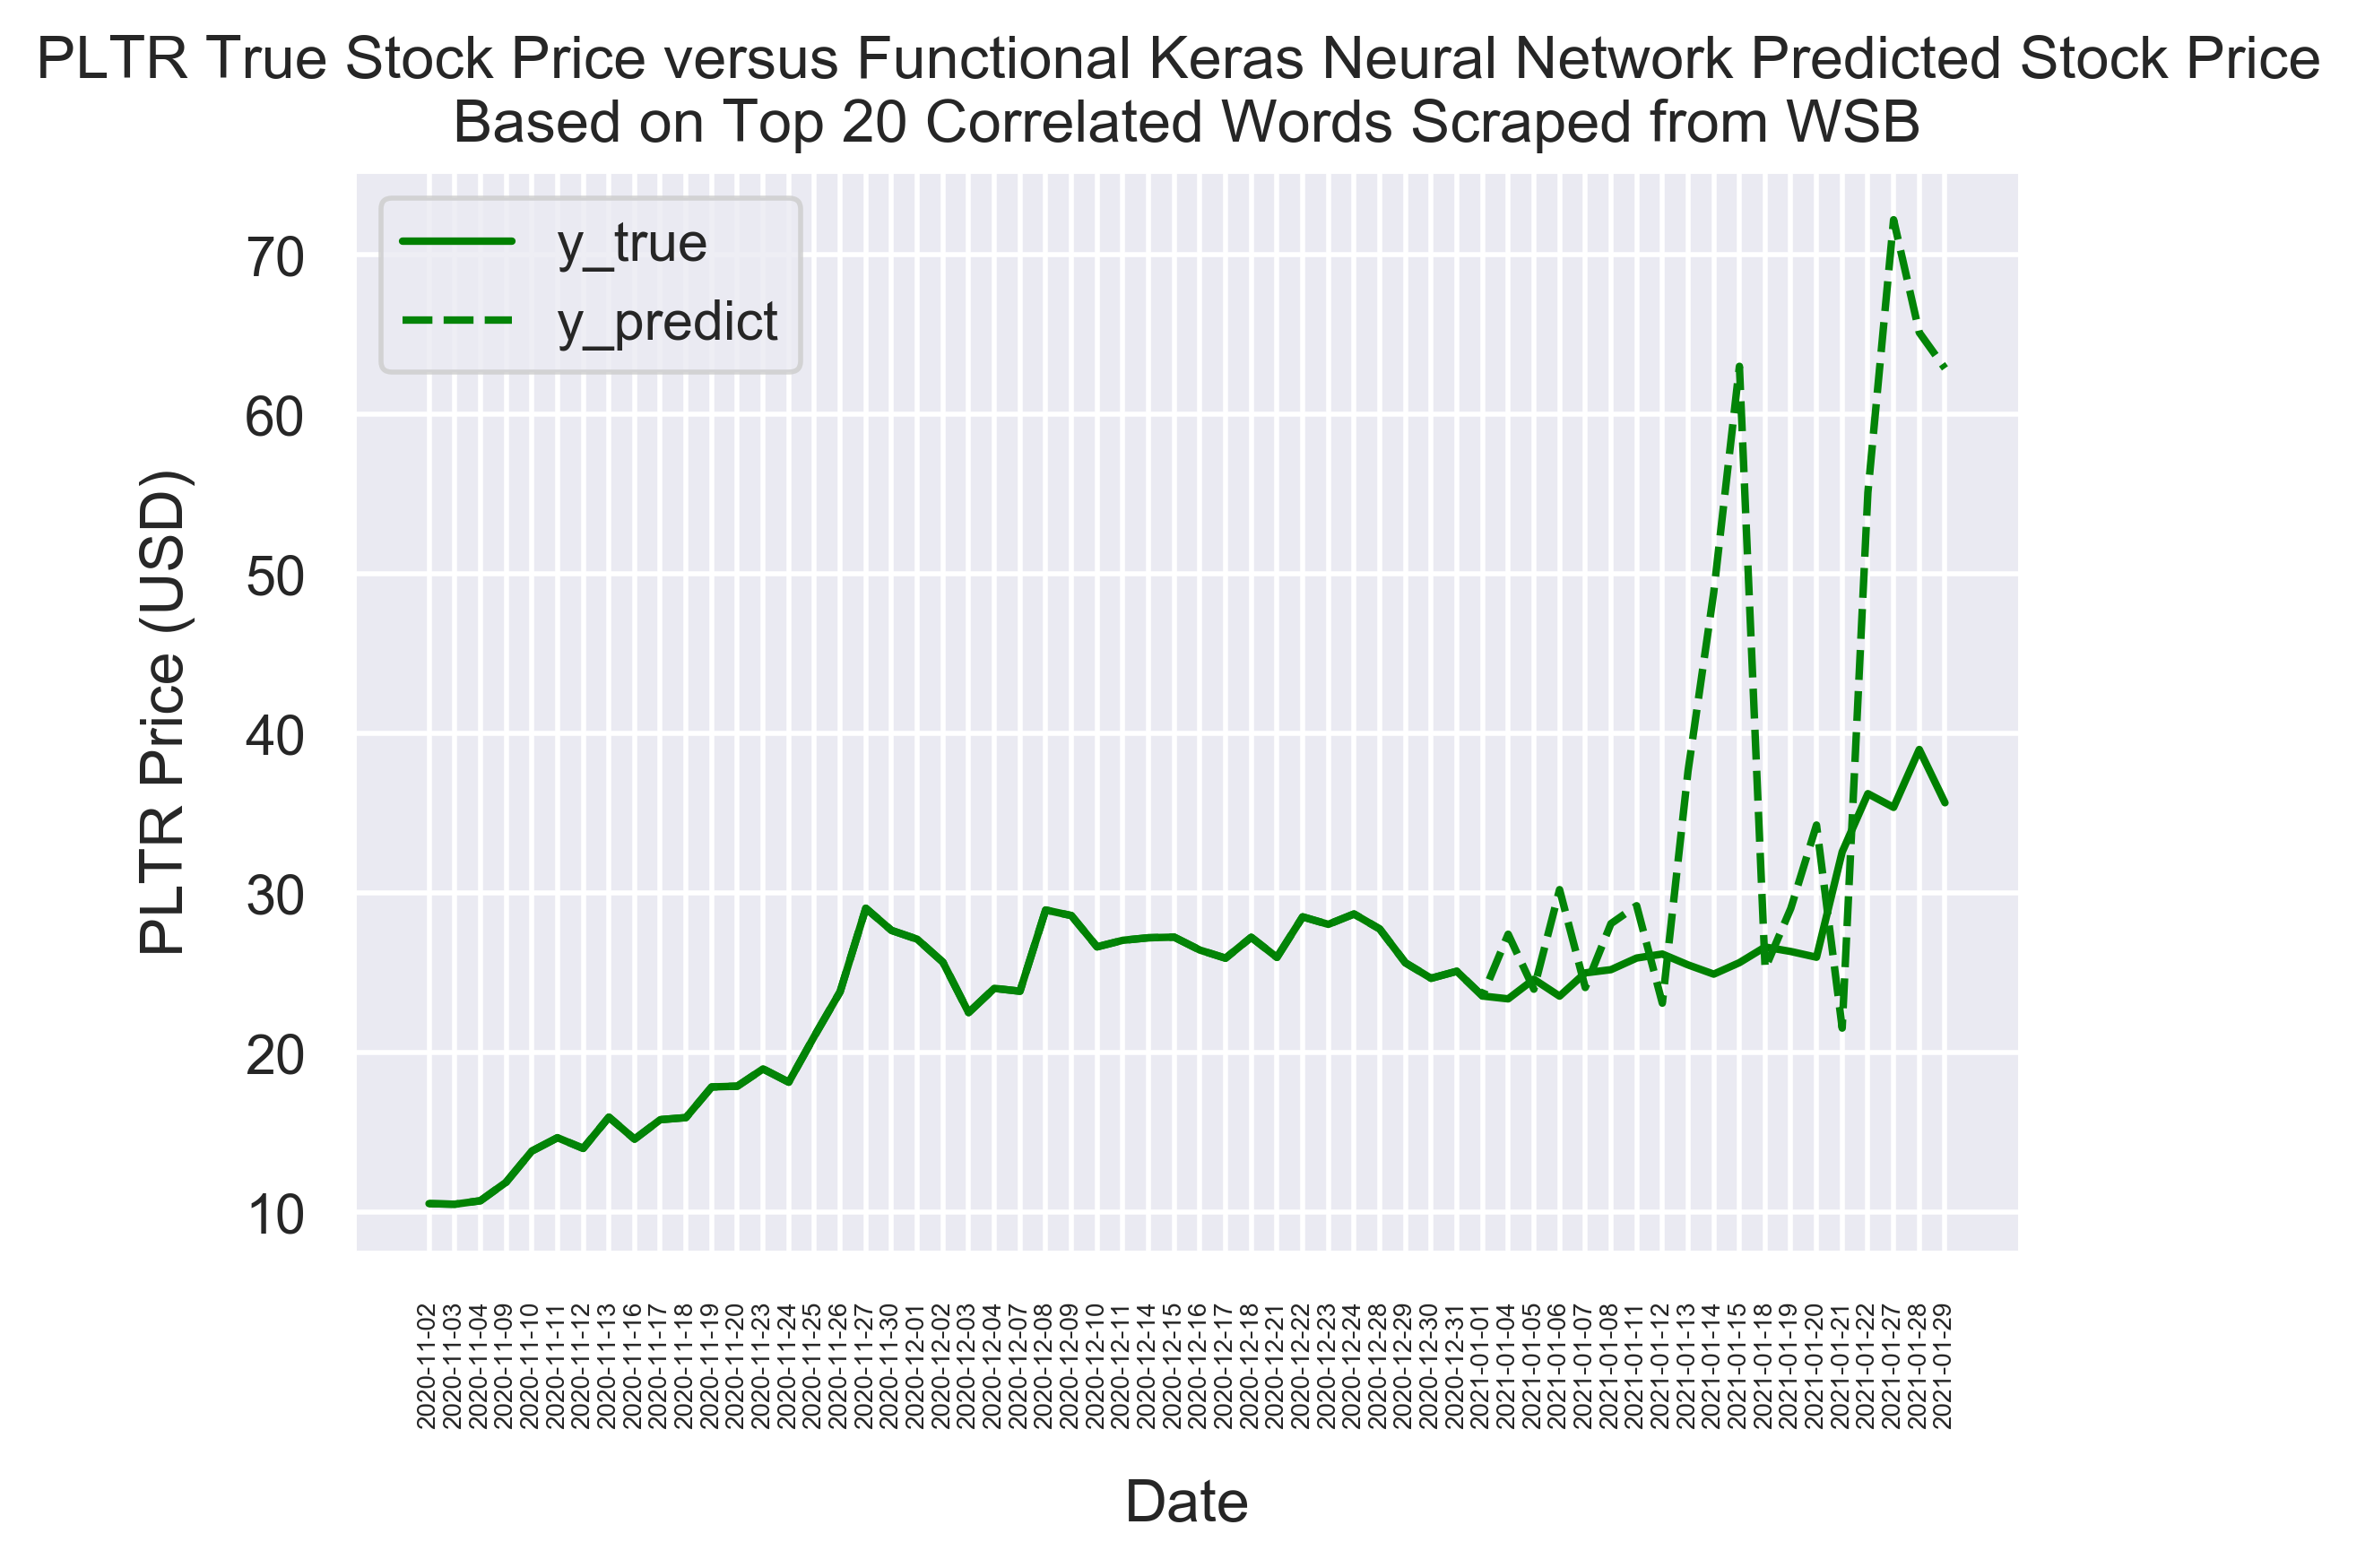

In [50]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, Dense, Activation


# split into input (X) and output (Y) variables
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first20pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
# a = Input(shape=(20,))
# b = Dense(200, activation='relu')(a)
# model = Model(inputs=a, outputs=b)


inputs = tf.keras.Input(shape=(20,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
x3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x2)
x4 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x3)
outputs = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x4)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=100)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Functional Keras Neural Network Predicted Stock Price \nBased on Top 20 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()



Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 356.4854
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 304.9978
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 292.1582
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 285.6151
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 270.4950
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 255.8583
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 245.0847
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 235.5410
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 221.4571
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 211.4890
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 199.8139
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 197.0688
Epoch 13/100
2/2 [==================

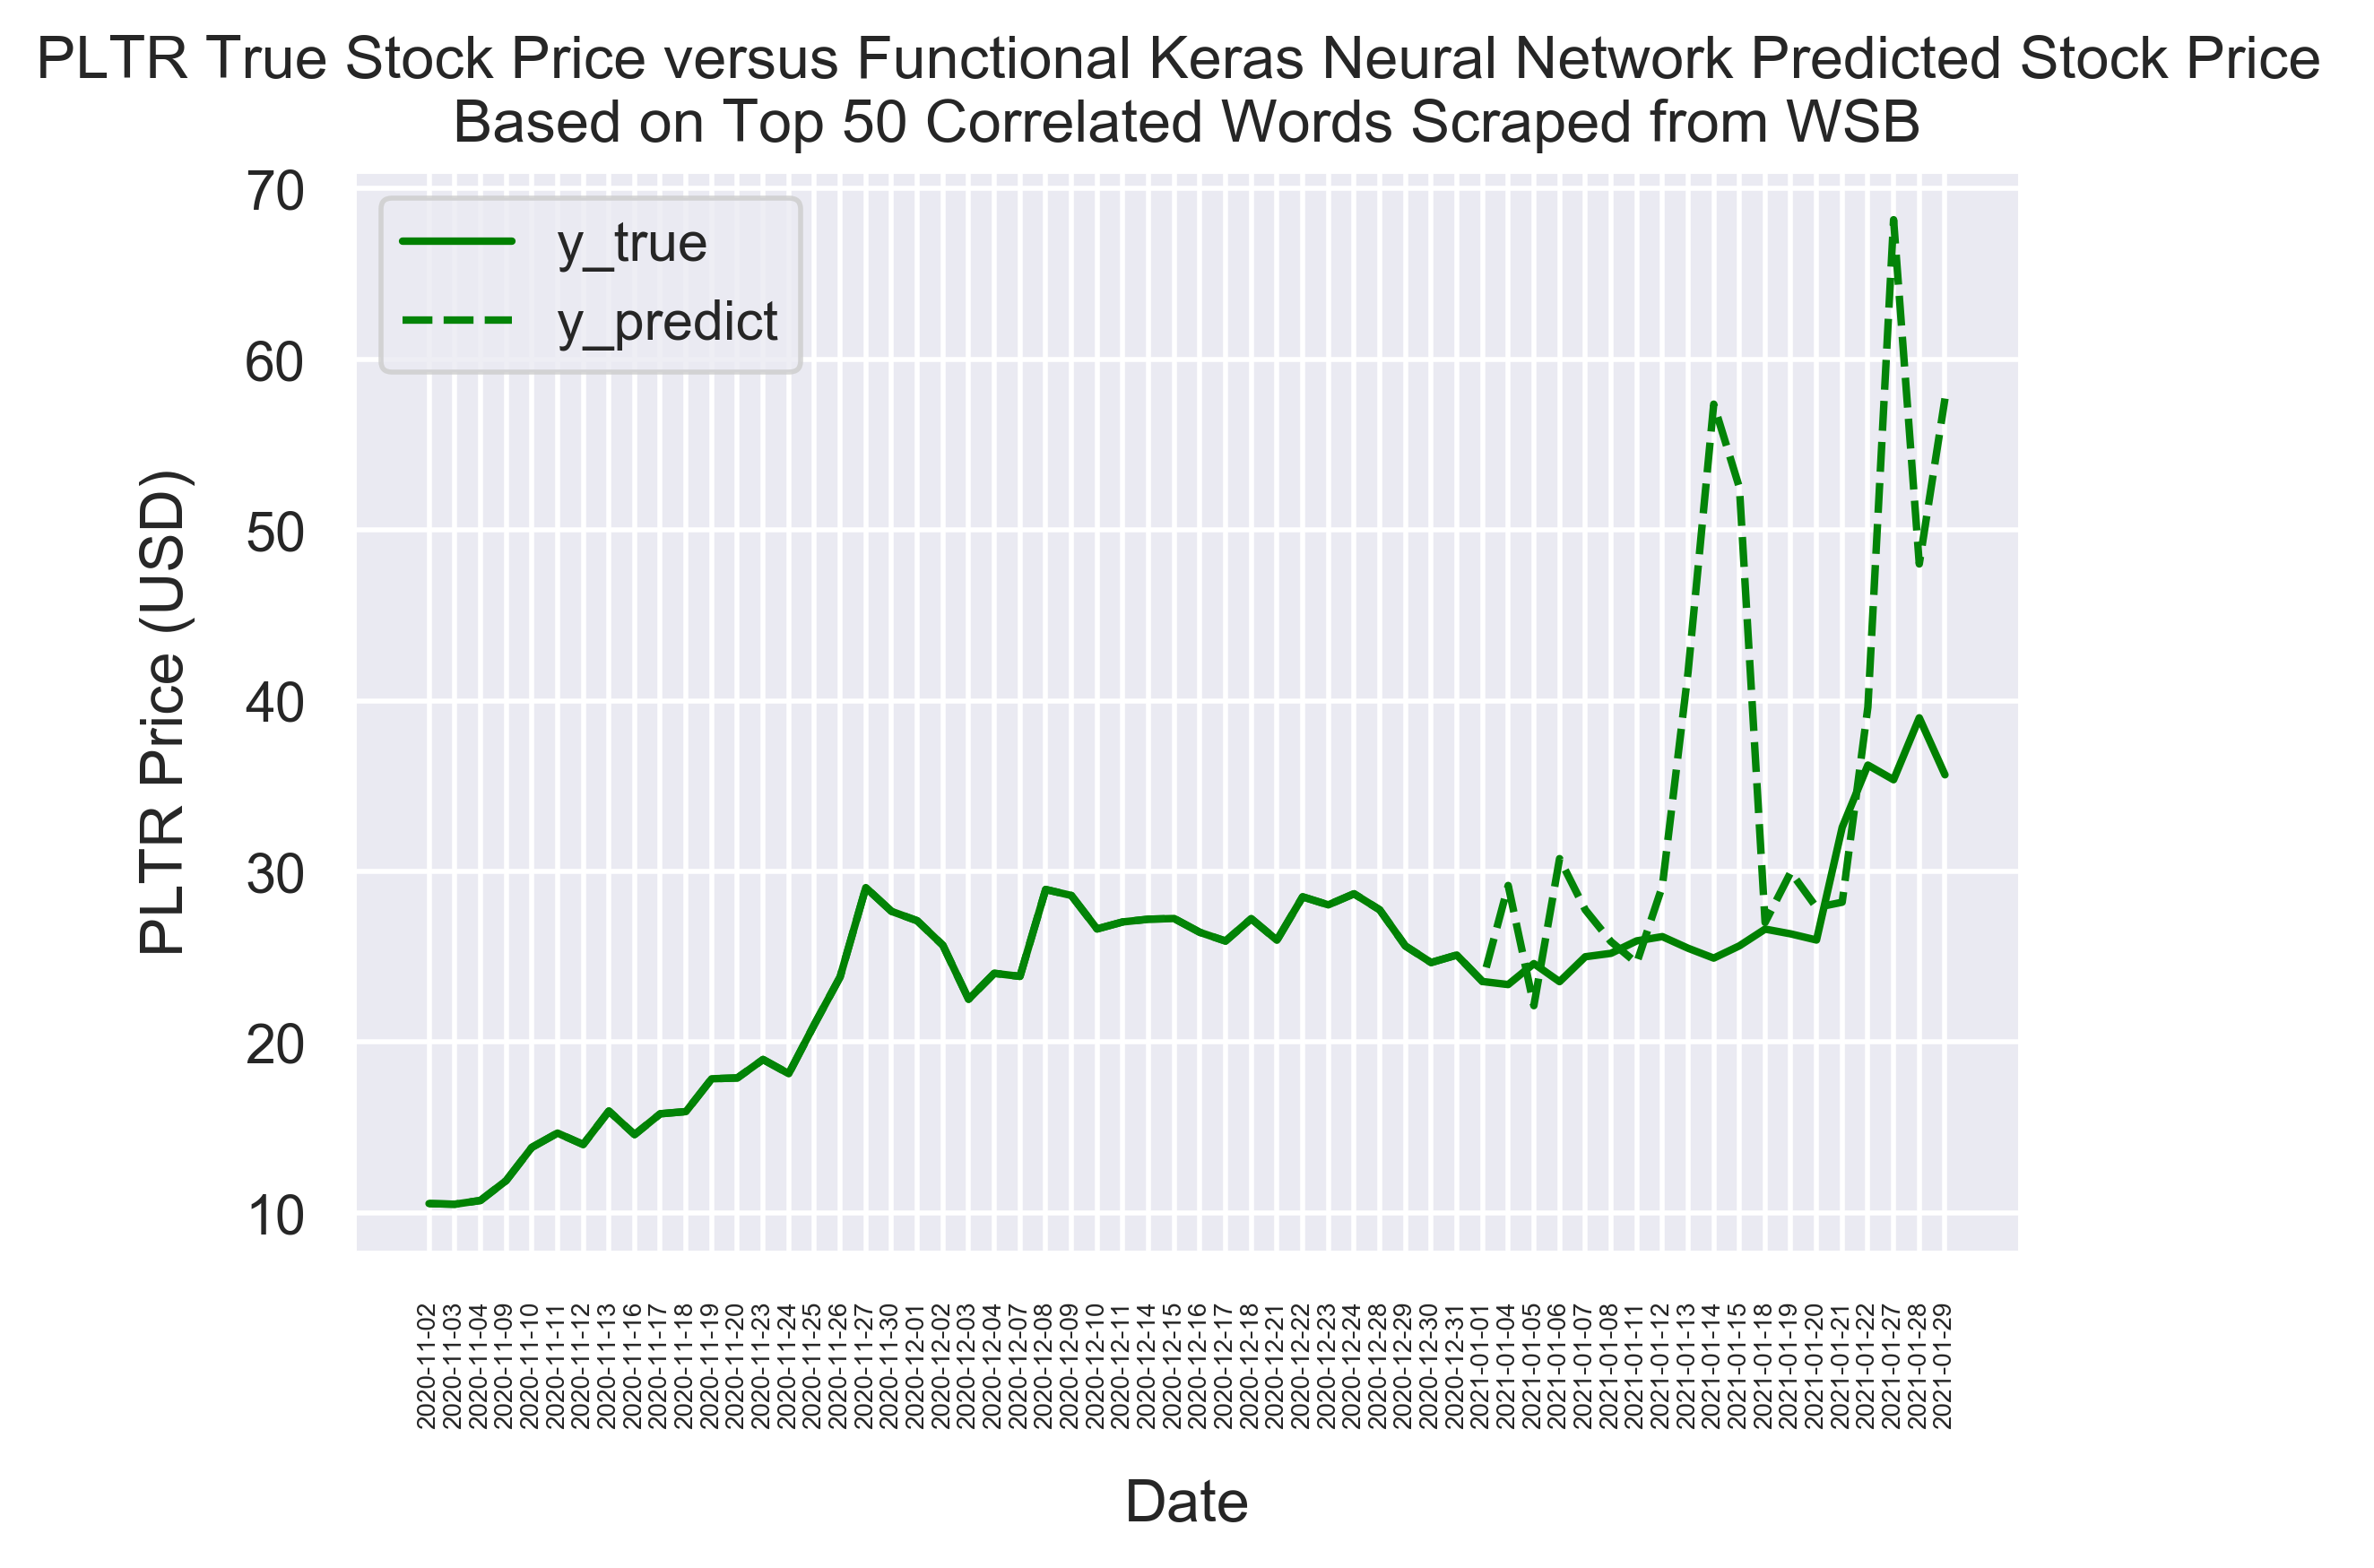

In [51]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, Dense, Activation


# split into input (X) and output (Y) variables
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
# a = Input(shape=(20,))
# b = Dense(200, activation='relu')(a)
# model = Model(inputs=a, outputs=b)


inputs = tf.keras.Input(shape=(50,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
x3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x2)
x4 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x3)
outputs = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x4)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=100)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Functional Keras Neural Network Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()

In [52]:
dec = df2[19:41]

In [53]:
dec.to_csv("dec.csv")

Epoch 1/100
1/1 [==============================] - 1s 809ms/step - loss: 538.3929
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 500.9296
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 471.6529
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 449.8580
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 432.7567
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 419.1238
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 408.3769
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 399.5661
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 392.0695
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 386.0265
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 381.1940
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 377.6558
Epoch 13/100
1/1 [================

The Root Mean Squared Error is: 26.95833509426514
The Mean Absolute Error is: 26.91143226623535
The Explained Variance Score is: 0.0
The R2 Score is: -286.6127339310034


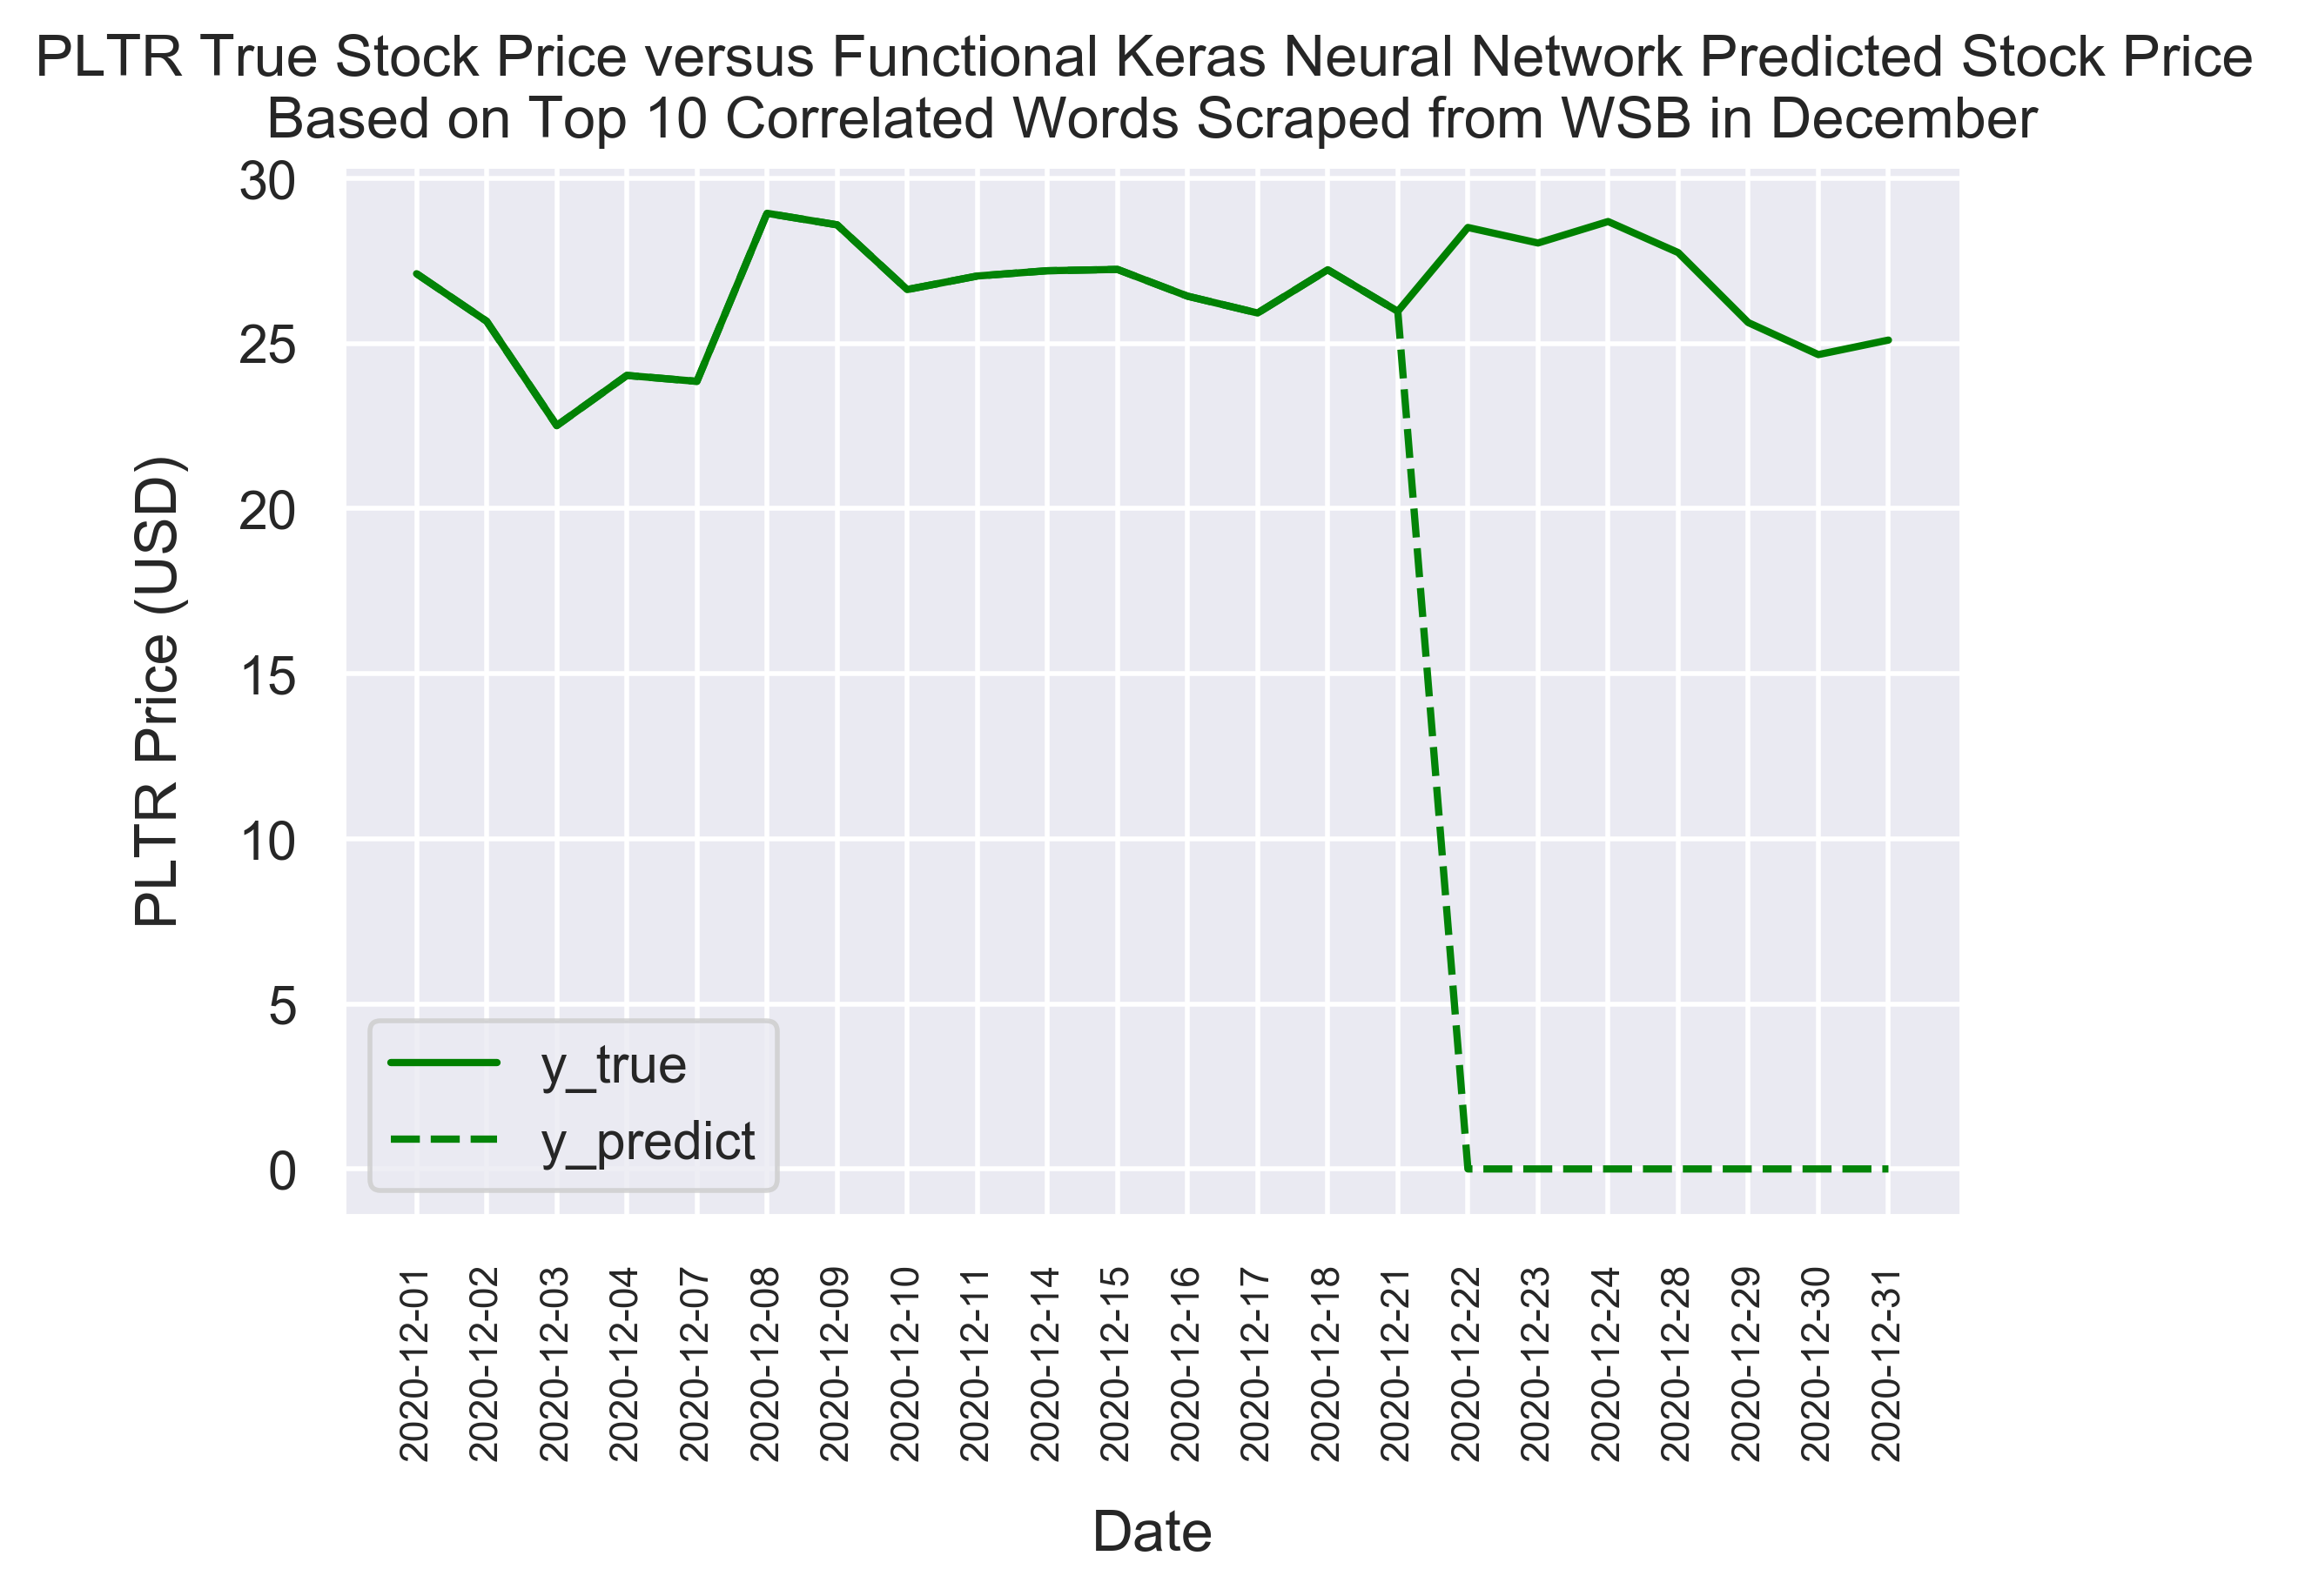

In [54]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, Dense, Activation


# split into input (X) and output (Y) variables
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first10pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
inputs = tf.keras.Input(shape=(10,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
x3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x2)
x4 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x3)
outputs = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x4)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=100)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Functional Keras Neural Network Predicted Stock Price \nBased on Top 10 Correlated Words Scraped from WSB in December")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=8)
plt.show()



Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 583.7285
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 508.9904
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 462.5215
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 435.6497
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 421.5045
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 413.8247
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 407.6787
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 401.3950
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 394.4149
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 387.1513
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 379.7636
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 372.4788
Epoch 13/100
1/1 [==============

The Root Mean Squared Error is: 26.95833509426514
The Mean Absolute Error is: 26.91143226623535
The Explained Variance Score is: 0.0
The R2 Score is: -286.6127339310034


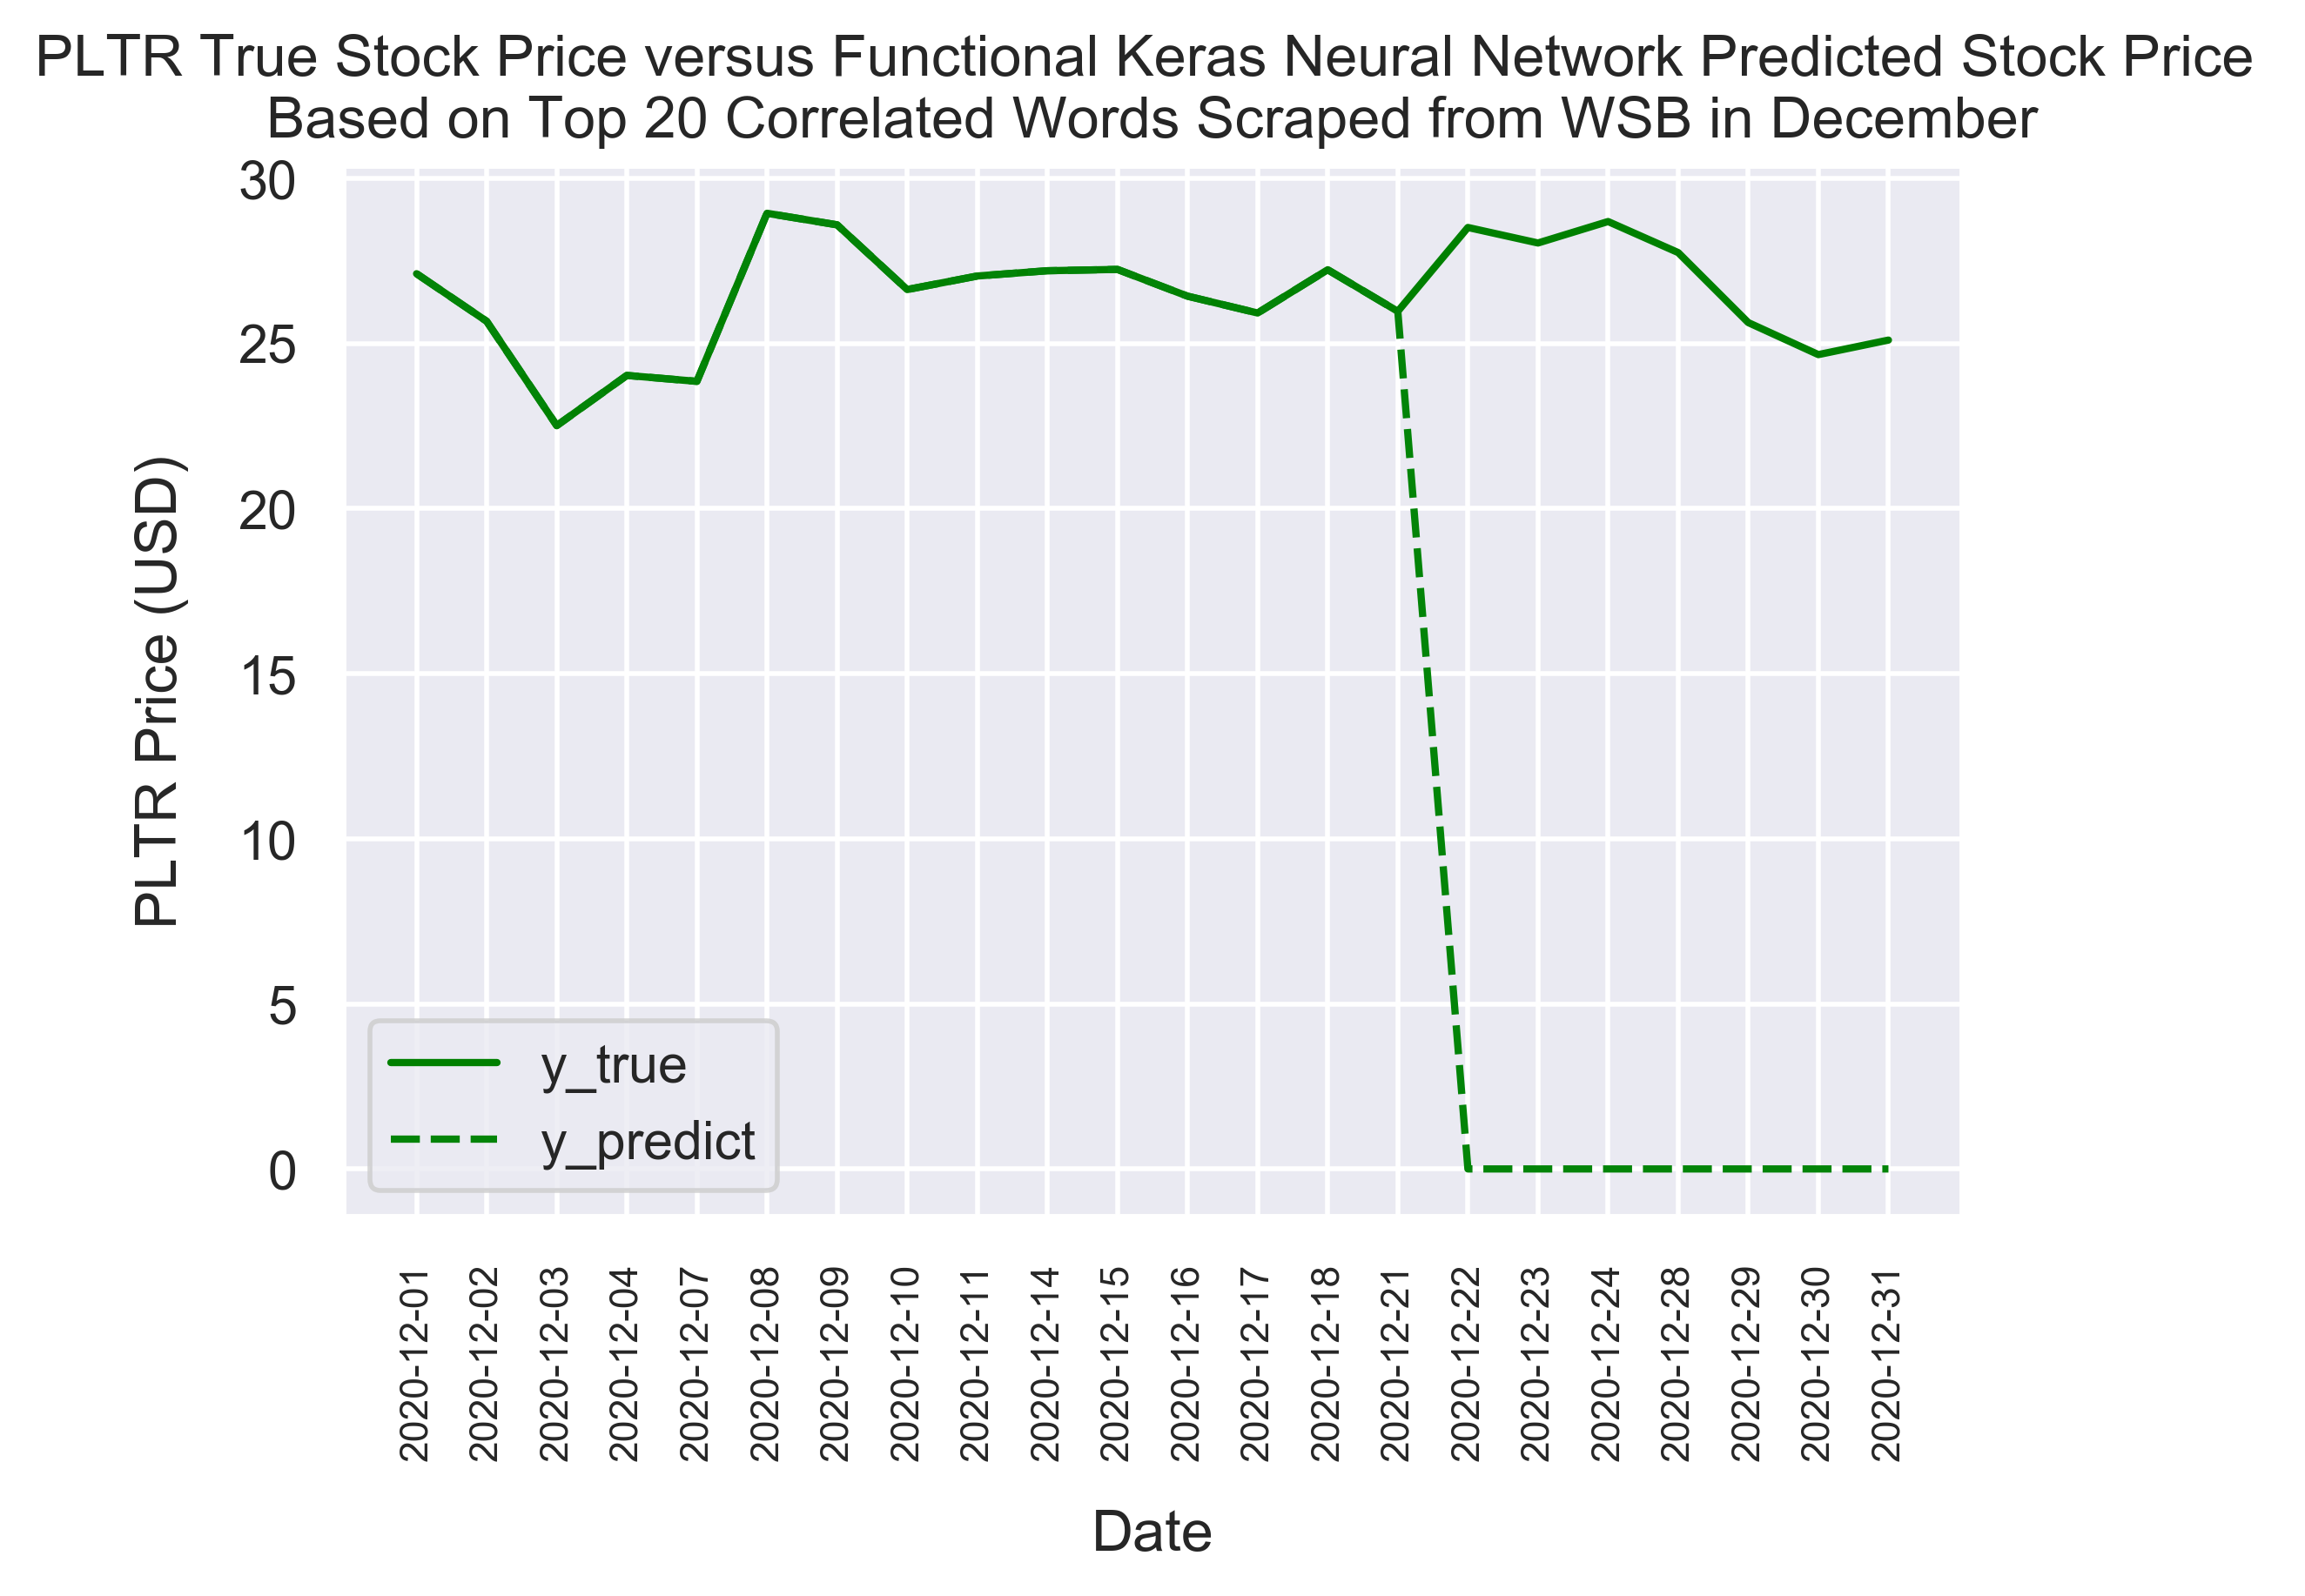

In [55]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, Dense, Activation


# split into input (X) and output (Y) variables
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first20pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
inputs = tf.keras.Input(shape=(20,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
x3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x2)
x4 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x3)
outputs = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x4)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=100)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Functional Keras Neural Network Predicted Stock Price \nBased on Top 20 Correlated Words Scraped from WSB in December")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=8)
plt.show()




Epoch 1/100
1/1 [==============================] - 1s 513ms/step - loss: 561.0861
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 487.1427
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 442.5580
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 417.8532
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 402.3902
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 390.6652
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 381.7288
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 373.1102
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 361.9691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 349.5546
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 337.3581
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 325.6177
Epoch 13/100
1/1 [=================

The Root Mean Squared Error is: 4.766796931018499
The Mean Absolute Error is: 3.8645241260528564
The Explained Variance Score is: -7.265022277832031
The R2 Score is: -7.992392888082067


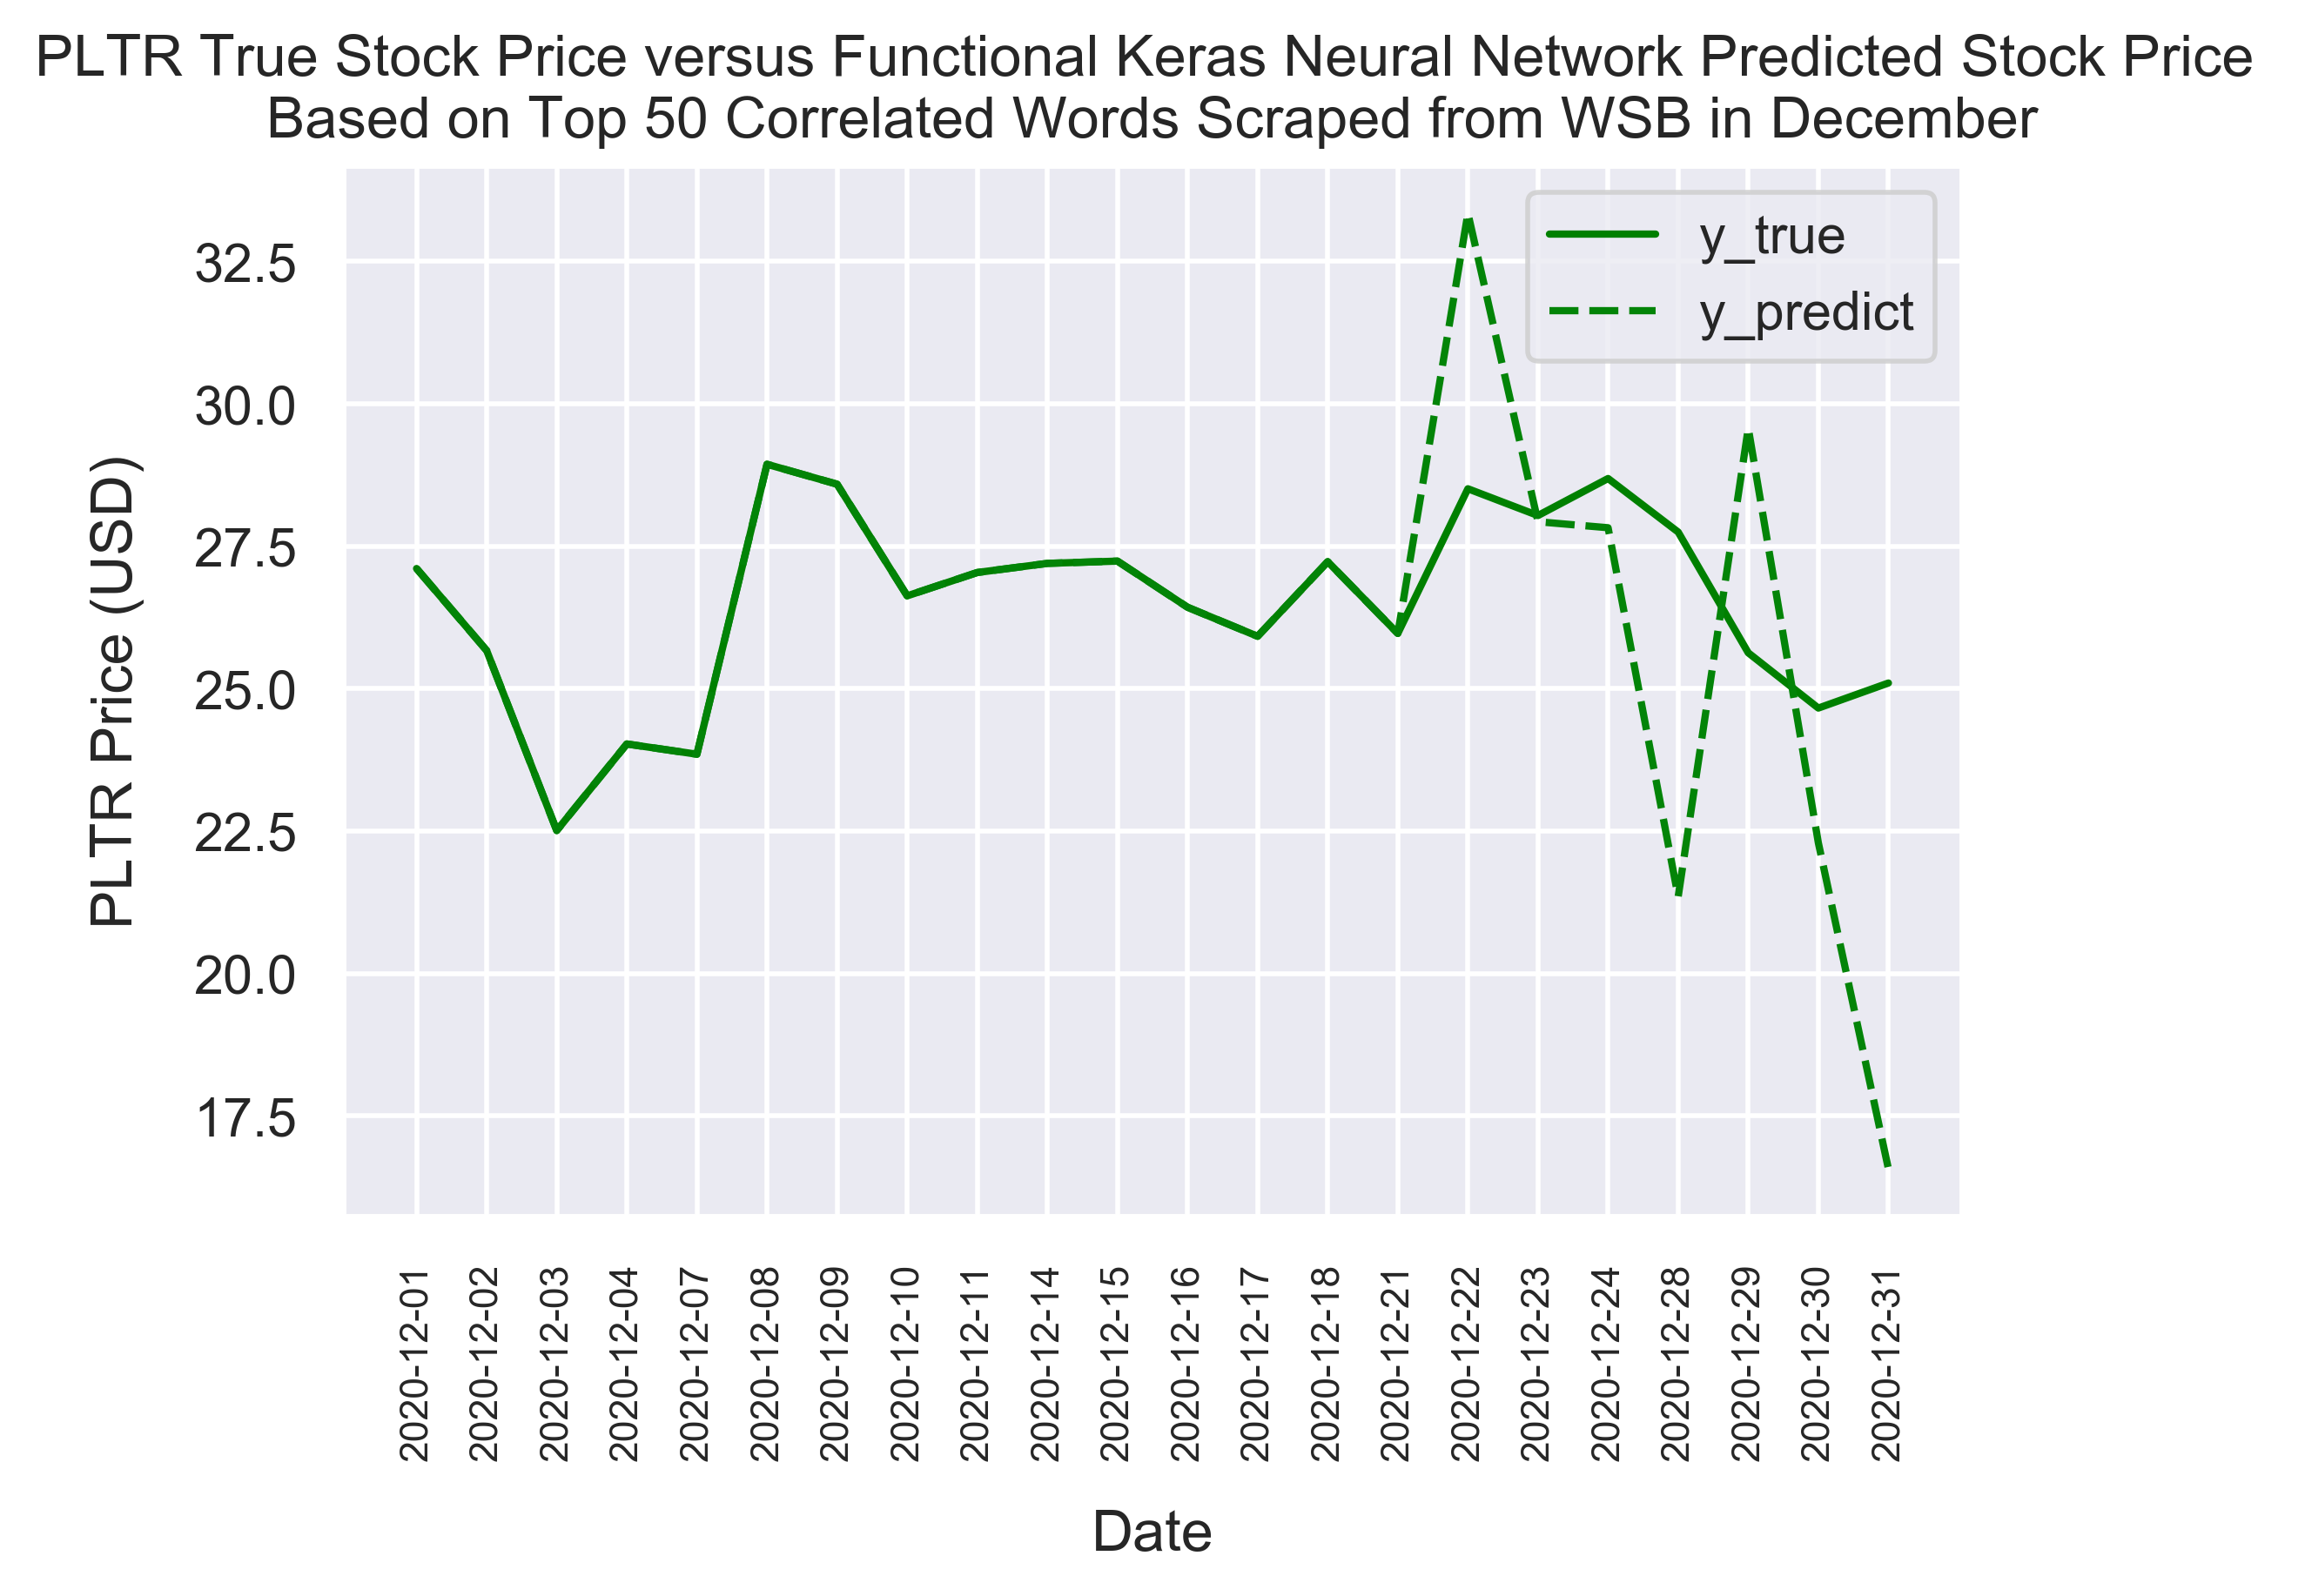

In [56]:
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, Dense, Activation


# split into input (X) and output (Y) variables
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

# create model
inputs = tf.keras.Input(shape=(50,))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(inputs)
x2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x)
x3 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x2)
x4 = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x3)
outputs = tf.keras.layers.Dense(50, activation=tf.nn.relu)(x4)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



# Compile model
import sklearn.metrics as metrics
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x=x_train,y=y_train, epochs=100)

pred = model.predict(x_test)
y_pred = [x[0] for x in pred]

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),y_pred)))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),y_pred)))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),y_pred)))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),y_pred)))

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(y_pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])


sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Functional Keras Neural Network Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB in December")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=8)
plt.show()





The Root Mean Squared Error is: 2.5636262047097205
The Mean Absolute Error is: 2.0035901069641113
The Explained Variance Score is: -0.6389532089233398
The R2 Score is: -1.600946273688939


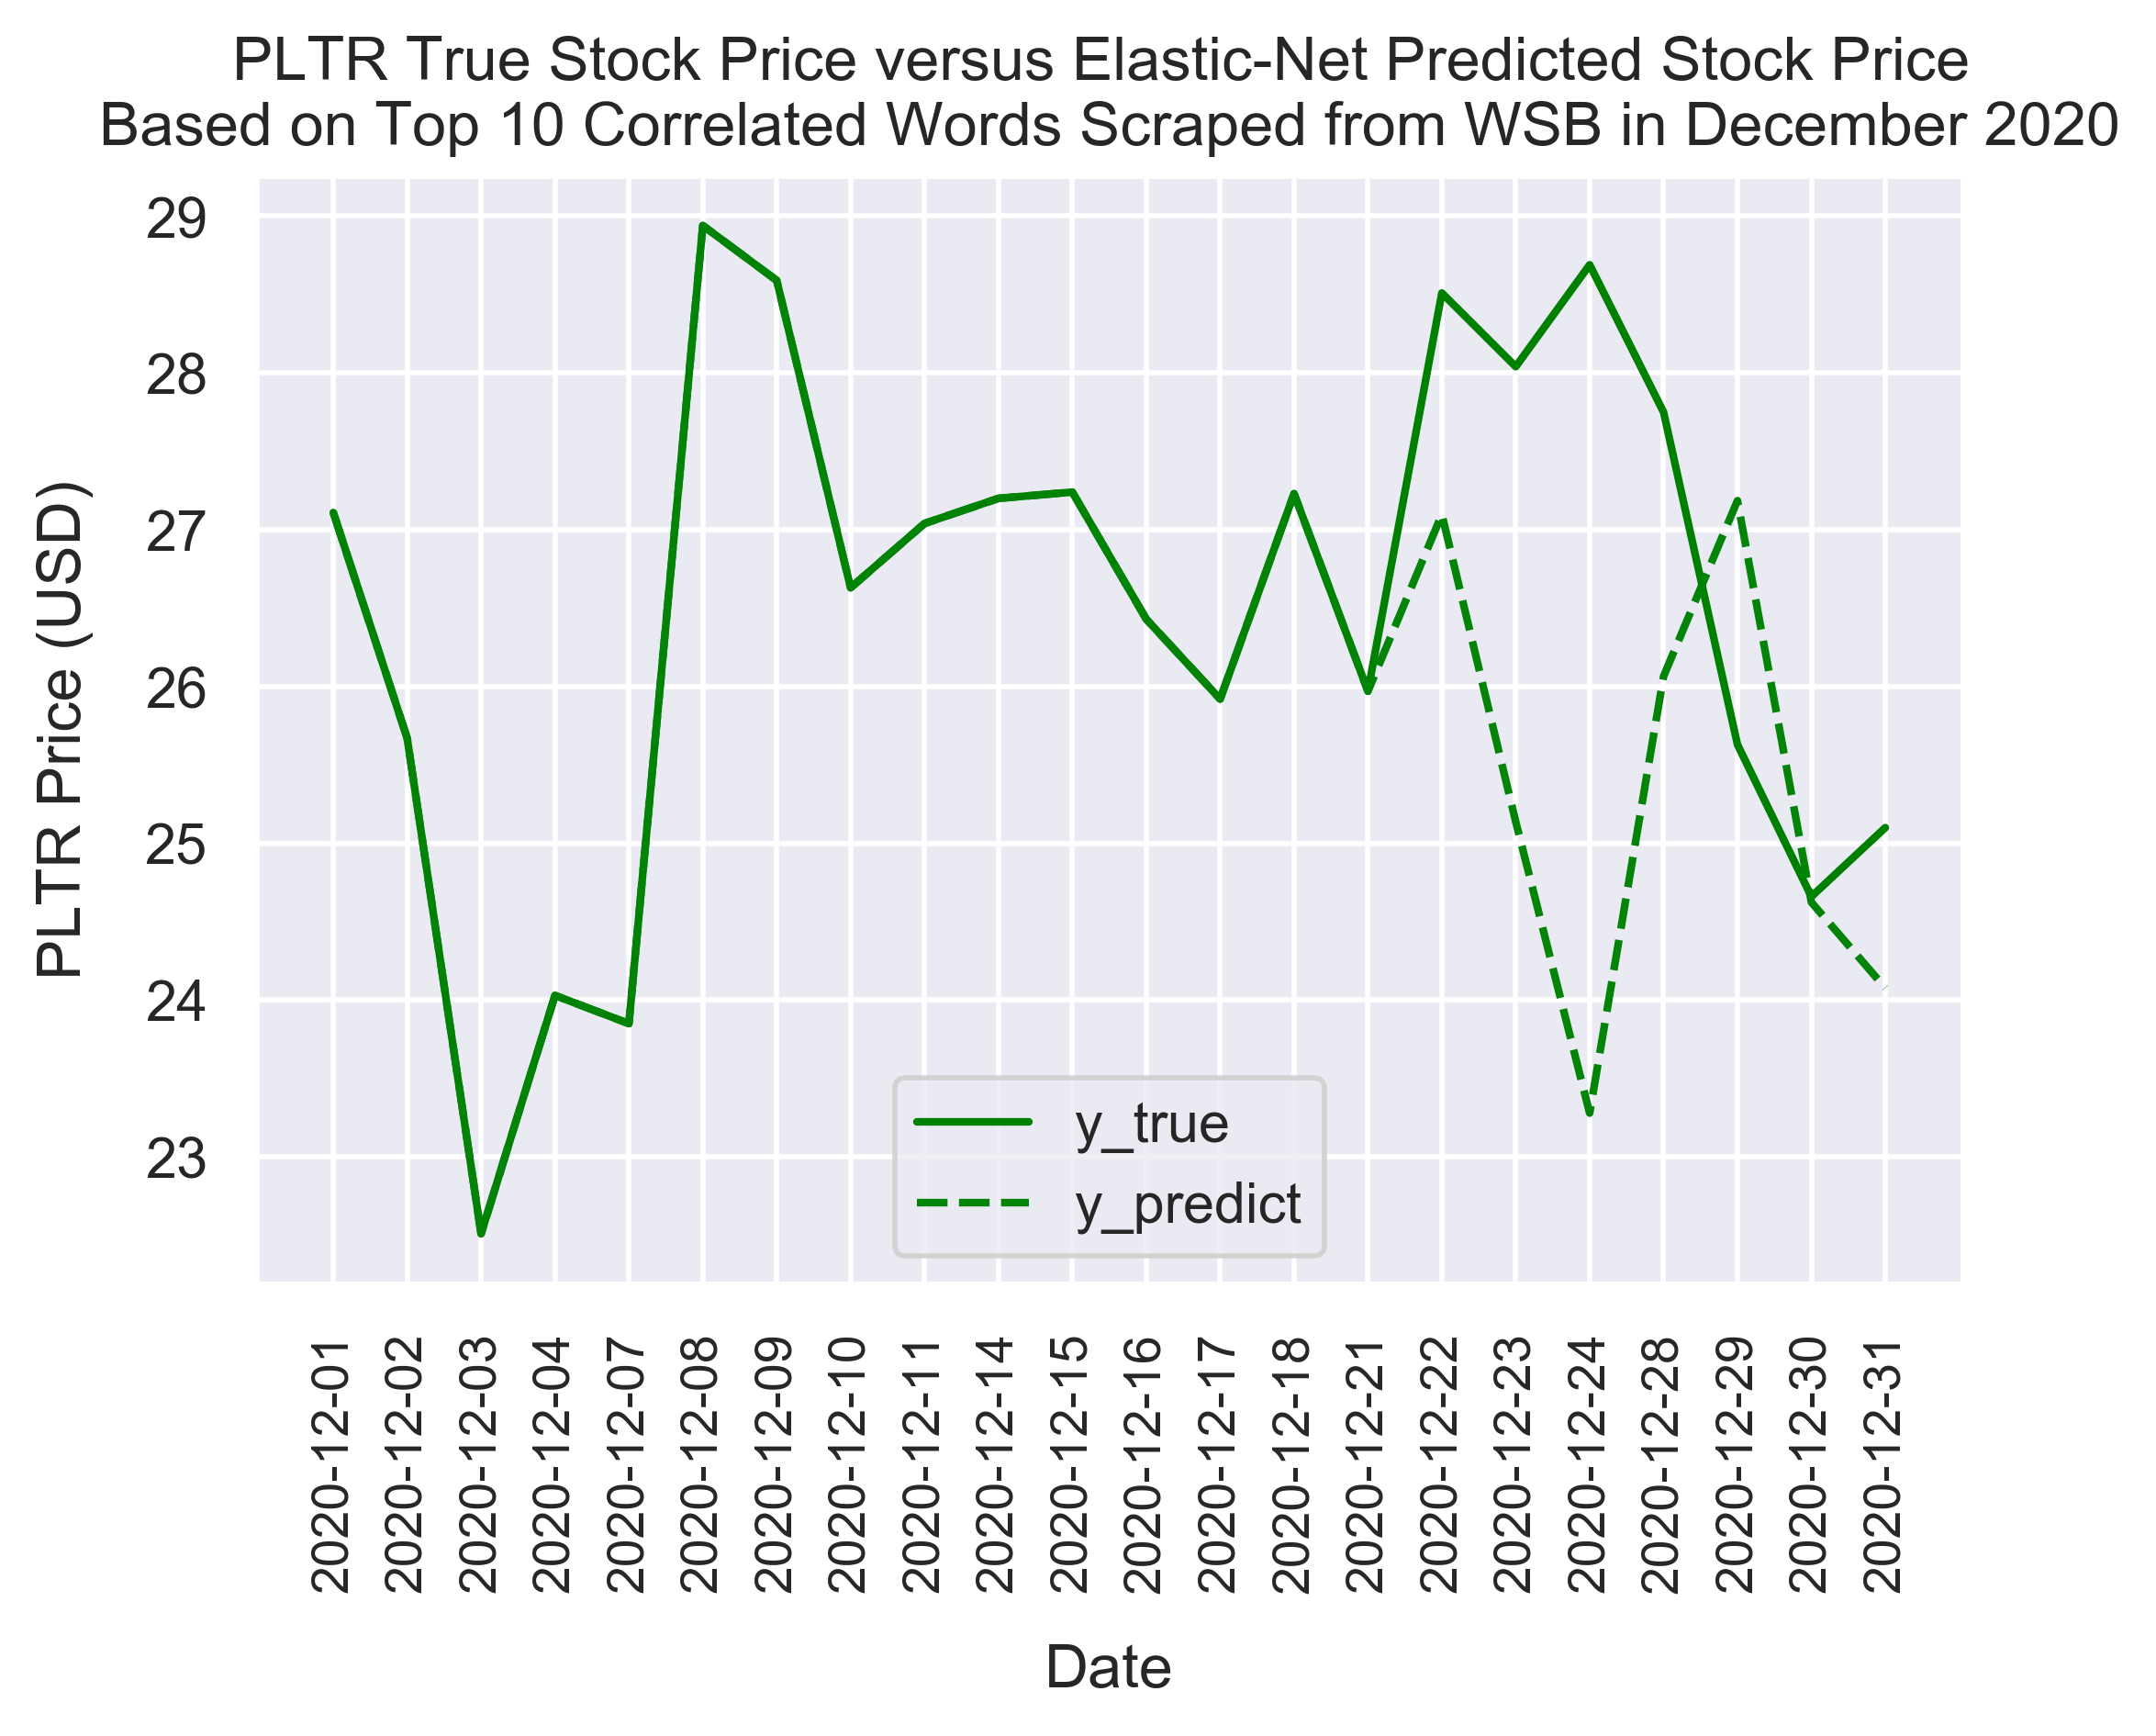

In [57]:
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first10pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 10 Correlated Words Scraped from WSB in December 2020")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=10)
plt.show()



The Root Mean Squared Error is: 1.2121146110694492
The Mean Absolute Error is: 1.0290584564208984
The Explained Variance Score is: 0.6600196361541748
The R2 Score is: 0.4185540863350463


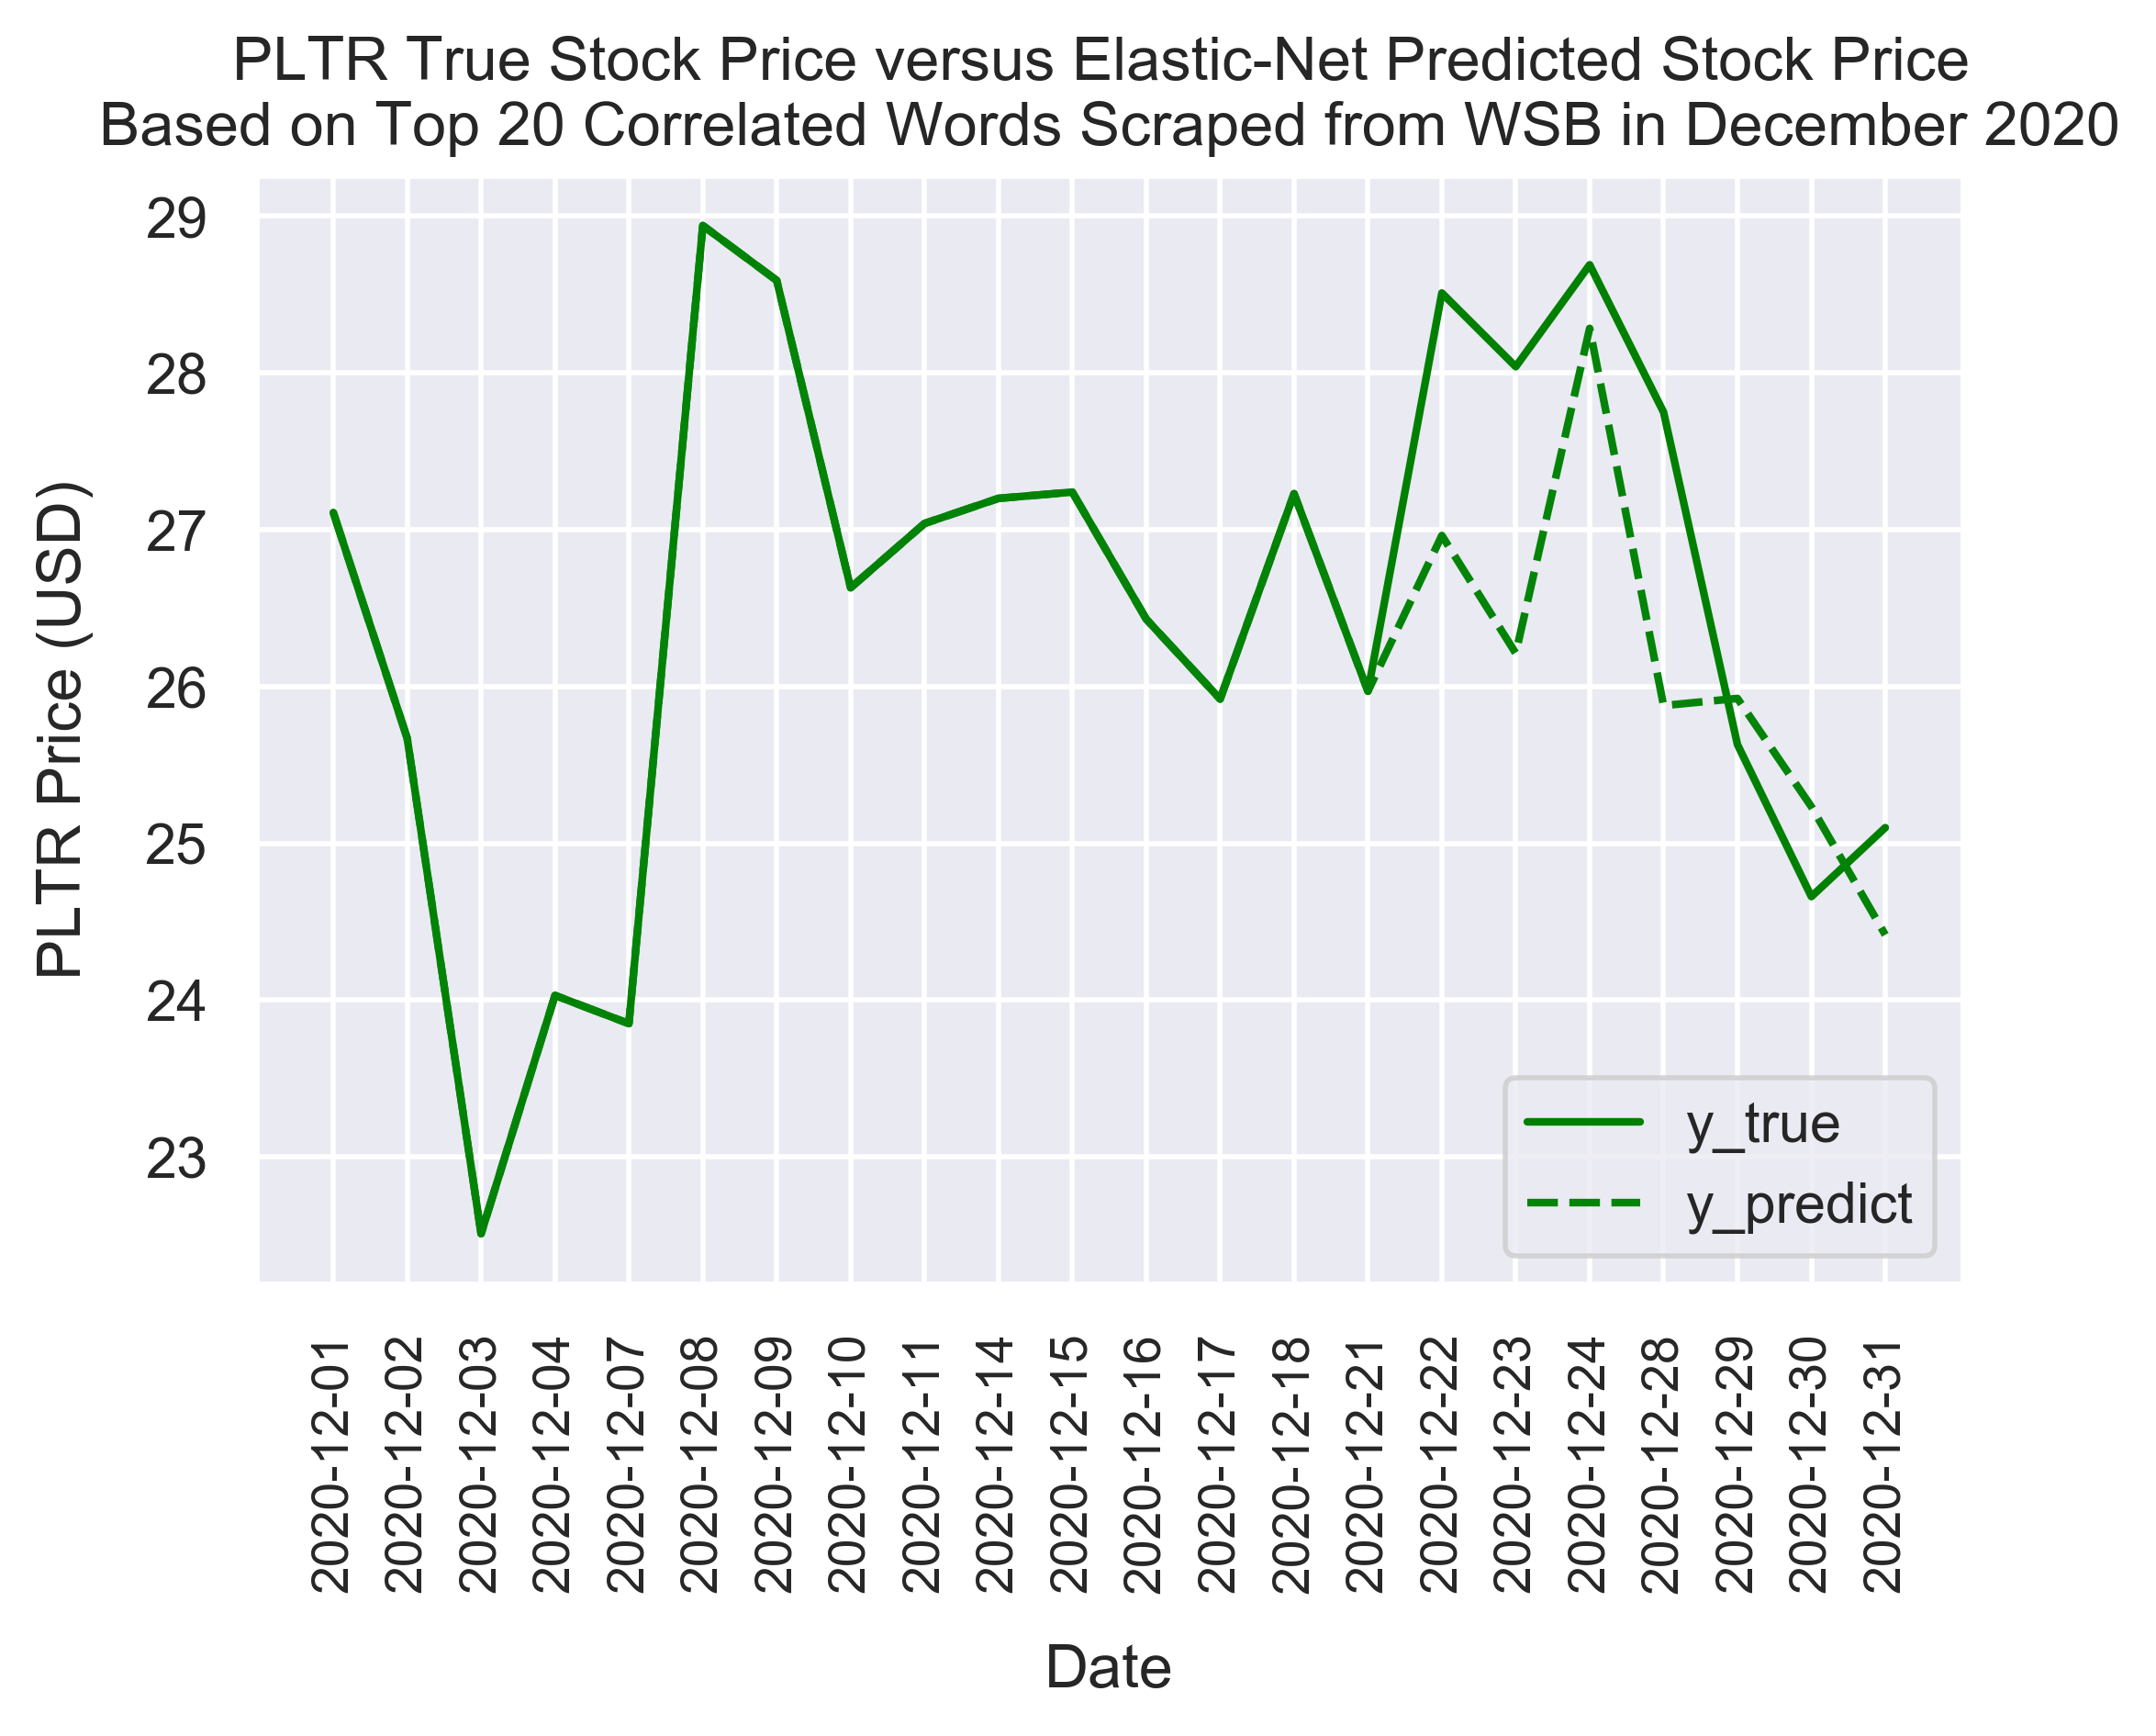

In [58]:
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first20pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 20 Correlated Words Scraped from WSB in December 2020")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=10)
plt.show()




The Root Mean Squared Error is: 2.0802164667537526
The Mean Absolute Error is: 1.7883559465408325
The Explained Variance Score is: 0.05372971296310425
The R2 Score is: -0.7125332050333923


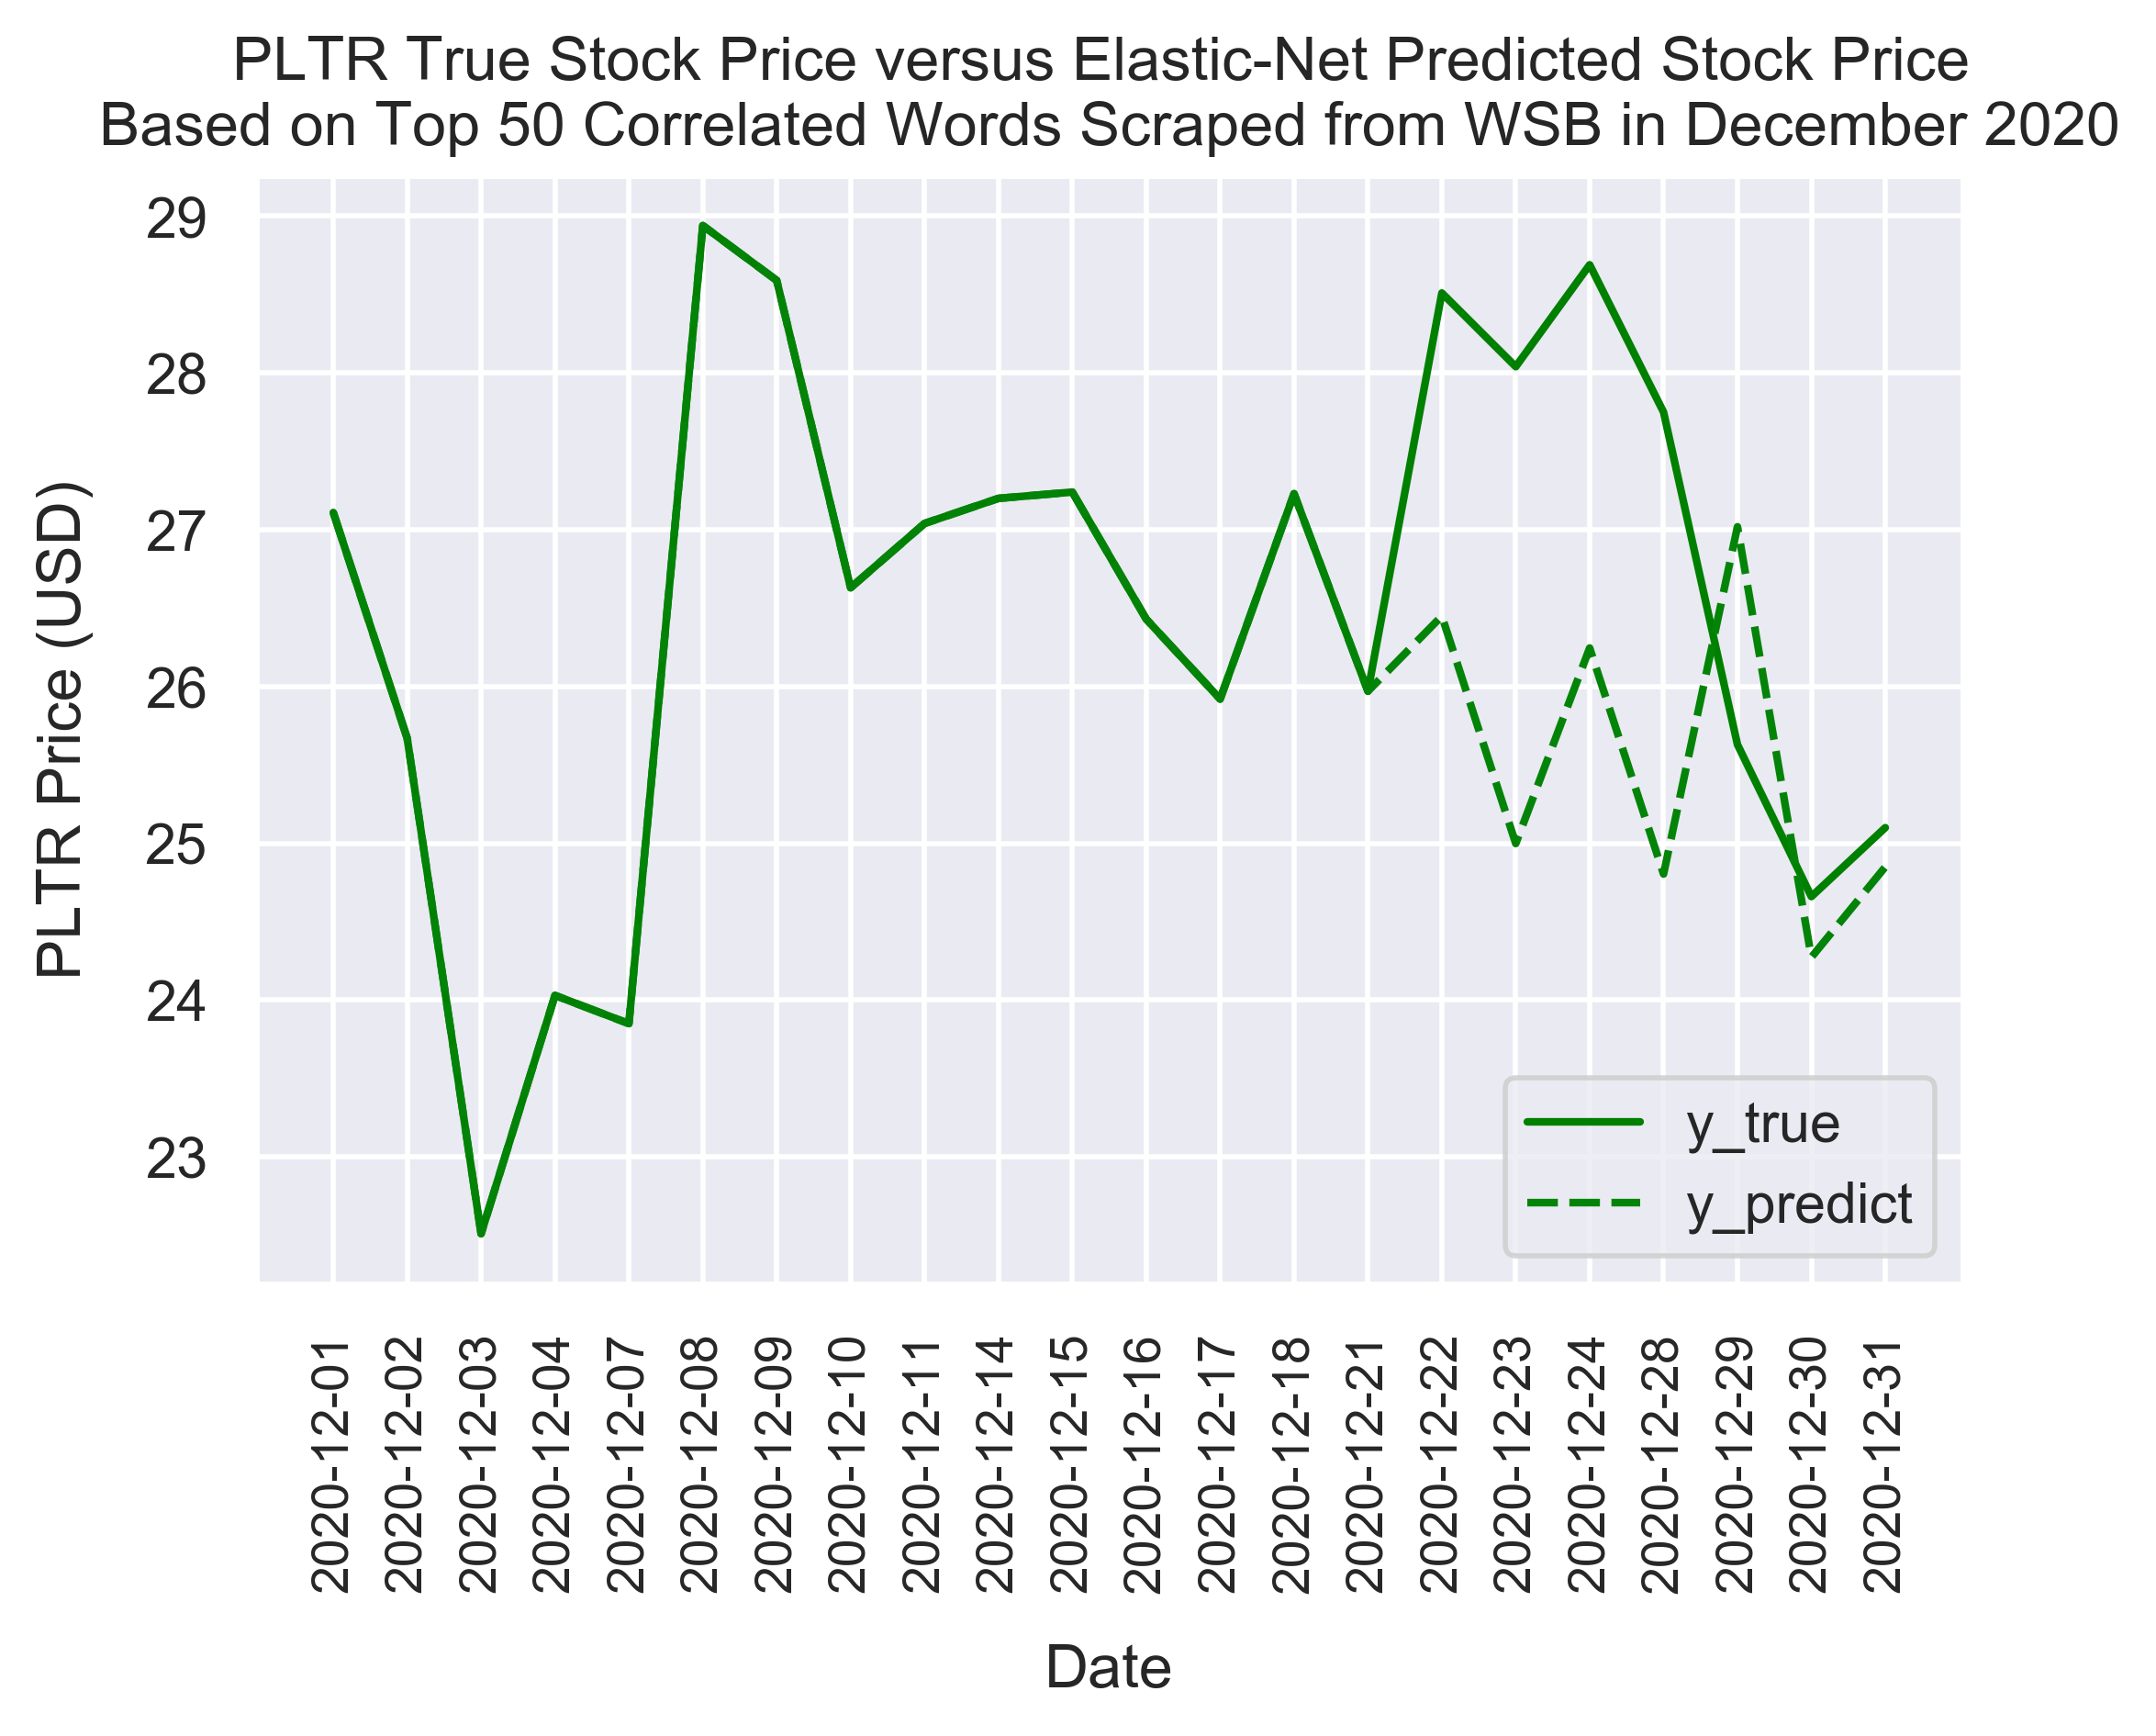

In [59]:
y = dec["Adjusted_Closing_Stock_Price"]
x = dec[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(dec.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB in December 2020")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=10)
plt.show()





The Root Mean Squared Error is: 5.7404500188101135
The Mean Absolute Error is: 4.232826232910156
The Explained Variance Score is: -0.37765681743621826
The R2 Score is: -0.38157148106797845


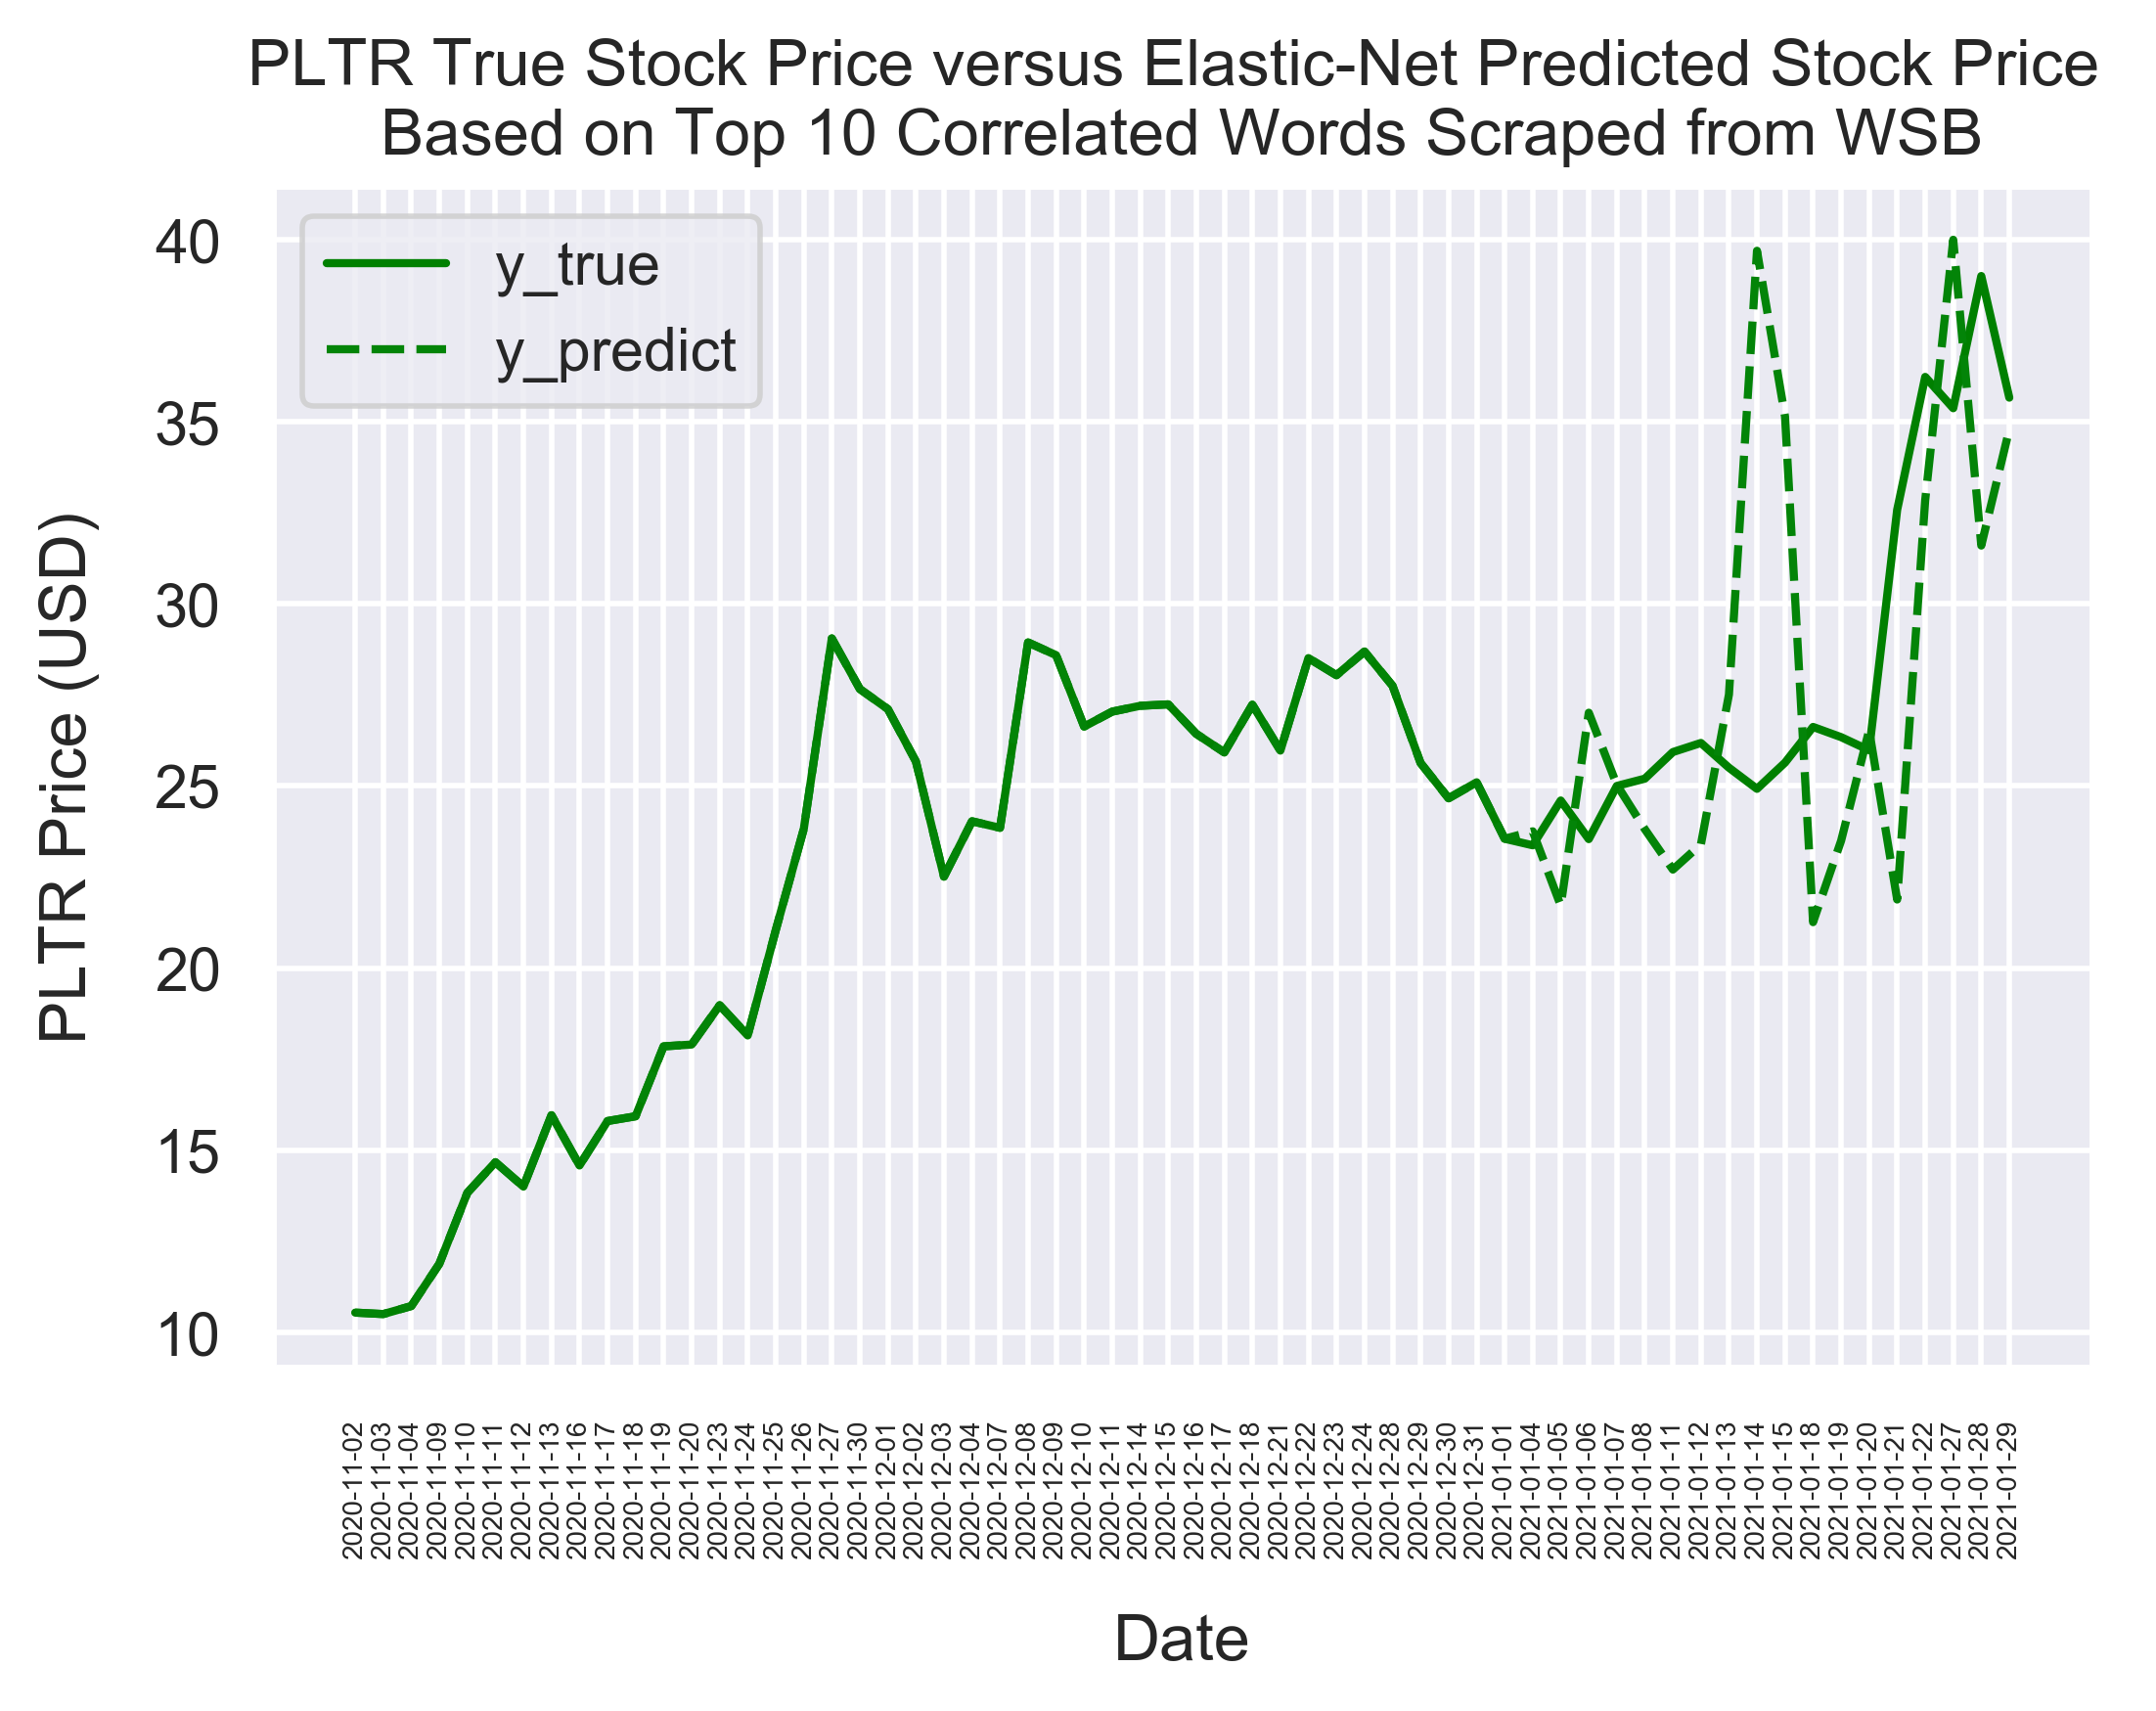

In [60]:
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first10pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 10 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()




The Root Mean Squared Error is: 11.356476509719919
The Mean Absolute Error is: 7.806552410125732
The Explained Variance Score is: -2.5140368938446045
The R2 Score is: -4.407153659453441


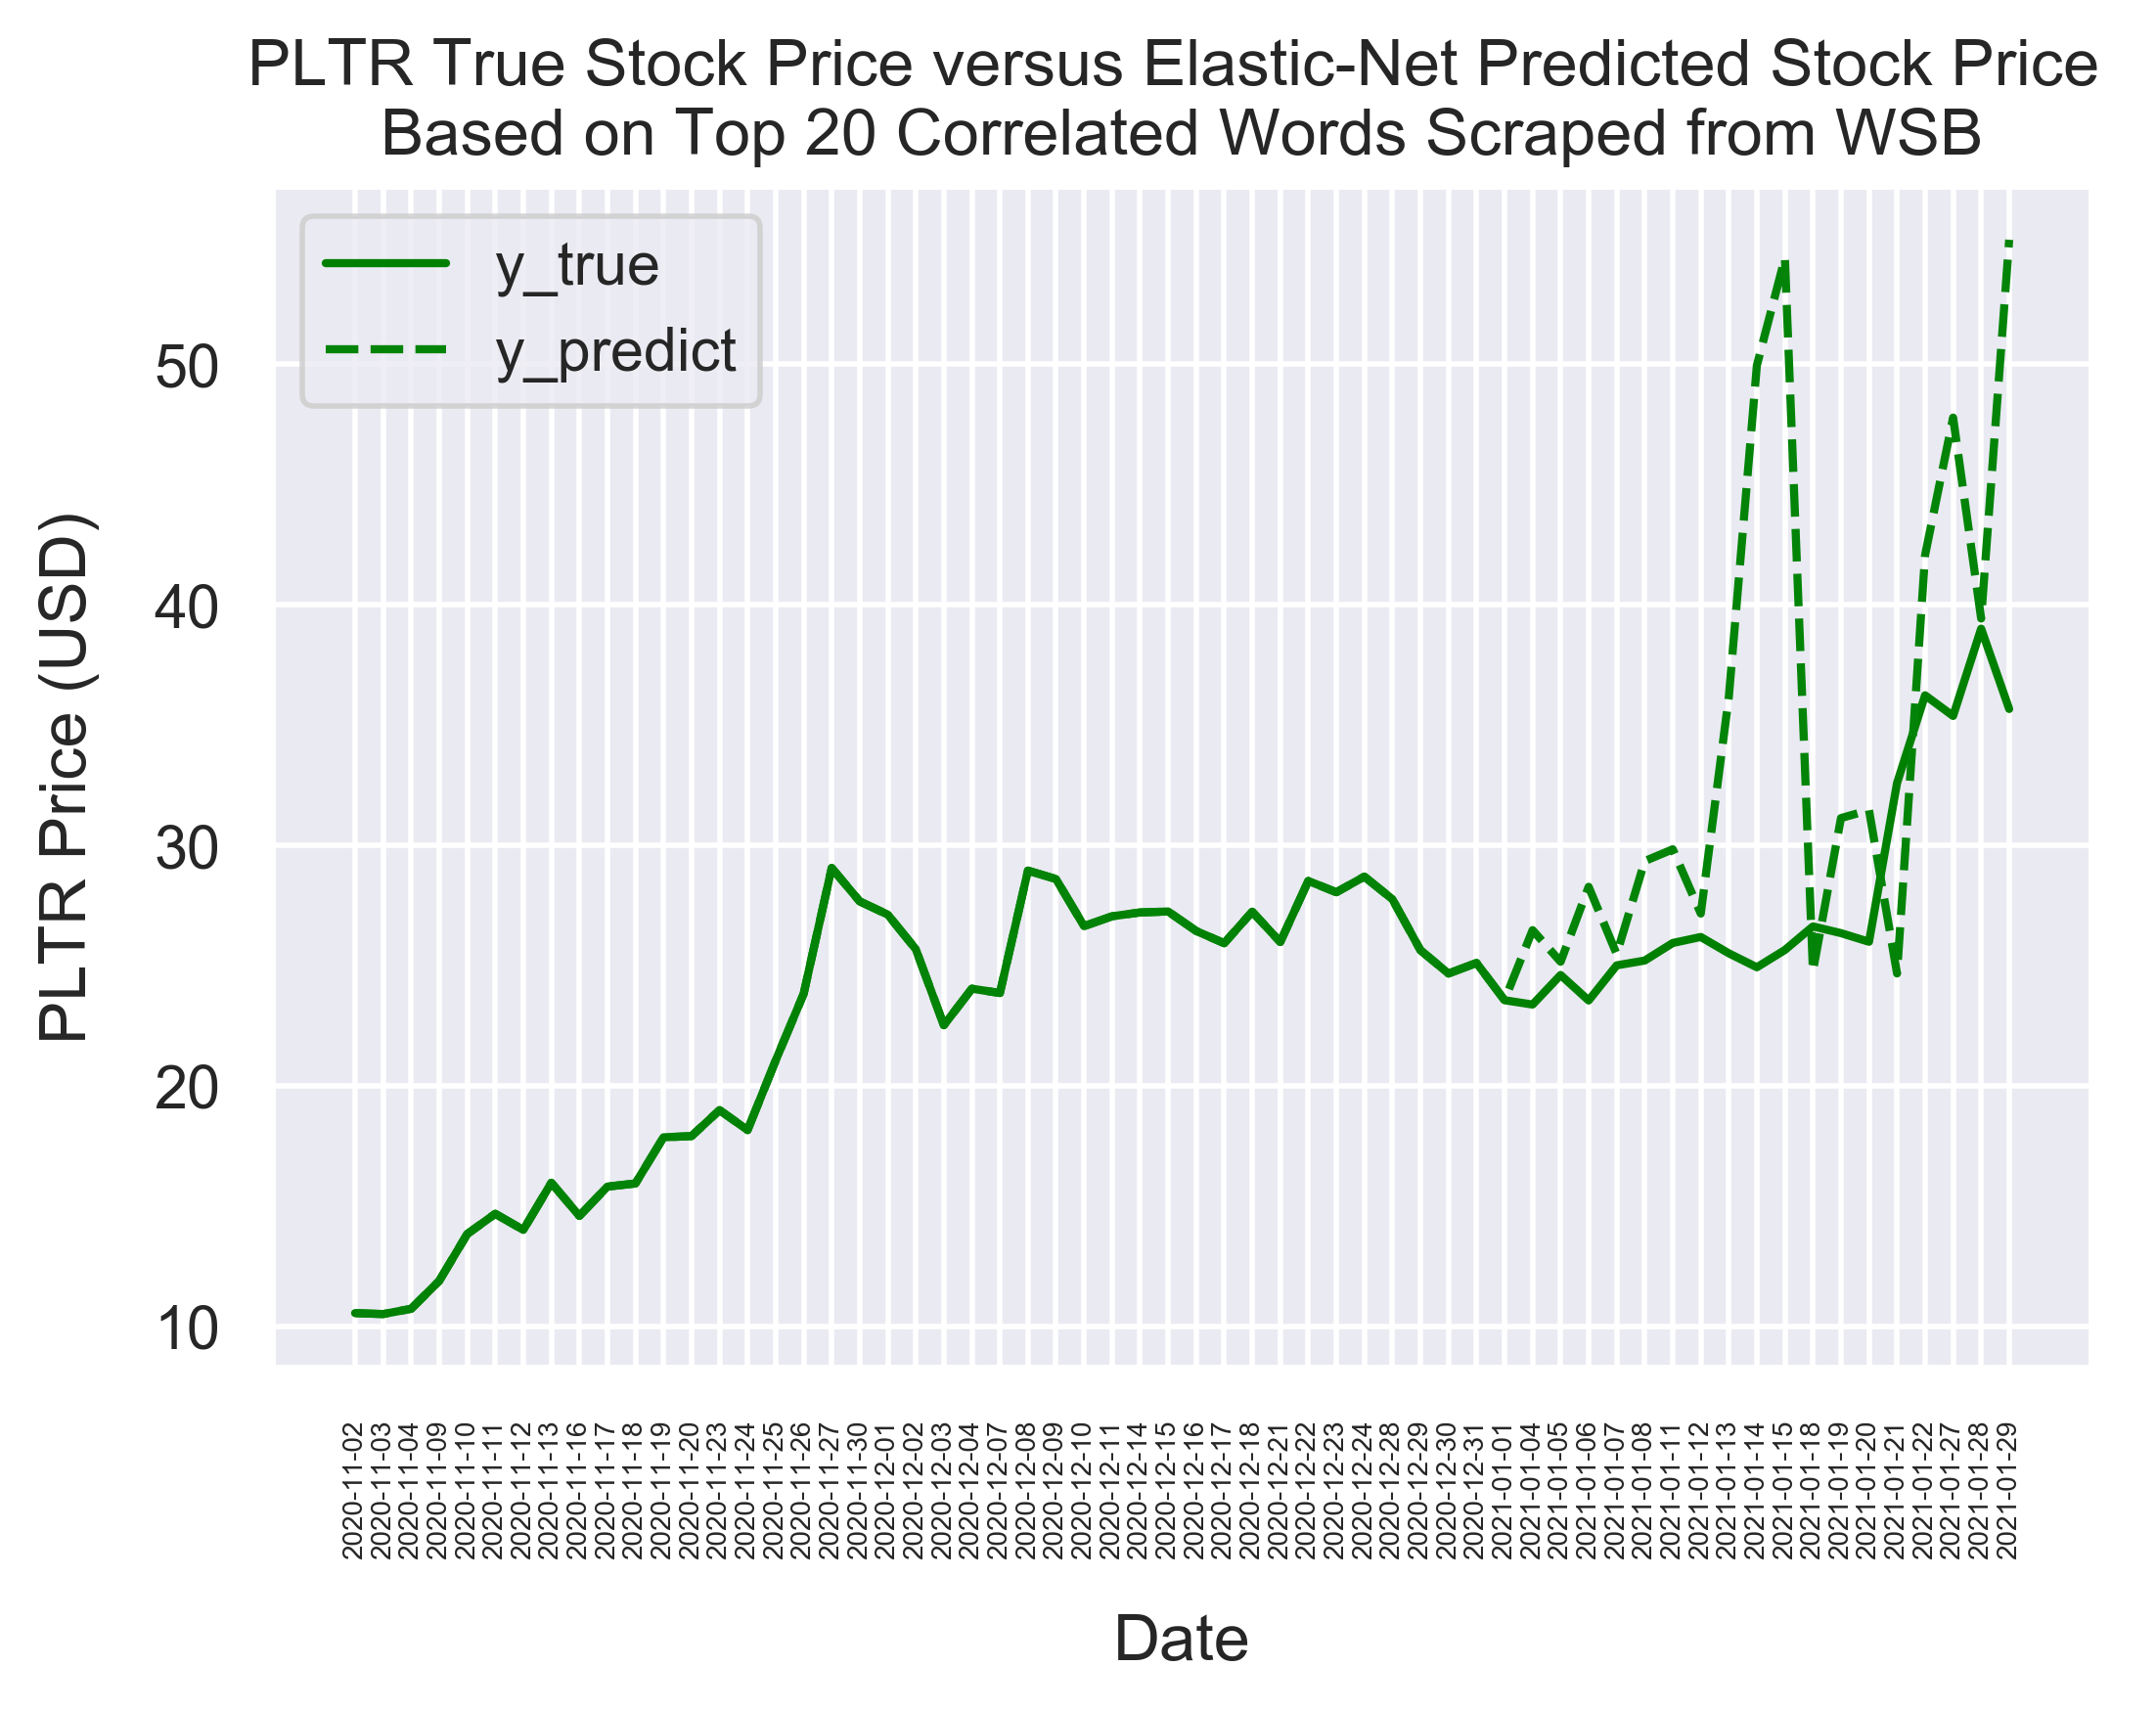

In [61]:
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first20pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 20 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()





The Root Mean Squared Error is: 8.960255072232746
The Mean Absolute Error is: 7.812074661254883
The Explained Variance Score is: -1.44508695602417
The R2 Score is: -2.366063142437322


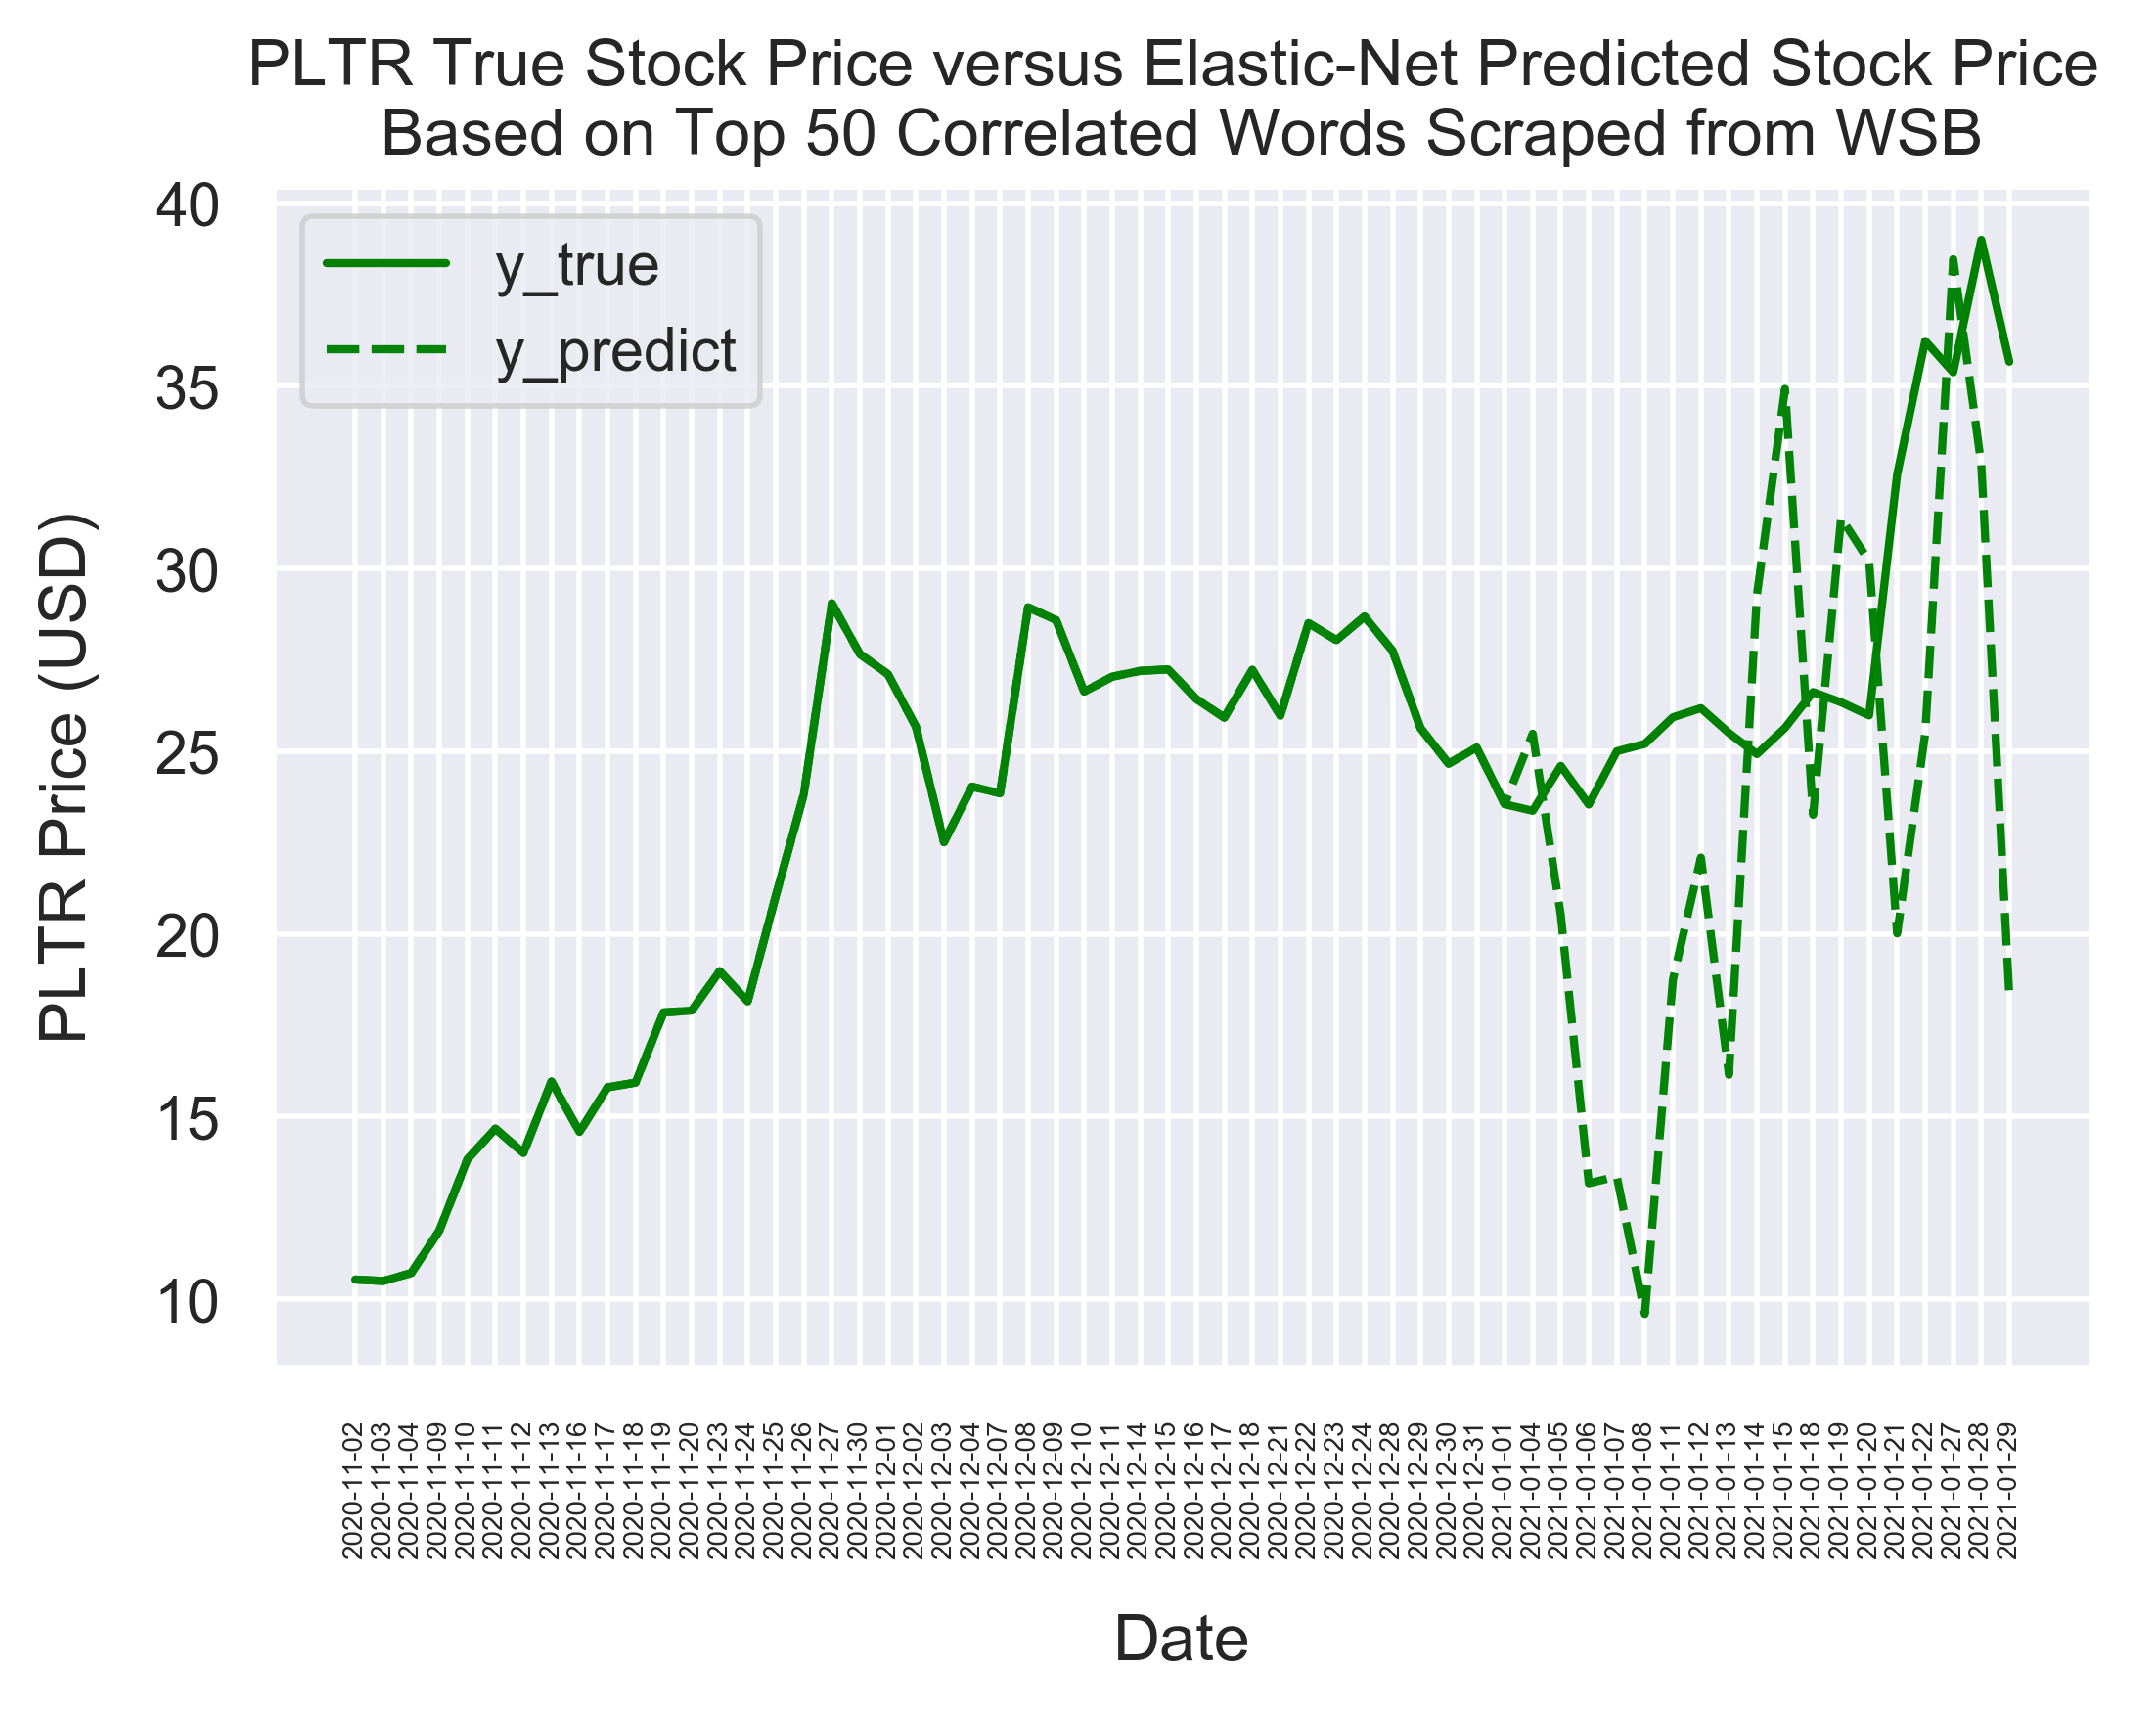

In [62]:
y = df2["Adjusted_Closing_Stock_Price"]
x = df2[first50pairs.keys()]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))




sns.lineplot(data=data)
plt.title("PLTR True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Top 50 Correlated Words Scraped from WSB")
plt.ylabel("PLTR Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()






## Sentiment Analysis

In [63]:
from textblob import TextBlob

In [64]:
df2.columns

Index(['like', 'puts', 'calls', 'spy', 'nio', 'get', 'buy', 'going', 'market',
       'go',
       ...
       'conference', 'penis', 'caused', 'roth', 'graph', 'cunt', 'stable',
       'pretend', 'Adjusted_Closing_Stock_Price', 'Trade_Volume'],
      dtype='object', length=1995)

In [65]:
high = []
low = []
for word in list(df2.columns):
    sent = TextBlob(word)
    if sent.sentiment.polarity > 0.4:
        high.append(word)
    elif sent.sentiment.polarity < -0.4:
        low.append(word)

In [66]:
highlows = high+low

In [67]:
import yfinance as yf

In [68]:
spy = yf.download("SPY",start="2020-11-02",end="2021-01-29")

[*********************100%***********************]  1 of 1 completed


In [69]:
spy

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-11-02  330.200012  332.359985  327.239990  330.200012  327.725098   
2020-11-03  333.690002  338.250000  330.290009  336.029999  333.511383   
2020-11-04  340.859985  347.940002  339.589996  343.540009  340.965088   
2020-11-05  349.239990  352.190002  348.859985  350.239990  347.614868   
2020-11-06  349.929993  351.510010  347.649994  350.160004  347.535461   
2020-11-09  363.970001  364.380005  354.059998  354.559998  351.902496   
2020-11-10  353.489990  355.179993  350.510010  354.040009  351.386383   
2020-11-11  356.399994  357.559998  355.059998  356.670013  353.996674   
2020-11-12  355.579987  356.720001  351.260010  353.209991  350.562592   
2020-11-13  355.269989  358.899994  354.709991  358.100006  355.415955   
2020-11-16  360.980011  362.779999  359.589996  362.570007  359.852478   
2020-11-17  359.970001  361.920013  358.339996  360.619995  357.917053   
2020-11-18  360.910004  361.500000  356.239990  356.279999  353.609589   
2020-11-19  355.600006  358.179993  354.149994  357.779999  355.098358   
2020-11-20  357.500000  357.720001  355.250000  355.329987  352.666718   
2020-11-23  357.279999  358.820007  354.869995  357.459991  354.780731   
2020-11-24  360.209991  363.809998  359.290009  363.220001  360.497559   
2020-11-25  363.130005  363.160004  361.480011  362.660004  359.941772   
2020-11-27  363.839996  364.179993  362.579987  363.670013  360.944214   
2020-11-30  362.829987  363.119995  359.170013  362.059998  359.346283   
2020-12-01  365.570007  367.679993  364.929993  366.019989  363.276581   
2020-12-02  364.820007  366.959991  364.200012  366.790009  364.040833   
2020-12-03  366.679993  368.190002  365.500000  366.690002  363.941589   
2020-12-04  367.320007  369.850006  367.220001  369.850006  367.077881   
2020-12-07  369.019989  369.619995  367.720001  369.089996  366.323578   
2020-12-08  367.720001  370.779999  367.670013  370.170013  367.395508   
2020-12-09  370.880005  371.049988  365.950012  366.850006  364.100372   
2020-12-10  365.369995  367.859985  364.429993  366.730011  363.981262   
2020-12-11  364.899994  366.739990  363.260010  366.299988  363.554474   
2020-12-14  368.640015  369.799988  364.470001  364.660004  361.926788   
2020-12-15  367.399994  369.589996  365.920013  369.589996  366.819824   
2020-12-16  369.820007  371.160004  368.869995  370.170013  367.395508   
2020-12-17  371.940002  372.459991  371.049988  372.239990  369.449982   
2020-12-18  370.970001  371.149994  367.019989  369.179993  367.974792   
2020-12-21  364.970001  378.459991  362.029999  367.859985  366.659088   
2020-12-22  368.209991  368.329987  366.029999  367.239990  366.041107   
2020-12-23  368.279999  369.619995  367.220001  367.570007  366.370056   
2020-12-24  368.079987  369.029999  367.450012  369.000000  367.795380   
2020-12-28  371.739990  372.589996  371.070007  372.170013  370.955048   
2020-12-29  373.809998  374.000000  370.829987  371.459991  370.247345   
2020-12-30  372.339996  373.100006  371.570007  371.989990  370.775604   
2020-12-31  371.779999  374.660004  371.230011  373.880005  372.659454   
2021-01-04  375.309998  375.450012  364.820007  368.790009  367.586090   
2021-01-05  368.100006  372.500000  368.049988  371.329987  370.117767   
2021-01-06  369.709991  376.980011  369.119995  373.549988  372.330505   
2021-01-07  376.100006  379.899994  375.910004  379.100006  377.862427   
2021-01-08  380.589996  381.489990  377.100006  381.260010  380.015381   
2021-01-11  377.850006  380.579987  377.720001  378.690002  377.453766   
2021-01-12  378.890015  379.859985  376.359985  378.769989  377.533478   
2021-01-13  378.690002  380.859985  377.850006  379.790009  378.550171   
2021-01-14  380.589996  381.130005  378.100006  378.459991  377.224487   
2021-01-15  376.720001  377.579987  373.700012  375.700012  374.473511   
2021-01-19  378.339996

The Root Mean Squared Error is: 12.329745690166513
The Mean Absolute Error is: 8.481334686279297
The Explained Variance Score is: -6.767370700836182
The R2 Score is: -6.8953872088631964


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.754087448120117, tolerance: 0.402009516954422
  positive)


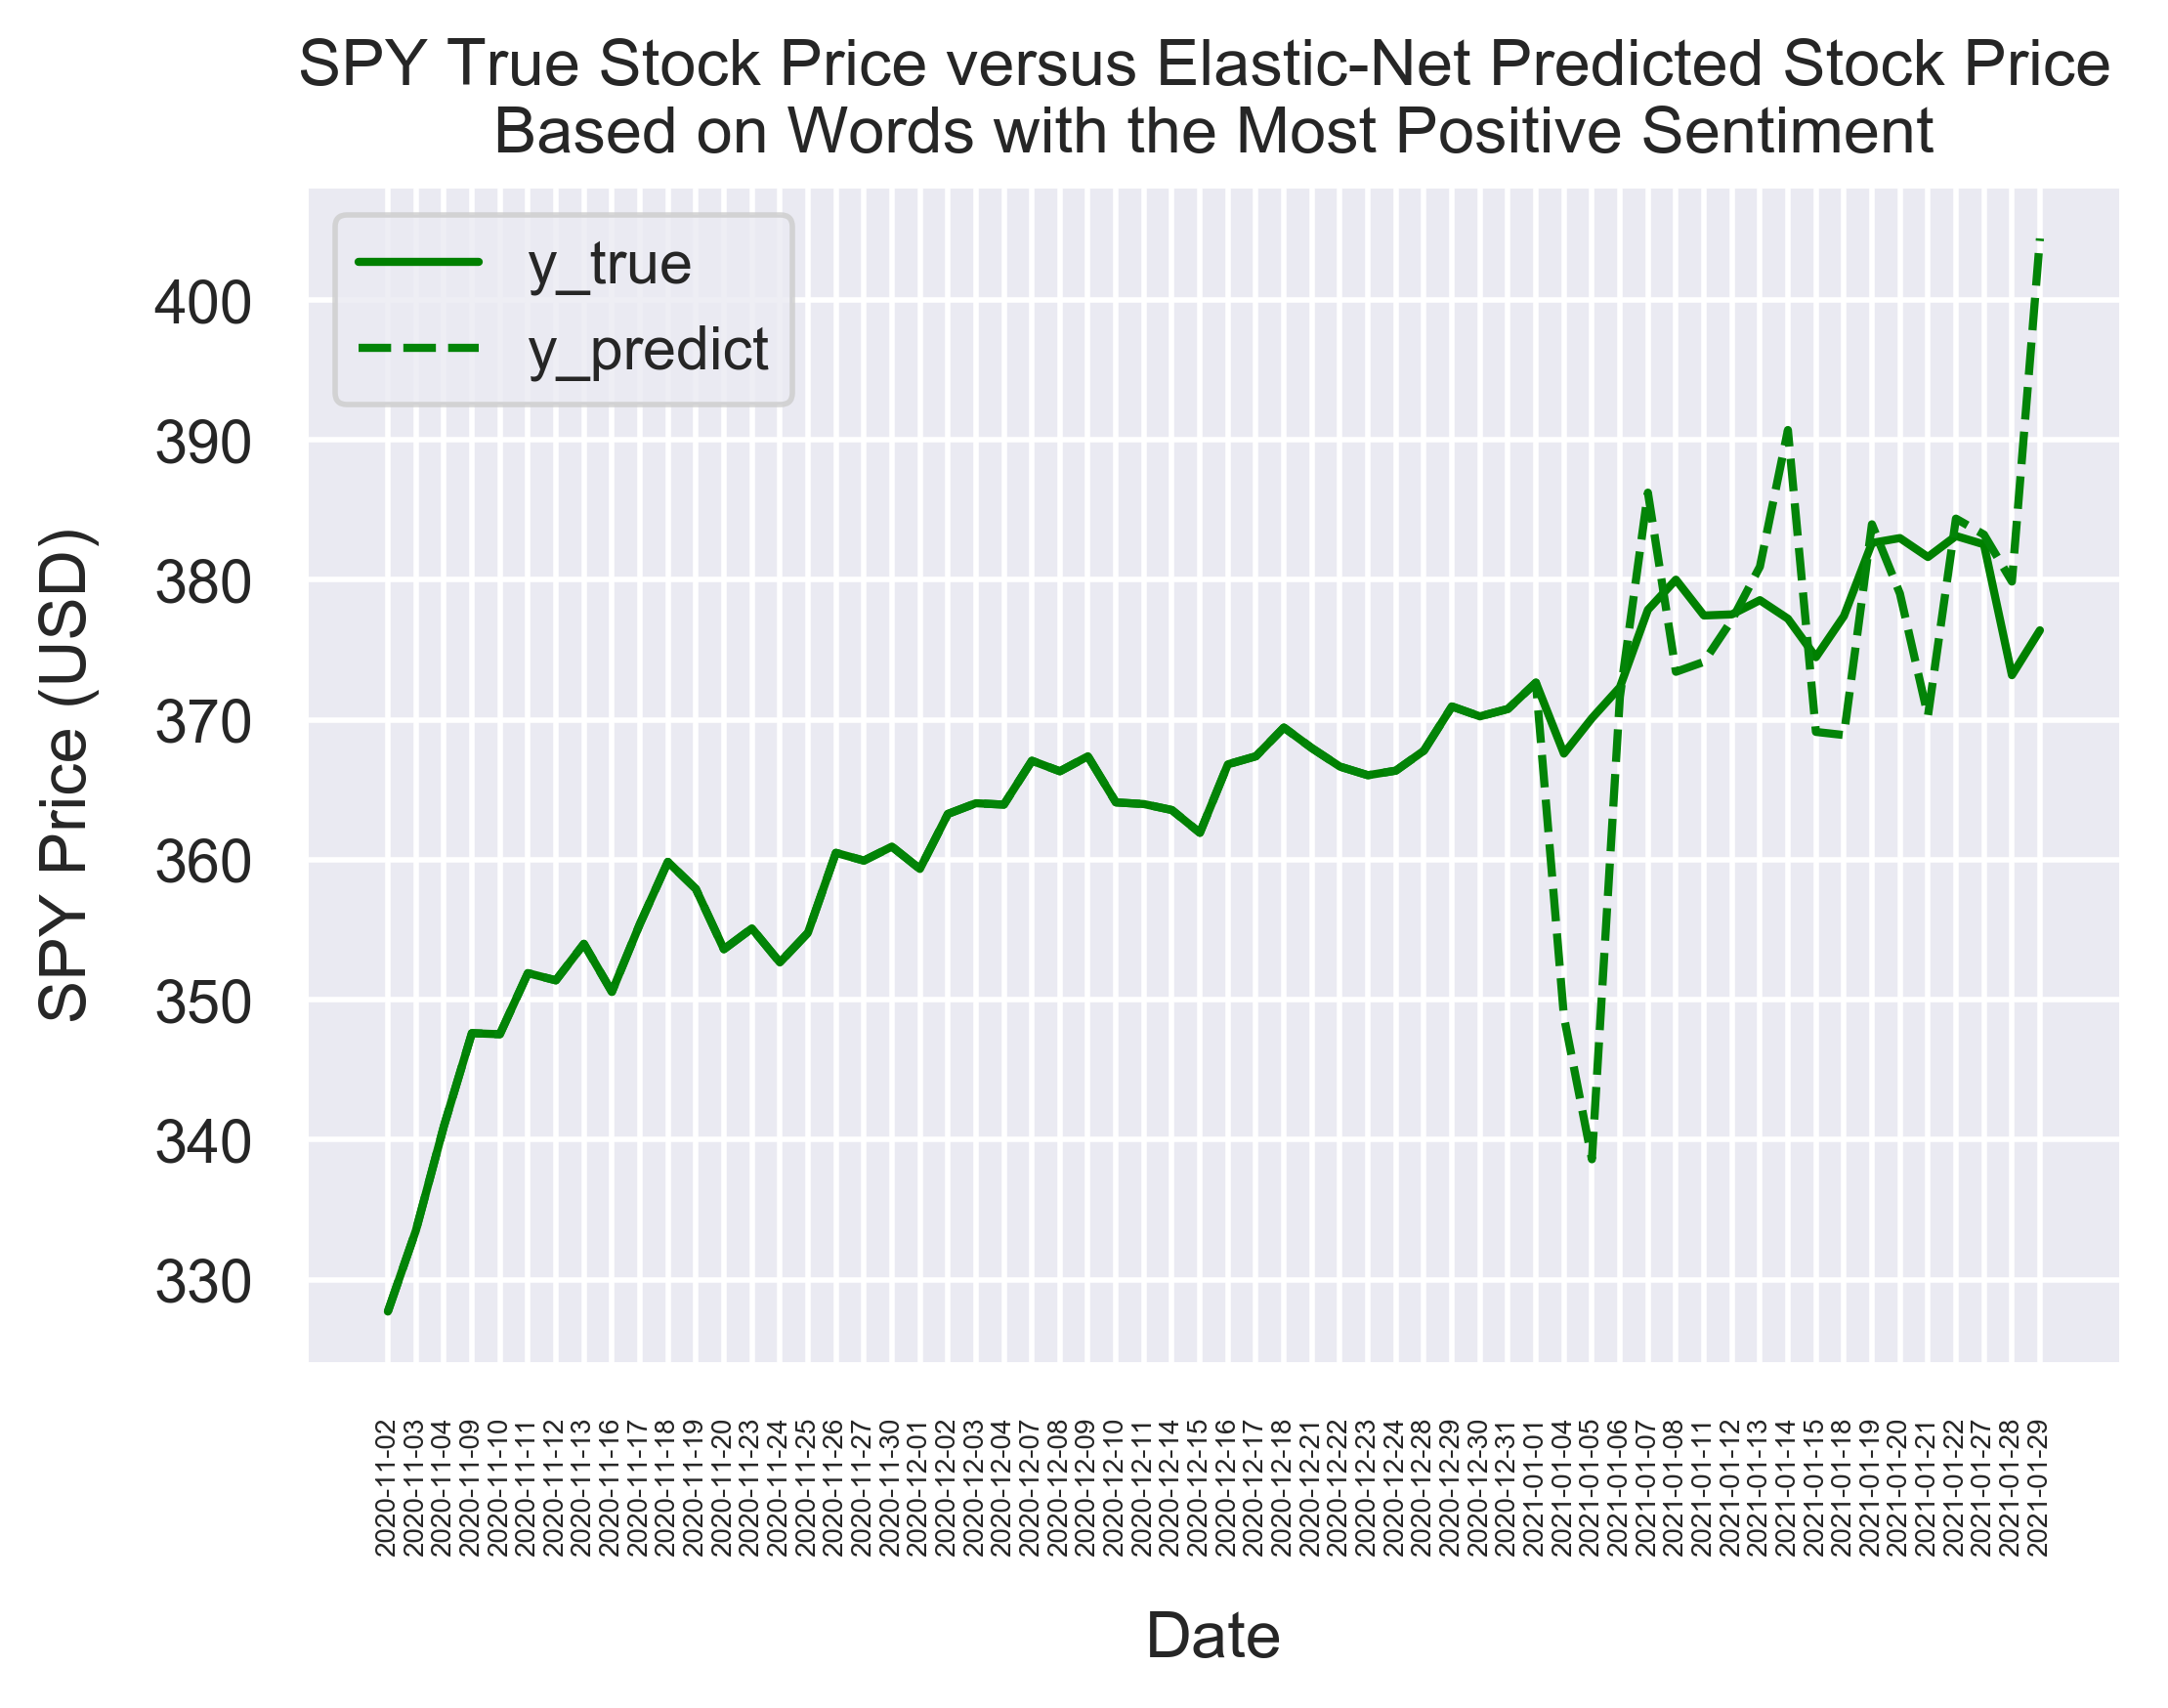

In [70]:
y = spy["Adj Close"]
x = df2[high]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))


sns.lineplot(data=data)
plt.title("SPY True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Words with the Most Positive Sentiment")
plt.ylabel("SPY Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()




In [85]:
most_positive = pd.DataFrame()
most_positive["true"] = data["y_true"][-18:]
most_positive["predict"] = list(pred)

In [86]:
most_positive

true     predict
2021-01-04  367.586090  345.620819
2021-01-05  370.117767  352.609833
2021-01-06  372.330505  368.669922
2021-01-07  377.862427  375.705170
2021-01-08  380.015381  355.099609
2021-01-11  377.453766  358.298859
2021-01-12  377.533478  360.599945
2021-01-13  378.550171  372.592590
2021-01-14  377.224487  399.174164
2021-01-15  374.473511  373.033630
2021-01-18  377.413879  366.757996
2021-01-19  382.636780  389.206085
2021-01-20  382.985626  375.429321
2021-01-21  381.630066  363.954712
2021-01-22  383.135162  407.109802
2021-01-27  382.537109  436.769867
2021-01-28  373.187714  398.811157
2021-01-29  376.397217  395.361237

In [87]:
most_positive.to_csv("mostpositive.csv")

The Root Mean Squared Error is: 16.429392160326945
The Mean Absolute Error is: 14.625612258911133
The Explained Variance Score is: -1.909245491027832
The R2 Score is: -13.01871516169218


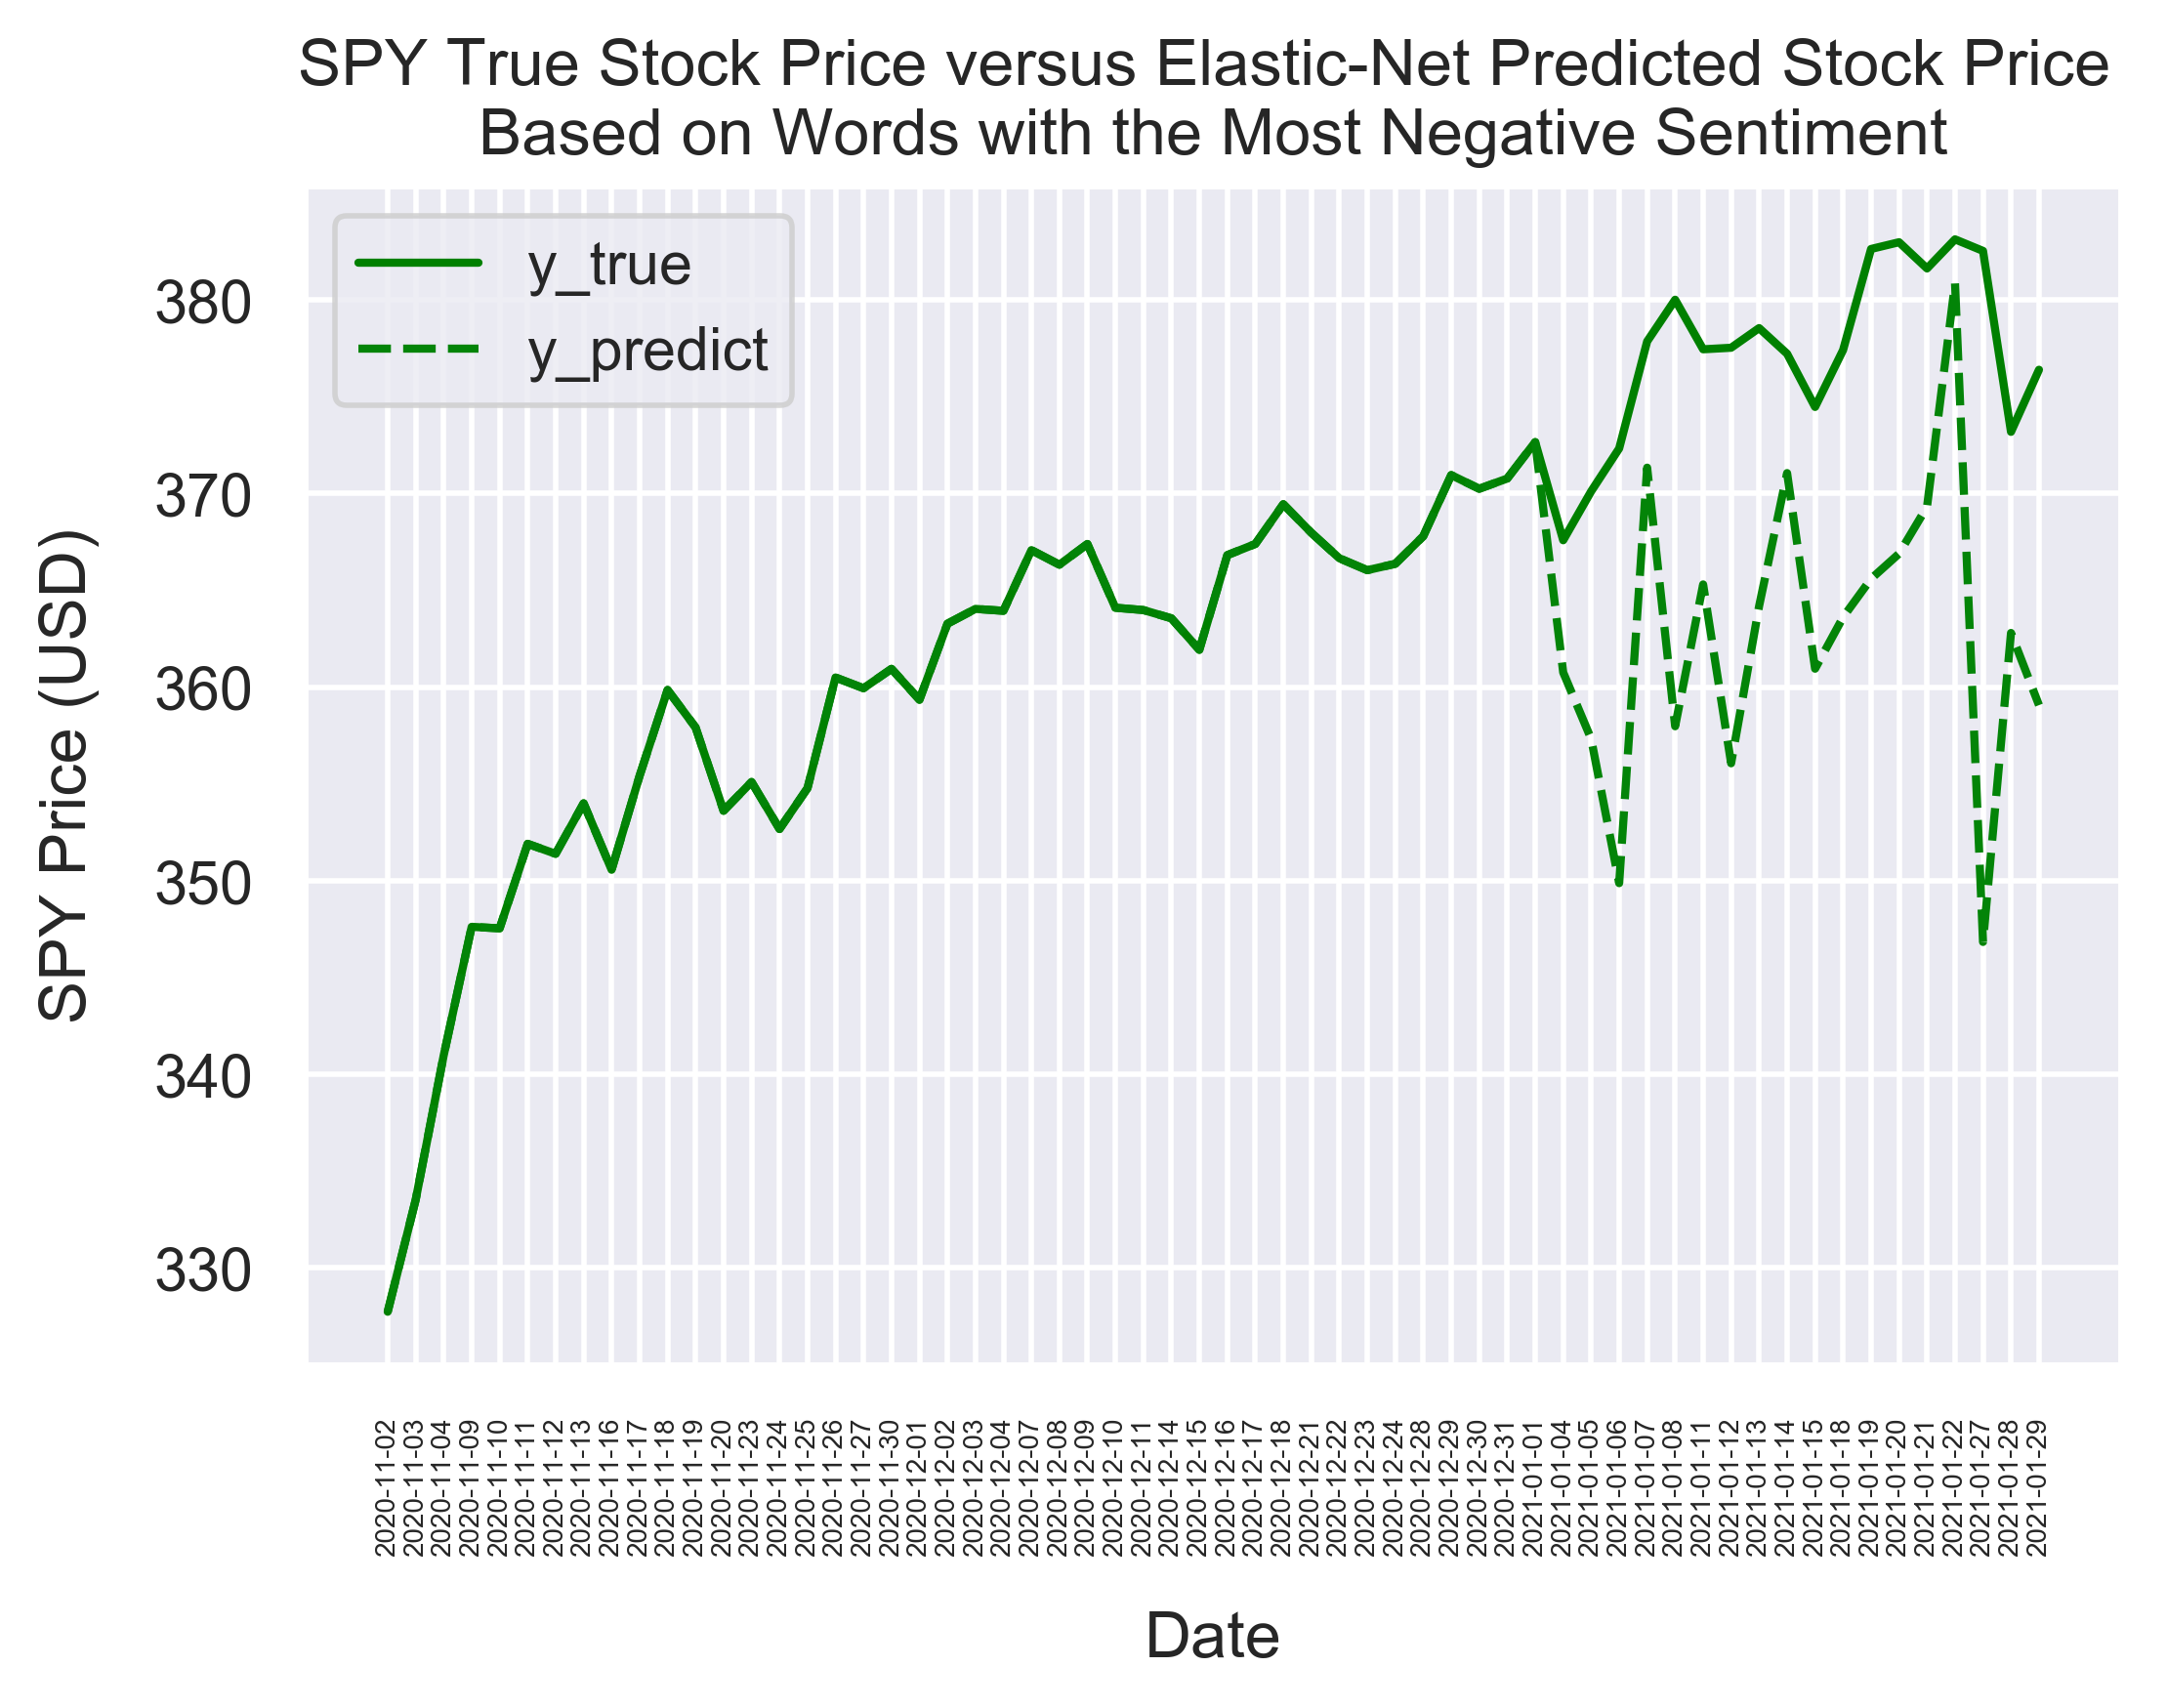

In [71]:
y = spy["Adj Close"]
x = df2[low]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))


sns.lineplot(data=data)
plt.title("SPY True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Words with the Most Negative Sentiment")
plt.ylabel("SPY Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()





/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.90873718261719, tolerance: 0.402009516954422
  positive)


The Root Mean Squared Error is: 20.627987916858174
The Mean Absolute Error is: 16.716339111328125
The Explained Variance Score is: -21.09883689880371
The R2 Score is: -21.09931946844323


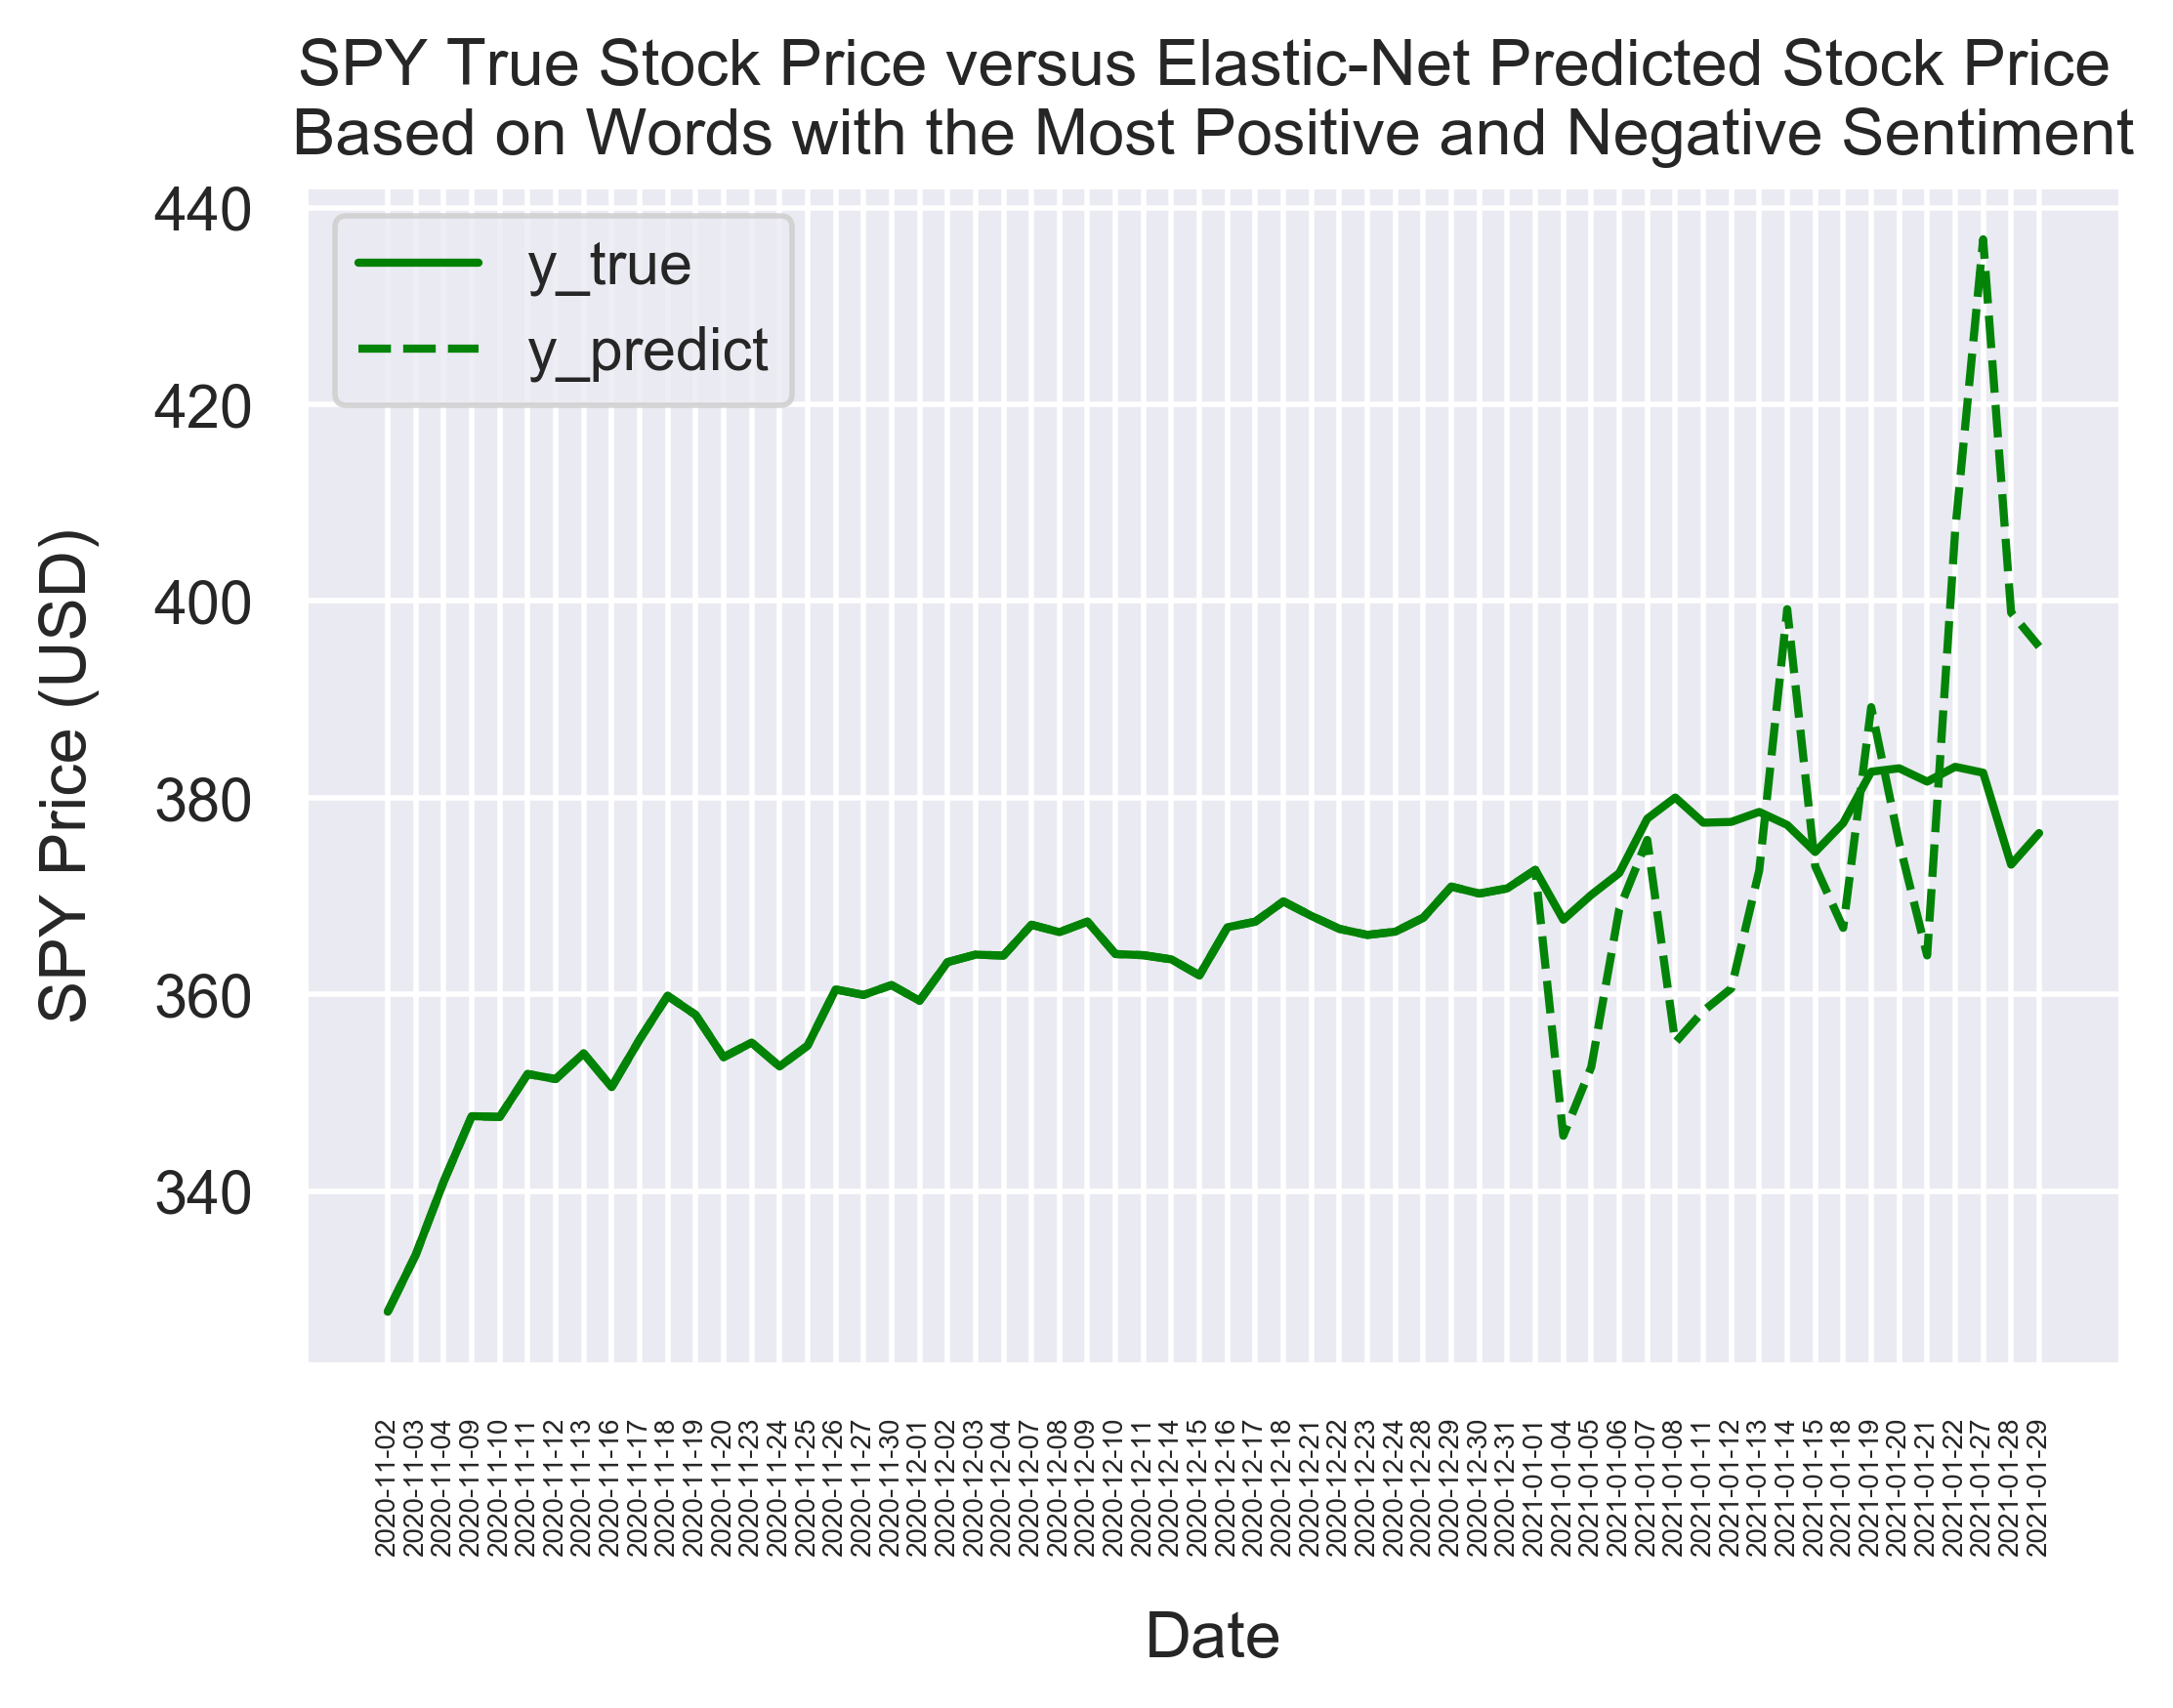

In [72]:
y = spy["Adj Close"]
x = df2[highlows]

x_train = np.asarray(x[:int(0.70*len(x))]).astype('float32')
x_test = np.asarray(x[int(0.70*len(x)):]).astype('float32')

y_train = np.asarray(y[:int(0.70*len(y))]).astype('float32')
y_test = np.asarray(y[int(0.70*len(y)):]).astype('float32')

from sklearn.linear_model import ElasticNet

reg = ElasticNet(random_state=0)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

data = pd.DataFrame()
data["y_true"] = y
pred2 = list(y_train)+list(pred)
data["y_predict"] = pred2
data = data.set_index([list(df2.index)])

import sklearn.metrics as metrics
print("The Root Mean Squared Error is:",(float(metrics.mean_squared_error(list(y_test),list(pred))))**0.5)
print("The Mean Absolute Error is:", float(metrics.mean_absolute_error(list(y_test),list(pred))))
print("The Explained Variance Score is:",float(metrics.explained_variance_score(list(y_test),list(pred))))
print("The R2 Score is:",float(metrics.r2_score(list(y_test),list(pred))))


sns.lineplot(data=data)
plt.title("SPY True Stock Price versus Elastic-Net Predicted Stock Price \nBased on Words with the Most Positive and Negative Sentiment")
plt.ylabel("SPY Price (USD)",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(rotation=90, size=5)
plt.show()






In [73]:
df2["Adjusted_Closing_Stock_Price"].describe()

count    60.000000
mean     23.946833
std       6.365199
min      10.500000
25%      20.525001
50%      25.565000
75%      27.207500
max      39.000000
Name: Adjusted_Closing_Stock_Price, dtype: float64